# Advent of code 2024

Exercises for advent of code 2024 challenges written in Python.

**Still to-do / revisit:**

- Day 12 Part 2:
    - *The corner detection algorithm needs work before this solution is correct.*
- Day 16 Part 2:
    - *Reindeer maze best path solution - works for the example, but for some reason isn't correct for the input. To revisit and debug what is going wrong...*
- Day 17 Part 2:
    - *Solving for A is intractable right now using brute force, even with the memoisation aspects developed into my function(s). To be re-reviewed and a more informative strategy used to solve for minimum A to produce the required conditions.*
- Day 21 Part 2:
    - *Solution employed for the keypads works, but is intractable in its current form. Need to re-develop code into a recursive and more efficient form that uses memoisation due to the huge sequence of characters involved.*
- Day 22 Part 2:
    - *Does not appear too challenging per se - simply have not had the time to analyse and develop a solution yet. To be worked on when time allows, since it seems like an interesting challenge to solve..*
- Day 24 Part 2:
    - *System of adding two binary numbers to be reverse engineered / solved, so that precise gates can be identified that are at fault. This seems intractable to do through a brute force solution, and so a more strategic / informed solution is needed.*

## Imports

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import seaborn as sns

from collections import Counter, defaultdict, deque
from functools import cache
from itertools import product, combinations, permutations
from matplotlib.colors import ListedColormap
from scipy.optimize import linprog
from typing import List, Sequence

## Day 1 Historian Hysteria

### Day 1, Part 1

In [2]:
def load_input_txt(file_path):
    data = np.loadtxt(file_path, dtype=int)
    return data
    
def compute_summed_diffs(data_array):
    diffs = np.abs(np.sort(data_array[:, 0]) - 
                   np.sort(data_array[:, 1]))
    diffs_sum = np.sum(diffs)
    return diffs, diffs_sum

In [3]:
# test on example inputs
data_dir = 'Day_1'
filename = 'example_input_day_1.txt'
ex_data = load_input_txt(os.path.join(data_dir, filename))
ex_diffs, summed_result = compute_summed_diffs(ex_data)

print(f"Final summed differences for {filename}: {summed_result}")

Final summed differences for example_input_day_1.txt: 11


In [4]:
%%time 
# now gather real input results
filename = 'day_1_input.txt'
data = load_input_txt(os.path.join(data_dir, filename))
_, summed_result = compute_summed_diffs(data)

print(f"Final summed differences for {filename}: {summed_result}")

Final summed differences for day_1_input.txt: 1834060
CPU times: user 1.58 ms, sys: 4.42 ms, total: 6.01 ms
Wall time: 3.68 ms


### Day 1, Part 2

In [5]:
def get_id_counts(right_array):
    return Counter(right_array)

def compute_similarity(data_array):
    # get counts from second column
    id_counts = get_id_counts(data_array[:, 1])

    # map left column to counts
    vectorized_map = np.vectorize(lambda x: id_counts.get(x, 0))
    mapped_array = vectorized_map(data_array[:, 0])

    # determine similarity scores
    sim_scores = data_array[:, 0] * mapped_array

    # return summed result
    return np.sum(sim_scores)

Let's first test these functions on the example data for validation:

In [6]:
sim_score = compute_similarity(ex_data)

print(f"Final similarty score: {sim_score}")

Final similarty score: 31


All correct - lets now process the actual data:

In [7]:
%%time

filename = 'day_1_input.txt'
data = load_input_txt(os.path.join(data_dir, filename))
sim_score = compute_similarity(data)

print(f"Final similarity score for {filename}: {sim_score}")

Final similarity score for day_1_input.txt: 21607792
CPU times: user 1.95 ms, sys: 1.34 ms, total: 3.28 ms
Wall time: 2.18 ms


## Day 2 Red-Nosed Reports

### Day 2, Part 1:

Both of the following must be true for the system to be determined as safe:

1. The levels are either all increasing or all decreasing.
2. Any two adjacent levels differ by at least one and at most three.


In [21]:
def load_variable_columns_txt_as_int(file_path: str) -> List[List[int]]:
    """
    Loads a text file with a variable number of columns per row and converts all data to integers.

    Args:
        file_path (str): Path to the text file.

    Returns:
        List[List[int]]: A list containing rows, where each row is a list of integers.
    """
    data = []
    try:
        with open(file_path, 'r') as file:
            for line in file:
                # Strip any extra whitespace, split by whitespace or delimiter, and convert to integers
                row = [int(value) for value in line.strip().split()]
                data.append(row)
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except ValueError as e:
        print(f"Error: Could not convert data to integers. {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
    return data


def get_diffs(row: Sequence[int]) -> np.ndarray:
    """ 
    Get differences between consecutive values in the given row.

    Args:
        row (Sequence[int]): A sequence of int values.

    Returns:
        np.ndarray: An array of differences between consecutive values.
    """
    return np.diff(np.array(row))


def validate_row(diffs: np.ndarray) -> bool:
    """ 
    Validate a row of integer differences. Checks that all differences are either 
    non-negative or non-positive (monotonicity) and that all differences 
    are within a safe range.

    Args:
        diffs (np.ndarray): A NumPy array of integer differences.

    Returns:
        bool: True if the row passes validation, False otherwise.
    """
    if diffs.dtype != np.int_:
        raise ValueError("Input array must be of integer type.")

    is_negative = diffs <= 0
    is_positive = diffs >= 0
    unsafe_diff = np.abs(diffs) > 3
    
    # Assert that all values are either non-negative or non-positive
    all_inc_dec = is_negative.sum() == 0 or is_positive.sum() == 0
    # Assert that all differences are within a safe range
    all_safe = unsafe_diff.sum() == 0
    
    return all_inc_dec and all_safe

**Example data:**

In [22]:
data_dir = 'Day_2'
filename = 'example_input_day_2.txt'
ex_input = load_variable_columns_txt_as_int(os.path.join(data_dir, filename))

In [23]:
for row in ex_input:
    print(f"Validating row {row}: {validate_row(get_diffs(row))}")

total_safe = sum([validate_row(get_diffs(row)) for row in ex_input])
print(f"\nTotal number of safe rows: {total_safe}")

Validating row [7, 6, 4, 2, 1]: True
Validating row [1, 2, 7, 8, 9]: False
Validating row [9, 7, 6, 2, 1]: False
Validating row [1, 3, 2, 4, 5]: False
Validating row [8, 6, 4, 4, 1]: False
Validating row [1, 3, 6, 7, 9]: True

Total number of safe rows: 2


Actual input data:

In [25]:
%%time
data_dir = 'Day_2'
filename = 'day_2_input.txt'
input_data = load_variable_columns_txt_as_int(os.path.join(data_dir, filename))

total_safe = sum([validate_row(get_diffs(row)) for row in input_data])
print(f"Total number of safe rows: {total_safe}")

Total number of safe rows: 670
CPU times: user 14.1 ms, sys: 4.46 ms, total: 18.6 ms
Wall time: 15.7 ms


### Day 2, Part 2:

Need to determine where entries fail by just one level, and for these, whether removing these failed levels would cause them to become safe.

In [26]:
def validate_row_with_tolerate(row: Sequence[int], 
                               is_recursive_call: bool = False,
                               verbose=False) -> bool:
    """ 
    Validate a row of integer differences. Checks that all differences are either 
    non-negative or non-positive (monotonicity) and that all differences 
    are within a safe range.

    Args:
        row (Sequence[int]): A sequence of int values.
        is_recursive_call (bool): Whether this is a recursive call. Defaults to False.
                                  Should only be True for internal calls during corrections.
        verbose (bool): If true, print helpful debug / status messages to terminal.

    Returns:
        bool: True if the row passes validation, False otherwise.
    """
    row_array = np.array(row)
    diffs = np.diff(row_array)

    is_negative = diffs <= 0
    is_positive = diffs >= 0
    unsafe_diff = np.abs(diffs) > 3

    pos_count = is_positive.sum()
    neg_count = is_negative.sum()
    
    # Assert that all values are either non-negative or non-positive
    all_inc_dec = neg_count == 0 or pos_count == 0
    # Assert that all differences are within a safe range
    all_safe = unsafe_diff.sum() == 0

    if all_inc_dec and all_safe:
        if verbose:
            print(f"Values for {row_array} are all safe!")
        return True

    # if correct has not already been applied, attempt
    elif not is_recursive_call:

        # one value is non-negative - remove and try again
        if neg_count == 1 or pos_count == 1 or unsafe_diff.sum() == 1:

            if verbose:
                print(f"No correction call with only minor row issues...attempting corrections.")

            # iterate through all row values and evaluate whether safe correction
            for i in range(len(row)):
                editted_row = np.delete(row_array, i)
                if verbose:
                    print(f"Original row: {row_array}")
                    print(f"Updated row: {editted_row}")
                
                if validate_row_with_tolerate(editted_row, 
                                              is_recursive_call=True):
                    return True
            return False
            
        else:
            if verbose:
                print(f"No corrections for {row_array} can be made... returning False.")
            return False
    else:
        if verbose:
            print(f"Data in {row_array} is unsafe after correcting... returning False.")
        return False

In [27]:
data_dir = 'Day_2'
filename = 'example_input_day_2.txt'
input_data = load_variable_columns_txt_as_int(os.path.join(data_dir, filename))

In [28]:
sum([validate_row_with_tolerate(row) for row in input_data])

4

**Actual data:**

In [32]:
%%time 
filename = 'day_2_input.txt'
input_data = load_variable_columns_txt_as_int(os.path.join(data_dir, filename))

total_safe = sum([validate_row_with_tolerate(row) for row in input_data])
print(f"Total number of safe rows (including 1 x corrections): {total_safe}")

Total number of safe rows (including 1 x corrections): 700
CPU times: user 34.1 ms, sys: 13.8 ms, total: 47.9 ms
Wall time: 36 ms


## Day 3 Mull It Over:

### Day 3, Part 1:

For part 1 we can solve this relatively easily using regular expressions, given the very specific patterns we're looking for in the input text.

In [41]:
# example string for testing
example_str = 'xmul(2,4)%&mul[3,7]!@^do_not_mul(5,5)+mul(32,64]then(mul(11,8)mul(8,5))'

# re pattern to match as required for our problem
pattern = r"mul\((\d+),(\d+)\)"

# find all matches and calculate products
matches = re.findall(pattern, example_str)
print(matches)

results = [(f"mul({x},{y})", int(x) * int(y)) for x, y in matches]

# display results for validation
for expression, product in results:
    print(f"\n{expression} = {product}\n")

products = [int(x) * int(y) for x, y in matches]
product_sum = sum(products)
print(f"Product sum after parsing text is: {product_sum}")

[('2', '4'), ('5', '5'), ('11', '8'), ('8', '5')]

mul(2,4) = 8


mul(5,5) = 25


mul(11,8) = 88


mul(8,5) = 40

Product sum after parsing text is: 161


This works without any problems... lets formulate more generally into some simple functions:

In [49]:
def extract_terms(string_data):
    # Pattern to match the custom format in the challenge
    pattern = r"mul\((\d+),(\d+)\)"
    
    # Find all matches and calculate products
    return re.findall(pattern, string_data)
    

def get_products(match_data):
    return [int(x) * int(y) for x, y in match_data]

# test our functions above on the example data
extracted_terms = extract_terms(example_str)
product_terms = get_products(extracted_terms)
product_sum = sum(product_terms)

print(f"Product sum after parsing text is: {product_sum}")

Product sum after parsing text is: 161


**Input data:**

In [50]:
# open file with input string data
data_dir = 'Day_3'
file_name = 'day_3_input.txt'
try:
    with open(os.path.join(data_dir, file_name), "r", encoding="utf-8") as file:
        string_data = file.read()  # Read the entire content as a single string
    print("File successfully read.")
except FileNotFoundError:
    print("The specified file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

File successfully read.


In [51]:
%%time 
extracted_terms = extract_terms(string_data)
product_terms = get_products(extracted_terms)
product_sum = sum(product_terms)

print(f"Product sum after parsing text is: {product_sum}")

Product sum after parsing text is: 171183089
CPU times: user 981 μs, sys: 233 μs, total: 1.21 ms
Wall time: 1.11 ms


All correct!

### Day 3, Part 2:

At first, I tried solving the whole of part 2 using only regular expressions. However, due to subtle issues that I decided were not worth investing too much time in, I refactored my solution to instead split on do(), and ignore all other text occuring after the first don't(). Using this strategy in combination with the existing extraction functions above, this was more than sufficient to provide the solution efficiently.

In [54]:
def extract_text_snippets(string_data, 
                          start_command="do()", 
                          end_command="don't()",
                          add_start_command=True,
                          add_end_command=True):
    """ Extract snippets of text between start and end commands and return
        as array of strings.
    """
    string_seq = string_data[:]
    if not string_seq.startswith(start_command) and add_start_command:
        string_seq = start_command + string_seq

    if not string_seq.endswith(end_command) and add_end_command:
        string_seq = string_seq + end_command

    # Regular expression to capture all valid START to END pairs
    pattern = rf"{re.escape(start_command)}(.*?){re.escape(end_command)}"
    
    # Initialize an empty list to hold results
    results = []
    
    # Use re.finditer to find all matches iteratively
    matches = re.finditer(pattern, string_seq)
    
    # Extract all matched text
    for match in matches:
        results.append(match.group(1))
    
    return results


def extract_product_sum(text_data):
    """ Extract terms from text and determine final product sum. """
    final_product_sum = 0

    str_list = extract_text_snippets(text_data)
    for text_snippet in str_list:
        extracted_terms = extract_terms(text_snippet)
        product_terms = get_products(extracted_terms)
        final_product_sum += sum(product_terms)

    return final_product_sum

In [55]:
example_str = "xmul(2,4)&mul[3,7]!^don't()_mul(5,5)+mul(32,64](mul(11,8)undo()?mul(8,5))"
extract_text_snippets(example_str)

['xmul(2,4)&mul[3,7]!^', '?mul(8,5))']

In [56]:
print(f"Final product sum: {extract_product_sum(example_str)}")

Final product sum: 48


Second iteration (required to overcome failures in the real input test case using the above functions):

- Split on do(), and simply ignore all other text that occurs after the first don't().

In [57]:
def extract_do_text_snippets(string_data, 
                             start_command="do()", 
                             end_command="don't()"):
    """ Extract snippets of text between start and end commands and return
        as array of strings.
    """

    do_splits = string_data.split("do()")

    keep_data = []

    # split each further on "don't" and only keep first item
    for do_split in do_splits:
        dont_splits = do_split.split("don't()")

        keep_data.append(dont_splits[0])
    
    return keep_data


def extract_product_sum_v2(text_data):
    """ Extract terms from text and determine final product sum. """
    final_product_sum = 0

    str_list = extract_do_text_snippets(text_data)
    for text_snippet in str_list:
        extracted_terms = extract_terms(text_snippet)
        product_terms = get_products(extracted_terms)
        final_product_sum += sum(product_terms)

    return final_product_sum

In [58]:
extract_product_sum_v2(example_str)

48

**Input data:**

In [64]:
# open file with input string data
data_dir = 'Day_3'
file_name = 'day_3_input.txt'
try:
    with open(os.path.join(data_dir, file_name), "r", encoding="utf-8") as file:
        string_data = file.read()  # Read the entire content as a single string
    print("File successfully read.")
except FileNotFoundError:
    print("The specified file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

File successfully read.


In [63]:
%%time
print(f"Final product sum: {extract_product_sum_v2(string_data)}")

Final product sum: 63866497
CPU times: user 403 μs, sys: 23 μs, total: 426 μs
Wall time: 439 μs


**Reflection:** This solution (v2 above) passes without any problems! Clearly, the first iteration of the solution to Part 2 above complicated the flow too much by trying to capture text between do() and don't() using regular expressions, whereby something (likely very trivial) was going wrong. 

Instead, the more simpler approach of splitting on do() and don't() was clearly a better strategy, with no obscurities to debug. As they say, keep it simple stupid...

## Day 4 Ceres Search

### Day 4, Part 1:

In [23]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [24]:
data_dir = 'Day_4'
filename = 'example_input_day_4.txt'
ex_crossword = read_raw_text(os.path.join(data_dir, filename))
ex_crossword_array = np.array([list(x) for x in ex_crossword.split('\n')])
ex_crossword_array

File successfully read.


array([['M', 'M', 'M', 'S', 'X', 'X', 'M', 'A', 'S', 'M'],
       ['M', 'S', 'A', 'M', 'X', 'M', 'S', 'M', 'S', 'A'],
       ['A', 'M', 'X', 'S', 'X', 'M', 'A', 'A', 'M', 'M'],
       ['M', 'S', 'A', 'M', 'A', 'S', 'M', 'S', 'M', 'X'],
       ['X', 'M', 'A', 'S', 'A', 'M', 'X', 'A', 'M', 'M'],
       ['X', 'X', 'A', 'M', 'M', 'X', 'X', 'A', 'M', 'A'],
       ['S', 'M', 'S', 'M', 'S', 'A', 'S', 'X', 'S', 'S'],
       ['S', 'A', 'X', 'A', 'M', 'A', 'S', 'A', 'A', 'A'],
       ['M', 'A', 'M', 'M', 'M', 'X', 'M', 'M', 'M', 'M'],
       ['M', 'X', 'M', 'X', 'A', 'X', 'M', 'A', 'S', 'X']], dtype='<U1')

In [25]:
def left_word(row_no, col_no, arr, length=4):
    """ Reads chars (up to length) in left direction from chosen 2d grid location."""
    # Ensure column index is within bounds to prevent errors
    start_col = max(0, col_no - length + 1)  # Ensure we don't go out of bounds
    return ''.join(arr[row_no][start_col:col_no + 1][::-1])

def right_word(row_no, col_no, arr, length=4):
    """ Reads chars (up to length) rightwards from chosen 2d grid location."""
    return "".join(arr[row_no, col_no:col_no+length])

def down_word(row_no, col_no, arr, length=4):
    """ Get down word. """
    return "".join(arr[row_no:row_no+length, col_no])

def up_word(row_no, col_no, arr, length=4):
    """ Reads chars (up to length) upwards from chosen 2d grid location."""
    # Ensure row index is within bounds to prevent errors
    start_row = max(0, row_no - length + 1)  # Ensure we don't go out of bounds
    # Collect characters from the specified column across the rows
    return ''.join(arr[r][col_no] for r in range(row_no, start_row - 1, -1))

def up_left_word(row_no, col_no, arr, length=4):
    """ Reads chars (up to length) up-left (diagonal) from 2d grid location."""
    result = []
    for i in range(length):
        r, c = row_no - i, col_no - i  # Move diagonally up-left
        if r < 0 or c < 0:  # Stop if we go out of bounds
            break
        result.append(arr[r][c])  # Add the character to the result
    return ''.join(result)

def up_right_word(row_no, col_no, arr, length=4):
    """ Reads chars (up to length) up-right (diagonal) from 2d grid location."""
    result = []
    max_col = arr.shape[1]
    for i in range(length):
        r, c = row_no - i, col_no + i  # Move diagonally up-right
        if r < 0 or c >= max_col:  # Stop if we go out of bounds
            break
        result.append(arr[r][c])  # Add the character to the result
    return ''.join(result)

def down_right_word(row_no, col_no, arr, length=4):
    """ Reads chars (up to length) up-right (diagonal) from 2d grid location."""
    max_row = arr.shape[0]
    max_col = arr.shape[1]
    result = []
    for i in range(length):
        r, c = row_no + i, col_no + i  # Move diagonally up-right
        if r >= max_row or c >= max_col:  # Stop if we go out of bounds
            break
        result.append(arr[r][c])  # Add the character to the result
    return ''.join(result)

def down_left_word(row_no, col_no, arr, length=4):
    """ Reads chars (up to length) up-right (diagonal) from 2d grid location."""
    max_row = arr.shape[0]
    result = []
    for i in range(length):
        r, c = row_no + i, col_no - i  # Move diagonally down-right
        if r >= max_row or c < 0:  # Stop if we go out of bounds
            break
        result.append(arr[r][c])  # Add the character to the result
    return ''.join(result)

def extract_sequences(row_no, col_no, arr):
    """ Extract all possible word sequences from start 
        location (2d co-ords).
    """
    words = []
    words.append(left_word(row_no, col_no, arr))
    words.append(right_word(row_no, col_no, arr))
    words.append(up_word(row_no, col_no, arr))
    words.append(down_word(row_no, col_no, arr))
    words.append(up_left_word(row_no, col_no, arr))
    words.append(up_right_word(row_no, col_no, arr))
    words.append(down_left_word(row_no, col_no, arr))
    words.append(down_right_word(row_no, col_no, arr))
    return words

def get_crossword_char_sequences(crossword_array, start_char='X'):
    char_sequences = []

    # find all x-locations, and iteratively search through all of these to find all the xmas words in the grid
    for row_i, row in enumerate(crossword_array):
        for col_i, char in enumerate(row):
            if char == 'X':
                location_sequences = extract_sequences(row_i, col_i, crossword_array)
                char_sequences.extend(location_sequences)
    return char_sequences

In [26]:
ex_char_sequences = get_crossword_char_sequences(ex_crossword_array)

xmas_count = len([x for x in ex_char_sequences if x == 'XMAS'])
print(f"Counted XMAS {xmas_count} times!")

Counted XMAS 18 times!


**Input data:**

In [27]:
data_dir = 'Day_4'
filename = 'day_4_input.txt'
crossword = read_raw_text(os.path.join(data_dir, filename))
crossword_array = np.array([list(x) for x in crossword.split('\n')])

print(f"Crossword dimensions: {crossword_array.shape}")

File successfully read.
Crossword dimensions: (140, 140)


In [28]:
%%time
char_sequences = get_crossword_char_sequences(crossword_array)

xmas_count = len([x for x in char_sequences if x == 'XMAS'])
print(f"Counted XMAS {xmas_count} times!")

Counted XMAS 2571 times!
CPU times: user 52.8 ms, sys: 2.64 ms, total: 55.4 ms
Wall time: 53.5 ms


### Day 4, Part 2:

Diagonal X-MAS enhancement on the above:

In [29]:
# search every location with an 'A' character for diagonal MAS sequences (both directions)

def get_x_mas_diagonals(crossword_array):
    xmas_counts = 0

    # find all x-locations, and iteratively search through all of these to find all the xmas words in the grid
    for row_i, row in enumerate(crossword_array):
        for col_i, char in enumerate(row):
            if char == 'A':
                if contains_cross_mas(row_i, col_i, crossword_array):
                    xmas_counts += 1
    return xmas_counts

def contains_cross_mas(row_no, col_no, arr):
    """ Check if we have a X-MAS situation. """
    max_row = arr.shape[0]
    max_col = arr.shape[1]

    # validate position and bounds - false if out of bounds
    if (row_no + 1 >= max_row or row_no - 1 < 0 or 
        col_no + 1 >= max_col or col_no - 1 < 0):
        return False

    else:

        # gather nearby diagonal chars
        up_left = arr[row_no - 1][col_no - 1]
        up_right = arr[row_no - 1][col_no + 1]
        down_left = arr[row_no + 1][col_no - 1]
        down_right = arr[row_no + 1][col_no + 1]

        diag_1 = up_left + 'A' + down_right
        diag_2 = up_right + 'A' + down_left

        matches = ['MAS', 'SAM']
    
        # check if both directions are equal to MAS or SAM
        if (diag_1 in matches) and (diag_2 in matches):
            return True
        else:
            return False

In [30]:
%%time
get_x_mas_diagonals(crossword_array)

CPU times: user 14.9 ms, sys: 969 μs, total: 15.9 ms
Wall time: 15.3 ms


1992

Success with submission using the above!

## Day 5 Print Queue

### Day 5, Part 1

The first section specifies the page ordering rules, one per line. The first rule, 47|53, means that if an update includes both page number 47 and page number 53, then page number 47 must be printed at some point before page number 53. (47 doesn't necessarily need to be immediately before 53; other pages are allowed to be between them.)

The second section specifies the page numbers of each update. Because most safety manuals are different, the pages needed in the updates are different too. The first update, 75,47,61,53,29, means that the update consists of page numbers 75, 47, 61, 53, and 29.

To get the printers going as soon as possible, start by identifying which updates are already in the right order.

For some reason, the Elves also need to know the middle page number of each update being printed. Because you are currently only printing the correctly-ordered updates, you will need to find the middle page number of each correctly-ordered update.

Determine which updates are already in the correct order. What do you get if you add up the middle page number from those correctly-ordered updates?

In [33]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [34]:
data_dir = 'Day_5'
ex_file = read_raw_text(os.path.join(data_dir, 'example_input_day_5.txt'))

ex_rules = ex_file.split('\n\n')[0].split('\n')
ex_rules = np.array([list(map(int, row.split('|'))) for row in ex_rules])

ex_rules_1st, ex_rules_2nd = list(ex_rules[:, 0]), list(ex_rules[:, 1])

ex_updates = ex_file.split('\n\n')[1].split('\n')
ex_updates = [x.split(',') for x in ex_updates]
ex_updates = [list(map(int, row)) for row in ex_updates]

File successfully read.


In [35]:
def check_dependencies(row, rules):
    """ Iterate through each row and check dependencies. """
    checked = []
    for i, num in enumerate(row):
        # get numbers that must go before current num
        dependencies = get_first_dependencies(num, rules)

        if len(dependencies) > 0:
            for dependent in dependencies:
                # if occurs after current number, return false
                if dependent in row[i:]:
                    return False
        checked.append(num)
    # nothing found - must be correct
    return True

def get_first_dependencies(number, rules):
    """ For a given number, return numbers that must be before it. """
    dependencies = list(rules[rules[:, 1] == number][:, 0])
    return dependencies

def validate_update_list(update_lines, rules):
    """ Validate line, and return the sum of center numbers for all correct
        lines. """
    correct_centers = []
    for update_line in update_lines:
        correct = check_dependencies(update_line, rules)
        if correct:
            center_element = update_line[int(np.floor(len(update_line) / 2))]
            correct_centers.append(center_element)
    return sum(correct_centers)

In [36]:
validate_update_list(ex_updates, ex_rules)

143

**Actual input data:**

In [37]:
data_dir = 'Day_5'
input_data = read_raw_text(os.path.join(data_dir, 'day_5_input.txt'))

rules = input_data.split('\n\n')[0].split('\n')
rules = np.array([list(map(int, row.split('|'))) for row in rules])

updates = input_data.split('\n\n')[1].split('\n')
updates = [x.split(',') for x in updates]
updates = [list(map(int, row)) for row in updates]

File successfully read.


In [38]:
%%time 
validate_update_list(updates, rules)

CPU times: user 28.5 ms, sys: 2.45 ms, total: 30.9 ms
Wall time: 29.2 ms


5452

All correct, success!

### Day 5, Part 2:

While the Elves get to work printing the correctly-ordered updates, you have a little time to fix the rest of them.

For each of the incorrectly-ordered updates, use the page ordering rules to put the page numbers in the right order. For the above example, here are the three incorrectly-ordered updates and their correct orderings:

- 75,97,47,61,53 becomes 97,75,47,61,53.
- 61,13,29 becomes 61,29,13.
- 97,13,75,29,47 becomes 97,75,47,29,13.

After taking only the incorrectly-ordered updates and ordering them correctly, their middle page numbers are 47, 29, and 47. Adding these together produces 123.

Find the updates which are not in the correct order. What do you get if you add up the middle page numbers after correctly ordering just those updates?

General approach for this will be as follows:
- Go through each line same as above, when a line is found incorrect - initiate new process, as below:
    - Develop a process / algorithm to iteratively review rules and re-order numbers to satisfy the constraints.
    - Before processing each row, ensure we are only doing this based on numbers in the current sequence to save computational time.

In [39]:
def rearrange_sequence(numbers, rules):
    new_sequence = []
    for i, num in enumerate(numbers):
        # get numbers that must go before current num
        dependencies = get_first_dependencies(num, rules)

        if len(dependencies) > 0:

            for future_value in numbers[i:]:
                if future_value in dependencies:
                    
                    # place this dependent to left of current number
                    new_sequence.append(future_value)

                    # append current number
                    new_sequence.append(num)

                    # add other remaining values, minus swapped number
                    remaining_vals = numbers[i+1:].copy()
                    remaining_vals.remove(future_value)
                    
                    if remaining_vals:
                        new_sequence.extend(remaining_vals)
                    return new_sequence
                    
        new_sequence.append(num)
        
    # nothing found - return sequence
    return new_sequence

In [41]:
data_dir = 'Day_5'
ex_file = read_raw_text(os.path.join(data_dir, 'example_input_day_5.txt'))

ex_rules = ex_file.split('\n\n')[0].split('\n')
ex_rules = np.array([list(map(int, row.split('|'))) for row in ex_rules])

ex_updates = ex_file.split('\n\n')[1].split('\n')
ex_updates = [x.split(',') for x in ex_updates]
ex_updates = [list(map(int, row)) for row in ex_updates]

File successfully read.


In [42]:
ex_index = 3

new_seq = ex_updates[ex_index].copy()
print(f"Original sequence: {new_seq}")

change_attempts = 0
while not check_dependencies(new_seq, ex_rules) and change_attempts < 100:
    new_seq = rearrange_sequence(new_seq, ex_rules)
    print(f"Updated sequence after change {change_attempts + 1}: {new_seq}")
    change_attempts += 1
    
print(f"Successfully corrected sequence in {change_attempts} attempts.")

Original sequence: [75, 97, 47, 61, 53]
Updated sequence after change 1: [97, 75, 47, 61, 53]
Successfully corrected sequence in 1 attempts.


In [43]:
def correct_update_list(update_lines, rules, max_attempts=1000):
    """ Validate line, and return the sum of center numbers for all correct
        lines.
    """
    correct_centers = []
    for update_line in update_lines:
        correct = check_dependencies(update_line, rules)

        # if not correct - update until correct
        if not correct:
            new_seq = update_line.copy()
            change_attempts = 0
            while not check_dependencies(new_seq, rules) and change_attempts < max_attempts:
                new_seq = rearrange_sequence(new_seq, rules)
                #print(f"Updated sequence after change {change_attempts + 1}: {new_seq}")
                change_attempts += 1

                if change_attempts % 100 == 0:
                    print(f"Reached {change_attempts} on sequence: {update_line}")

            center_element = new_seq[int(np.floor(len(new_seq) / 2))]
            correct_centers.append(center_element)
            
    return sum(correct_centers)

In [44]:
correct_update_list(ex_updates, ex_rules)

123

**Actual input data:**

In [46]:
data_dir = 'Day_5'
input_data = read_raw_text(os.path.join(data_dir, 'day_5_input.txt'))

rules = input_data.split('\n\n')[0].split('\n')
rules = np.array([list(map(int, row.split('|'))) for row in rules])

updates = input_data.split('\n\n')[1].split('\n')
updates = [x.split(',') for x in updates]
updates = [list(map(int, row)) for row in updates]

File successfully read.


In [48]:
%%time
correct_update_list(updates, rules)

CPU times: user 184 ms, sys: 2.14 ms, total: 186 ms
Wall time: 185 ms


4598

Success with above!

## Day 6 Guard Gallivant

### Day 6, Part 1

In [52]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [53]:
class GridMap:
    def __init__(self, grid):
        """Initialize the grid."""
        self.grid = grid.copy()
        self.grid_history = self.grid.copy()
        
        self.n_rows = grid.shape[0]
        self.n_cols = grid.shape[1]
        self.directions = {'>': (0, 1), '<': (0, -1), '^': (-1, 0), 'v': (1, 0)}

        # define next direction if we need to change (i.e. an obstacle)
        self.direction_changes = {'>': 'v', '<': '^', '^': '>', 'v': '<'}
        
        self.current_position = self._find_guard_position()

        # record of movements, incl directions
        self.visited = set()
        if self.current_position:
            self.visited.add(self.current_position)
            self._update_history()

        # signify end of guard patrol
        self.left_area = False
        self.n_movements = 0

    def _find_guard_position(self):
            """Find the guard's current location and direction. """
            for r in range(self.n_rows):
                for c in range(self.n_cols):
                    if self.grid[r][c] in self.directions:
                        return (r, c, self.grid[r][c])  # Return row, column, and direction
            return None

    def _check_obstacle(self, row, col):
         if self.grid[row][col] == '#':
             return True

    def _check_grid_end(self, row, col):
        """ Check if next move will move off of the grid (end). """
        if (row>=self.n_rows or row<0) or (col>=self.n_cols or col<0):
            return True
        else:
            return False

    def _update_history(self):
        x, y, _ = self.current_position
        self.grid_history[x][y] = 'X'

    def _update_current_position(self, position):
        """ Perform series of actions to update current position. """
        
        old_x, old_y, direction = self.current_position
        new_x, new_y, new_direction = position

        self.current_position = position

        self._update_history()

        # remove old position from current grid
        self.grid[old_x][old_y] = '.'

        # update new position with indicator on our grid
        self.grid[new_x, new_y] = new_direction
        
    def _get_next_position(self):
        """" Get next intended position, based on current position """
        x, y, direction = self.current_position
        delta_x, delta_y = self.directions[direction]
        next_x = x + delta_x
        next_y = y + delta_y

        # validate if guard is about to walk off of grid (end)
        if self._check_grid_end(next_x, next_y):
            self.left_area = True
            return self.current_position

        # if obstacles, rotate accordingly
        elif self._check_obstacle(next_x, next_y):
            new_direction = self.direction_changes[direction]
            return (x, y, new_direction)

        # otherwise, return new position
        else:
            return (next_x, next_y, direction)
        
    def move(self):
        """ If there is something directly in front, turn right 90 degrees, 
            otherwise, take a step forward.
        """

        if self.left_area:
            print('Guard has already left the area. No more places to move!')
            return

        else:
            # determine next position to move based on current position and direction
            next_position = self._get_next_position()

            # formally update our position (x, y, direction) and grid history
            self._update_current_position(next_position)

            # add to our record of total movements
            self.n_movements += 1

    def count_positions(self):
        """ Return the number of positions the guard has visited in total. """
        return np.count_nonzero(self.grid_history == 'X')

    def solve_movements(self, attempt_limit=10000):
        while not self.left_area and self.n_movements < attempt_limit:
            _ = self.move()
        if self.n_movements >= attempt_limit:
            print(f"Cancelling this attempt after {self.n_movements} attempts!")
        return

In [59]:
data_dir = 'Day_6'
ex_data = read_raw_text(os.path.join(data_dir, 'example_input_day_6.txt'))
ex_grid_data = np.array([list(x) for x in ex_data.split('\n')])

ex_grid = GridMap(ex_grid_data)
ex_grid.solve_movements()
print(ex_grid.grid)
print(f"\nSolved grid, which has {ex_grid.count_positions()} guard occupied positions.")

File successfully read.
[['.' '.' '.' '.' '#' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '#']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '#' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '#' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '#' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '.' '.' '#' '.']
 ['#' '.' '.' '.' '.' '.' '.' '.' '.' '.']
 ['.' '.' '.' '.' '.' '.' '#' 'v' '.' '.']]

Solved grid, which has 41 guard occupied positions.


In [61]:
ex_grid.grid_history

array([['.', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', 'X', 'X', 'X', 'X', 'X', '#'],
       ['.', '.', '.', '.', 'X', '.', '.', '.', 'X', '.'],
       ['.', '.', '#', '.', 'X', '.', '.', '.', 'X', '.'],
       ['.', '.', 'X', 'X', 'X', 'X', 'X', '#', 'X', '.'],
       ['.', '.', 'X', '.', 'X', '.', 'X', '.', 'X', '.'],
       ['.', '#', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '.'],
       ['.', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '#', '.'],
       ['#', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '#', 'X', '.', '.']], dtype='<U1')

**Input data for test:**

In [68]:
%%time
data_dir = 'Day_6'
data = read_raw_text(os.path.join(data_dir, 'day_6_input.txt'))
grid_data = np.array([list(x) for x in data.split('\n')])

grid = GridMap(grid_data)
grid.solve_movements()
grid.grid

print(f"\nSolved grid, which has {grid.count_positions()} guard occupied positions.")

File successfully read.

Solved grid, which has 5453 guard occupied positions.
CPU times: user 17.2 ms, sys: 2.66 ms, total: 19.9 ms
Wall time: 17.6 ms


Success with the above!

### Day 6, Part 2:

As soon as the guard gets back to a position they've already been to, i.e. facing in exactly the same direction, then we have a situation of an infinite loop.

In [69]:
class GridMap:
    def __init__(self, grid):
        """Initialize the grid."""
        self.grid = grid.copy()
        self.grid_history = self.grid.copy()
        
        self.n_rows = grid.shape[0]
        self.n_cols = grid.shape[1]
        self.directions = {'>': (0, 1), '<': (0, -1), '^': (-1, 0), 'v': (1, 0)}

        # define next direction if we need to change (i.e. an obstacle)
        self.direction_changes = {'>': 'v', '<': '^', '^': '>', 'v': '<'}
        
        self.current_position = self._find_guard_position()

        # record of movements, incl directions
        self.visited = set()
        if self.current_position:
            self.visited.add(self.current_position)
            self._update_history()

        # signify end of guard patrol
        self.left_area = False
        self.loop_situation = False
        self.n_movements = 0

    def _find_guard_position(self):
            """Find the guard's current location and direction. """
            for r in range(self.n_rows):
                for c in range(self.n_cols):
                    if self.grid[r][c] in self.directions:
                        return (r, c, self.grid[r][c])  # Return row, column, and direction
            return None

    def _check_obstacle(self, row, col):
         if self.grid[row][col] == '#':
             return True

    def _check_grid_end(self, row, col):
        """ Check if next move will move off of the grid (end). """
        if (row>=self.n_rows or row<0) or (col>=self.n_cols or col<0):
            return True
        else:
            return False

    def _update_history(self):
        x, y, _ = self.current_position
        self.grid_history[x][y] = 'X'

    def _update_current_position(self, position):
        """ Perform series of actions to update current position. """
        
        old_x, old_y, direction = self.current_position
        new_x, new_y, new_direction = position

        # update current position and our history
        self.current_position = position
        self.visited.add(self.current_position)
        self._update_history()

        # remove old position from current grid
        self.grid[old_x][old_y] = '.'

        # update new position with indicator on our grid
        self.grid[new_x, new_y] = new_direction
        
    def _get_next_position(self):
        """" Get next intended position, based on current position """
        x, y, direction = self.current_position
        delta_x, delta_y = self.directions[direction]
        next_x = x + delta_x
        next_y = y + delta_y

        # validate if guard is about to walk off of grid (end)
        if self._check_grid_end(next_x, next_y):
            self.left_area = True
            return self.current_position

        # if obstacles, rotate accordingly
        elif self._check_obstacle(next_x, next_y):
            new_direction = self.direction_changes[direction]
            return (x, y, new_direction)

        # otherwise, return new position
        else:
            return (next_x, next_y, direction)

    def add_obstacle(self, row, col):
        """ Add obstacle to selected location. """
        self.grid[row][col] = '#'
        self.grid_history[row][col] = '#'

    def remove_obstacle(self, row, col):
        """ Remove obstacle from selected location. """
        self.grid[row][col] = '.'
        self.grid_history[row][col] = '.'

    def move(self):
        """ If there is something directly in front, turn right 90 degrees, 
            otherwise, take a step forward.
        """
        if self.left_area:
            print('Guard has already left the area. No more places to move!')
            return

        else:
            # determine next position to move based on current position and direction
            next_position = self._get_next_position()

            # check if we've visited this position and direction before
            # if so - we're in an infinite loop and should stop
            if next_position in self.visited and not self.left_area:
                #print("We're in an infinite loop!")
                self.loop_situation = True

            # formally update our position (x, y, direction) and grid history
            self._update_current_position(next_position)

            # add to our record of total movements
            self.n_movements += 1

    def count_positions(self):
        """ Return the number of positions the guard has visited in total. """
        return np.count_nonzero(self.grid_history == 'X')

    def solve_movements(self, attempt_limit=10000):
        while not (self.left_area or self.loop_situation) and self.n_movements < attempt_limit:
            _ = self.move()
        if self.n_movements >= attempt_limit:
            print(f"Cancelling this attempt after {self.n_movements} attempts!")
        return

In [70]:
ex_data = read_raw_text(os.path.join(data_dir, 'example_input_day_6.txt'))
ex_grid_data = np.array([list(x) for x in ex_data.split('\n')])
#ex_grid_data[6][3] = '#'

File successfully read.


In [71]:
ex_grid = GridMap(ex_grid_data)
ex_grid.solve_movements()
ex_grid.grid

array([['.', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '#'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '#', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '#', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '#', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['#', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '#', 'v', '.', '.']], dtype='<U1')

In [72]:
def search_loop_locations(grid_data):
    """ Detect situations where the guard ends up back at a previous location. """
    directions = {'>': (0, 1), '<': (0, -1), 
                  '^': (-1, 0), 'v': (1, 0)}
    
    # set to store infinite loop locations
    loop_locations = set()

    n_rows, n_cols = grid_data.shape

    # find start location for the guard, incl direction
    x, y, direction = find_start_location(grid_data, 
                                          n_rows, 
                                          n_cols,
                                          directions)

    # avoid position in front of start loc
    avoid_x = x + directions[direction][0]
    avoid_y = y + directions[direction][1]
    print(f"Avoid co-ordinates are: {avoid_x}, {avoid_y}")

    # iterate through each row and col position, and search for infinite loops
    for r in range(n_rows):
        for c in range(n_cols):
            if grid_data[r][c] == '.' and (r, c) != (avoid_x, avoid_y):
                # initialise grid
                grid = GridMap(grid_data)

                # add obstacle to this location
                grid.add_obstacle(r, c)

                # solve and see if infinite loop appears
                grid.solve_movements()

                if grid.loop_situation:
                    loop_locations.add((r,c))
                    
    return loop_locations


def find_start_location(grid_data, n_rows, n_cols, directions):
    """Find the guard's current location and direction. """
    for r in range(n_rows):
        for c in range(n_cols):
            if grid_data[r][c] in directions:
                return (r, c, grid_data[r][c])
    return None

In [74]:
%%time
infinite_loop_locs = search_loop_locations(ex_grid_data)

print(f"Number of loops found: {len(infinite_loop_locs)}")

Avoid co-ordinates are: 5, 4
Number of loops found: 6
CPU times: user 11.1 ms, sys: 848 μs, total: 12 ms
Wall time: 11.2 ms


Attempt on input data:

In [76]:
data_dir = 'Day_6'
data = read_raw_text(os.path.join(data_dir, 'day_6_input.txt'))
grid_data = np.array([list(x) for x in data.split('\n')])

File successfully read.


In [77]:
%time infinite_loop_locs = search_loop_locations(grid_data)

Avoid co-ordinates are: 88, 51
CPU times: user 1min 45s, sys: 209 ms, total: 1min 45s
Wall time: 1min 45s


In [79]:
print(f"Number of loops found: {len(infinite_loop_locs)}")

Number of loops found: 2188


This took a while to process, but the end result was correct.

## Day 7 Bridge Repair

Each line represents a single equation. The test value appears before the colon on each line; it is your job to determine whether the remaining numbers can be combined with operators to produce the test value.

Operators are always evaluated left-to-right, not according to precedence rules. Furthermore, numbers in the equations cannot be rearranged. Glancing into the jungle, you can see elephants holding two different types of operators: add (+) and multiply (*).

### Day 7, Part 1

In [84]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

def prepare_data(filename):
    """ Parse lines of data split out into results and terms. """
    data = read_raw_text(filename)
    data = data.split('\n')
    
    parsed_results = []
    parsed_terms = []
    
    for entry in data:
        parsed_row = entry.split(':')
        parsed_results.append(int(parsed_row[0]))
        parsed_terms.append([int(x) for x in parsed_row[1].strip().split(' ')])

    return parsed_results, parsed_terms

In [85]:
data_dir = 'Day_7'
parsed_results, parsed_terms = prepare_data(os.path.join(data_dir, 'example_input_day_7.txt'))

File successfully read.


In [86]:
def compute_sequence(row, operations):
    total = row[0]
    for i, operand in enumerate(operations):
        total = compute_calculation(total, row[i+1], operand)
    return total
    
def compute_calculation(x1, x2, operand):
    if operand == '+':
        return x1 + x2
    elif operand == '*':
        return x1 * x2
    else:
        return int(str(x1) + str(x2))

def get_operator_combinations(row, symbols=['+', '*']):
    combinations = [comb for comb in product(symbols, repeat=len(row) - 1)]
    return combinations

def evaluate_row(result, row, operation_types=['+', '*']):
    operation_combos = get_operator_combinations(row)
    for combo in operation_combos:
        combo_result = compute_sequence(row, combo)
        if combo_result == result:
            return True
    return False

def evaluate_row(result, row, operation_types=['+', '*']):
    operation_combos = get_operator_combinations(row, 
                            symbols=operation_types)
    for combo in operation_combos:
        combo_result = compute_sequence(row, combo)
        if combo_result == result:
            return True
    return False

def get_results(totals, terms, operation_types=['+', '*']):
    true_results = []
    for i, row in enumerate(terms):
        if evaluate_row(totals[i], terms[i], operation_types):
            true_results.append(totals[i])
    return sum(true_results)

In [87]:
%%time 
example_total = get_results(parsed_results, parsed_terms)
print(f"Final results sum: {example_total}")

Final results sum: 3749
CPU times: user 187 μs, sys: 27 μs, total: 214 μs
Wall time: 228 μs


**Actual input:**

In [93]:
%%time
parsed_results, parsed_terms = prepare_data(os.path.join(data_dir, 'day_7_input.txt'))
total = get_results(parsed_results, parsed_terms)
print(f"Final results sum: {total}")

File successfully read.
Final results sum: 1399219271639
CPU times: user 163 ms, sys: 2.63 ms, total: 166 ms
Wall time: 164 ms


### Day 7, Part 2:

In [96]:
%%time
parsed_results, parsed_terms = prepare_data(os.path.join(data_dir, 'example_input_day_7.txt'))
example_total = get_results(parsed_results, parsed_terms, operation_types=['+', '*', '||'])
print(f"Final results sum: {example_total}")

File successfully read.
Final results sum: 11387
CPU times: user 955 μs, sys: 1.68 ms, total: 2.63 ms
Wall time: 1.39 ms


Good, this works well on the example data - let's test on the full input data now:

In [98]:
%%time
parsed_results, parsed_terms = prepare_data(os.path.join(data_dir, 'day_7_input.txt'))
total = get_results(parsed_results, parsed_terms, operation_types=['+', '*', '||'])
print(f"Final results sum: {total}")

File successfully read.
Final results sum: 275791737999003
CPU times: user 14.2 s, sys: 118 ms, total: 14.3 s
Wall time: 14.3 s


## Day 8 Antenna Resonant Collinearity

### Day 8, Part 1:

In [100]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

def load_grid(filename):
    data = read_raw_text(filename)
    grid = np.array([list(x) for x in data.split('\n')])
    return grid

In [101]:
def return_all_ant_coords(grid, antenna_type):
    return list(zip(*np.where(grid == antenna_type)))

def process_grid_antennae(grid):
    uniques, counts = np.unique(grid, return_counts=True)
    antenna_types = [x for x in list(uniques) if x not in ['.', '#']]
    
    antenna_dict = dict()
    
    for antenna_type in antenna_types:
        coords = return_all_ant_coords(grid, antenna_type)
        antenna_coords = dict()
        for i, result in enumerate(coords):
            antenna_coords[f"{antenna_type}_{i}"] = result
        antenna_dict[antenna_type] = antenna_coords

    return antenna_dict

def compute_antinodes(coords1, coords2):
    """ Compute the resultant antinodes between two antenna of the
        same type.
    """
    # compute row & col distances from two points
    # subtract this same distance seperately from each
    # point, which should give the associated locations of antinodes
    delta_row = coords2[0] - coords1[0]
    delta_col = coords2[1] - coords1[1]

    antinode1  = (coords1[0] - delta_row, coords1[1] - delta_col)
    antinode2 = (coords2[0] + delta_row, coords2[1] + delta_col)

    return antinode1, antinode2

def get_antenna_antinodes(name, ant_dict):
    results = []
    combos = [x for x in combinations(ant_dict[name].keys(), r=2)]
    print(f"Combos as follows: {combos}")
    for combo in combos:
        coord_results = compute_antinodes(ant_dict[name][combo[0]], 
                                          ant_dict[name][combo[1]])
        results.extend(coord_results)
    return results

def gather_grid_antinodes(grid, ant_dict):
    """ Gather all antinodes for associated antennae on grid. """
    antenna_types = list(ant_dict.keys())
    antinodes_results = []
    for ant_type in antenna_types:
        ant_antinodes = get_antenna_antinodes(ant_type, ant_dict)
        antinodes_results.extend(ant_antinodes)
    return antinodes_results

def validate_antinodes(grid, ant_dict, antinodes):
    """ Remove all antinodes that appear outside of the grid """
    antinode_arr = np.array(antinodes)
    boolean_2d_mask = (antinode_arr < 0) | (antinode_arr > grid.shape[0] - 1)
    or_1d_results = boolean_2d_mask[:, 0] | boolean_2d_mask[:, 1]
    legit_antinodes = antinode_arr[~or_1d_results]
    
    # return a set to ensure no duplicates
    return set([(x,y) for x,y in legit_antinodes])

In [102]:
data_dir = 'Day_8'
example_grid = load_grid(os.path.join(data_dir, 'example_input_day_8.txt'))
example_grid

File successfully read.


array([['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '0', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '0', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '0', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '0', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', 'A', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']],
      dtype='<U1')

In [103]:
%%time
antenna_dict = process_grid_antennae(example_grid)
unvalidated_antinodes = gather_grid_antinodes(example_grid, antenna_dict)
antinodes = validate_antinodes(example_grid, antenna_dict, unvalidated_antinodes)

Combos as follows: [('0_0', '0_1'), ('0_0', '0_2'), ('0_0', '0_3'), ('0_1', '0_2'), ('0_1', '0_3'), ('0_2', '0_3')]
Combos as follows: [('A_0', 'A_1'), ('A_0', 'A_2'), ('A_1', 'A_2')]
CPU times: user 1.32 ms, sys: 3.72 ms, total: 5.05 ms
Wall time: 2.81 ms


In [107]:
antinodes

{(0, 6),
 (0, 11),
 (1, 3),
 (2, 4),
 (2, 10),
 (3, 2),
 (4, 9),
 (5, 1),
 (5, 6),
 (6, 3),
 (7, 0),
 (7, 7),
 (10, 10),
 (11, 10)}

In [108]:
len(antinodes)

14

In [109]:
for result in validate_antinodes(example_grid, antenna_dict, unvalidated_antinodes):
    example_grid[result[0]][result[1]] = '#'

In [110]:
example_grid

array([['.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '#'],
       ['.', '.', '.', '#', '.', '.', '.', '.', '0', '.', '.', '.'],
       ['.', '.', '.', '.', '#', '0', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '#', '.', '.', '.', '.', '0', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '0', '.', '.', '.', '.', '#', '.', '.'],
       ['.', '#', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['#', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.']],
      dtype='<U1')

In [114]:
example_solution = load_grid(os.path.join(data_dir, 'example_solution_day_8.txt'))
example_solution

File successfully read.


array([['.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '#'],
       ['.', '.', '.', '#', '.', '.', '.', '.', '0', '.', '.', '.'],
       ['.', '.', '.', '.', '#', '0', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '#', '.', '.', '.', '.', '0', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '0', '.', '.', '.', '.', '#', '.', '.'],
       ['.', '#', '.', '.', '.', '.', 'A', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['#', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.']],
      dtype='<U1')

Both look good. Let's now try on the real input:

In [115]:
data_dir = 'Day_8'
input_grid = load_grid(os.path.join(data_dir, 'day_8_input.txt'))
input_grid.shape

File successfully read.


(50, 50)

In [116]:
%%time 
antenna_dict = process_grid_antennae(input_grid)
unvalidated_antinodes = gather_grid_antinodes(input_grid, antenna_dict)
antinodes = validate_antinodes(input_grid, antenna_dict, unvalidated_antinodes)

Combos as follows: [('0_0', '0_1'), ('0_0', '0_2'), ('0_0', '0_3'), ('0_1', '0_2'), ('0_1', '0_3'), ('0_2', '0_3')]
Combos as follows: [('1_0', '1_1'), ('1_0', '1_2'), ('1_0', '1_3'), ('1_1', '1_2'), ('1_1', '1_3'), ('1_2', '1_3')]
Combos as follows: [('2_0', '2_1'), ('2_0', '2_2'), ('2_0', '2_3'), ('2_1', '2_2'), ('2_1', '2_3'), ('2_2', '2_3')]
Combos as follows: [('3_0', '3_1'), ('3_0', '3_2'), ('3_0', '3_3'), ('3_1', '3_2'), ('3_1', '3_3'), ('3_2', '3_3')]
Combos as follows: [('4_0', '4_1'), ('4_0', '4_2'), ('4_0', '4_3'), ('4_1', '4_2'), ('4_1', '4_3'), ('4_2', '4_3')]
Combos as follows: [('5_0', '5_1'), ('5_0', '5_2'), ('5_0', '5_3'), ('5_1', '5_2'), ('5_1', '5_3'), ('5_2', '5_3')]
Combos as follows: [('6_0', '6_1'), ('6_0', '6_2'), ('6_0', '6_3'), ('6_1', '6_2'), ('6_1', '6_3'), ('6_2', '6_3')]
Combos as follows: [('7_0', '7_1'), ('7_0', '7_2'), ('7_0', '7_3'), ('7_1', '7_2'), ('7_1', '7_3'), ('7_2', '7_3')]
Combos as follows: [('8_0', '8_1'), ('8_0', '8_2'), ('8_0', '8_3'), ('8_

In [118]:
print(f"Final number of antinodes for input data: {len(antinodes)}")

Final number of antinodes for input data: 299


Correct!

### Day 8, Part 2

In [119]:
def return_all_ant_coords(grid, antenna_type):
    return list(zip(*np.where(grid == antenna_type)))

def process_grid_antennae(grid):
    uniques, counts = np.unique(grid, return_counts=True)
    antenna_types = [x for x in list(uniques) if x not in ['.', '#']]
    
    antenna_dict = dict()
    
    for antenna_type in antenna_types:
        coords = return_all_ant_coords(grid, antenna_type)
        antenna_coords = dict()
        for i, result in enumerate(coords):
            antenna_coords[f"{antenna_type}_{i}"] = result
        antenna_dict[antenna_type] = antenna_coords

    return antenna_dict

def compute_antinodes_v2(coords1, coords2):
    """ Compute the resultant antinodes between two antenna of the
        same type.
    """
    # compute row & col distances from two points
    # subtract this same distance seperately from each
    # point, which should give the associated locations of antinodes
    delta_row = coords2[0] - coords1[0]
    delta_col = coords2[1] - coords1[1]

    antinodes1 = [(coords1[0] - (x*delta_row), coords1[1] - (x*delta_col))
                  for x in range(50)]

    antinodes2 = [(coords2[0] + (x*delta_row), coords2[1] + (x*delta_col))
                  for x in range(50)]

    return antinodes1 + antinodes2

def get_antenna_antinodes_v2(name, ant_dict):
    results = []
    combos = [x for x in combinations(ant_dict[name].keys(), r=2)]
    print(f"Combos as follows: {combos}")
    for combo in combos:
        coord_results = compute_antinodes_v2(ant_dict[name][combo[0]], 
                                             ant_dict[name][combo[1]])
        results.extend(coord_results)
    return results

def gather_grid_antinodes_v2(grid, ant_dict):
    """ Gather all antinodes for associated antennae on grid. """
    antenna_types = list(ant_dict.keys())
    antinodes_results = []
    for ant_type in antenna_types:
        ant_antinodes = get_antenna_antinodes_v2(ant_type, ant_dict)
        antinodes_results.extend(ant_antinodes)
    return antinodes_results

def validate_antinodes(grid, ant_dict, antinodes):
    """ Remove all antinodes that appear outside of the grid """
    antinode_arr = np.array(antinodes)
    boolean_2d_mask = (antinode_arr < 0) | (antinode_arr > grid.shape[0] - 1)
    or_1d_results = boolean_2d_mask[:, 0] | boolean_2d_mask[:, 1]
    legit_antinodes = antinode_arr[~or_1d_results]
    
    # return a set to ensure no duplicates
    return set([(x,y) for x,y in legit_antinodes])

In [120]:
example_grid = load_grid(os.path.join(data_dir, 'example_input_day_8.txt'))
example_grid

File successfully read.


array([['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '0', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '0', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '0', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '0', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', 'A', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']],
      dtype='<U1')

In [121]:
antenna_dict = process_grid_antennae(example_grid)
unvalidated_antinodes = gather_grid_antinodes_v2(example_grid, antenna_dict)
antinodes = validate_antinodes(example_grid, antenna_dict, unvalidated_antinodes)

Combos as follows: [('0_0', '0_1'), ('0_0', '0_2'), ('0_0', '0_3'), ('0_1', '0_2'), ('0_1', '0_3'), ('0_2', '0_3')]
Combos as follows: [('A_0', 'A_1'), ('A_0', 'A_2'), ('A_1', 'A_2')]


In [122]:
len(antinodes)

34

That's correct! Now lets try on the actual data:

In [123]:
data_dir = 'Day_8'
input_grid = load_grid(os.path.join(data_dir, 'day_8_input.txt'))
input_grid.shape

File successfully read.


(50, 50)

In [124]:
antenna_dict = process_grid_antennae(input_grid)
unvalidated_antinodes = gather_grid_antinodes_v2(input_grid, antenna_dict)
antinodes = validate_antinodes(input_grid, antenna_dict, unvalidated_antinodes)

Combos as follows: [('0_0', '0_1'), ('0_0', '0_2'), ('0_0', '0_3'), ('0_1', '0_2'), ('0_1', '0_3'), ('0_2', '0_3')]
Combos as follows: [('1_0', '1_1'), ('1_0', '1_2'), ('1_0', '1_3'), ('1_1', '1_2'), ('1_1', '1_3'), ('1_2', '1_3')]
Combos as follows: [('2_0', '2_1'), ('2_0', '2_2'), ('2_0', '2_3'), ('2_1', '2_2'), ('2_1', '2_3'), ('2_2', '2_3')]
Combos as follows: [('3_0', '3_1'), ('3_0', '3_2'), ('3_0', '3_3'), ('3_1', '3_2'), ('3_1', '3_3'), ('3_2', '3_3')]
Combos as follows: [('4_0', '4_1'), ('4_0', '4_2'), ('4_0', '4_3'), ('4_1', '4_2'), ('4_1', '4_3'), ('4_2', '4_3')]
Combos as follows: [('5_0', '5_1'), ('5_0', '5_2'), ('5_0', '5_3'), ('5_1', '5_2'), ('5_1', '5_3'), ('5_2', '5_3')]
Combos as follows: [('6_0', '6_1'), ('6_0', '6_2'), ('6_0', '6_3'), ('6_1', '6_2'), ('6_1', '6_3'), ('6_2', '6_3')]
Combos as follows: [('7_0', '7_1'), ('7_0', '7_2'), ('7_0', '7_3'), ('7_1', '7_2'), ('7_1', '7_3'), ('7_2', '7_3')]
Combos as follows: [('8_0', '8_1'), ('8_0', '8_2'), ('8_0', '8_3'), ('8_

In [127]:
print(f"Final number of antinodes: {len(antinodes)}")

Final number of antinodes: 1032


## Day 9 Disk Fragmenter

### Day 9, Part 1:

In [131]:
def dense_to_block_format(dense_string):
    """ Convert dense string format to block string. """
    int_list = [int(x) for x in dense_string]
    i = 0
    diskblocks = {'id' : [], 'blocks' : [], 'space' : []}
    
    for i, num in enumerate(int_list):
        if i % 2 == 0:
            diskblocks['id'].append(str(int((i/2))))
            diskblocks['blocks'].append(num)
        else:
            diskblocks['space'].append(num)

    space_gap = len(diskblocks['id']) - len(diskblocks['space'])

    if space_gap > 0:
        diskblocks['space'].extend([0 for x in range(len(diskblocks['id']) - 
                                                     len(diskblocks['space']))])

    block_str = ""
    for i, block, space in zip(diskblocks['id'], diskblocks['blocks'], diskblocks['space']):
        block_str += (i * block)
        block_str += '.'*space
    return block_str

def dense_to_block_format_list(dense_string):
    """ Convert dense string format to block string. """
    int_list = [int(x) for x in dense_string]
    i = 0
    diskblocks = {'id' : [], 'blocks' : [], 'space' : []}
    
    for i, num in enumerate(int_list):
        if i % 2 == 0:
            diskblocks['id'].append(str(int((i/2))))
            diskblocks['blocks'].append(num)
        else:
            diskblocks['space'].append(num)

    space_gap = len(diskblocks['id']) - len(diskblocks['space'])

    if space_gap > 0:
        diskblocks['space'].extend([0 for x in range(len(diskblocks['id']) - 
                                                     len(diskblocks['space']))])

    block_list = []
    for i, block, space in zip(diskblocks['id'], diskblocks['blocks'], diskblocks['space']):
        block_list.extend([i for x in range(block)])
        block_list.extend(['.' for x in range(space)])
    return np.array(block_list)

def shift_blocks_str(block_str):
    """ Legacy (v0.1) of this function, that tried using strings
        rather than lists. Since IDs are double digit, this method
        does not work properly. Must be list instead (see below). """
    block_list = np.array([x for x in block_str])
    n_dots = len([x for x in block_list if x == '.'])
    block_list[block_list == '.'] = [x for x in block_list[::-1] 
                                     if x != '.'][:n_dots]
    block_list[-n_dots:] = '.'
    return "".join(list(block_list))


def shift_blocks(block_list):
    n_dots = len([x for x in block_list if x == '.'])
    block_list[block_list == '.'] = [x for x in block_list[::-1] 
                                     if x != '.'][:n_dots]
    block_list[-n_dots:] = '.'
    return block_list

def compute_checksum(block_str):
    total = 0
    for i, num in enumerate(block_str):
        if num != '.':
            total += int(num) * i
    return total

def compute_array_checksum(block_array):
    """ Return the product sum of IDs and position. """
    idx_positions = np.arange(block_array.shape[0])
    # mask for non-ints (e.g. '.' chars)
    int_items = block_array != '.'

    # get the product of position and index
    product_terms = idx_positions[int_items] * block_array[int_items].astype(int)

    # return summed result
    return np.sum(product_terms)

In [132]:
example_input = '2333133121414131402'

compute_array_checksum(shift_blocks(dense_to_block_format_list(example_input)))

1928

Good... this matches the example. Let's try on the actual input now:

Input data:

In [137]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [138]:
data_dir = 'Day_9'
input_string = read_raw_text(os.path.join(data_dir, "day_9_input.txt")).strip()
len(input_string)

File successfully read.


19999

In [140]:
compute_array_checksum(shift_blocks(dense_to_block_format_list(input_string)))

6360094256423

Correct! After fixing the multi-digit ID problem, the result is right...

### Day 9, Part 2:

This time, attempt to move whole files to the leftmost span of free space blocks that could fit the file. Attempt to move each file exactly once in order of decreasing file ID number starting with the file with the highest file ID number. If there is no span of free space to the left of a file that is large enough to fit the file, the file does not move.

The first example from above now proceeds differently:

```
00...111...2...333.44.5555.6666.777.888899
0099.111...2...333.44.5555.6666.777.8888..
0099.1117772...333.44.5555.6666.....8888..
0099.111777244.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
```

The process of updating the filesystem checksum is the same; now, this example's checksum would be 2858.


In [142]:
dense_to_block_format_list(example_input)

array(['0', '0', '.', '.', '.', '1', '1', '1', '.', '.', '.', '2', '.',
       '.', '.', '3', '3', '3', '.', '4', '4', '.', '5', '5', '5', '5',
       '.', '6', '6', '6', '6', '.', '7', '7', '7', '.', '8', '8', '8',
       '8', '9', '9'], dtype='<U1')

In [144]:
def find_runs(x):
    """Find runs of consecutive items in an array."""

    # ensure array
    x = np.asanyarray(x)
    if x.ndim != 1:
        raise ValueError('only 1D array supported')
    n = x.shape[0]

    # handle empty array
    if n == 0:
        return np.array([]), np.array([]), np.array([])

    else:
        # find run starts
        loc_run_start = np.empty(n, dtype=bool)
        loc_run_start[0] = True
        np.not_equal(x[:-1], x[1:], out=loc_run_start[1:])
        run_starts = np.nonzero(loc_run_start)[0]

        # find run values
        run_values = x[loc_run_start]

        # find run lengths
        run_lengths = np.diff(np.append(run_starts, n))

        return {'vals': run_values, 'start': run_starts, 'length': run_lengths}

In [145]:
def shift_file_block(block_array, checked_ids):
    """ Shift entire files rather than individual blocks. """
    run_dict = find_runs(block_array)
    # cycle through values backwards and iteratively attempt to shift values
    for i in range(len(run_dict['vals']))[::-1]:
        val = run_dict['vals'][i]
        if val != '.' and val not in checked_ids:
            new_position = get_new_position(run_dict['length'][i], 
                                            run_dict['start'][i],
                                            run_dict)
            checked_ids.add(val)
            if new_position:
                #print(f"Succeeded with {val} in position {new_position}.")
                return shift_vals(block_array, run_dict['start'][i], 
                                  new_position, run_dict['length'][i]), checked_ids
    return np.array([]), checked_ids

def get_new_position(length, original_idx, run_dict):
    """ Check if array has space for given length. If so, return index val,
        otherwise, return False.
    """
    for i, num in enumerate(run_dict['vals']):
        if num == '.' and (run_dict['length'][i] >= length) and (run_dict['start'][i] < original_idx):
            return run_dict['start'][i]
    return False

def shift_vals(block_array, swap_1_idx, swap_2_idx, length):
    new_array = block_array.copy()
    vals_1 = block_array[swap_1_idx:swap_1_idx+length].copy()
    vals_2 = block_array[swap_2_idx:swap_2_idx+length].copy()
    new_array[swap_2_idx:swap_2_idx+length] = vals_1
    new_array[swap_1_idx:swap_1_idx+length] = vals_2
    return new_array


def process_array(block_array):
    results_array = block_array.copy()
    ended = False
    checked_ids = set()
    iterations = 0
    while not ended:
        shifted_array, checked_ids = shift_file_block(results_array, checked_ids)
        if shifted_array.shape[0] > 0:
            results_array = shifted_array
            iterations += 1
        else:
            print(f"Ended - returning final results after {iterations} iterations...")
            return results_array

In [146]:
ex_block_list = dense_to_block_format_list(example_input)
run_dict = find_runs(ex_block_list)

In [147]:
process_array(ex_block_list)

Ended - returning final results after 4 iterations...


array(['0', '0', '9', '9', '2', '1', '1', '1', '7', '7', '7', '.', '4',
       '4', '.', '3', '3', '3', '.', '.', '.', '.', '5', '5', '5', '5',
       '.', '6', '6', '6', '6', '.', '.', '.', '.', '.', '8', '8', '8',
       '8', '.', '.'], dtype='<U1')

In [148]:
"".join(process_array(ex_block_list))

Ended - returning final results after 4 iterations...


'00992111777.44.333....5555.6666.....8888..'

In [149]:
compute_array_checksum(process_array(ex_block_list))

Ended - returning final results after 4 iterations...


2858

This works for the example, lets now try for the full input text:

In [156]:
data_dir = 'Day_9'
input_string = read_raw_text(os.path.join(data_dir, "day_9_input.txt")).strip()

print(f"Length of input: {len(input_string)}")

File successfully read.
Length of input: 19999


In [157]:
%%time
input_block_list = dense_to_block_format_list(input_string)
compute_array_checksum(process_array(input_block_list))

Ended - returning final results after 4851 iterations...
CPU times: user 11.3 s, sys: 60.2 ms, total: 11.4 s
Wall time: 11.4 s


6379677752410

## Day 10 Hoof It

### Day 10, Part 1:

The topographic map indicates the height at each position using a scale from 0 (lowest) to 9 (highest). For example:

```
0123
1234
8765
9876
```

Based on un-scorched scraps of the book, you determine that a good hiking trail is as long as possible and has an even, gradual, uphill slope. For all practical purposes, this means that a hiking trail is any path that starts at height 0, ends at height 9, and always increases by a height of exactly 1 at each step. Hiking trails never include diagonal steps - only up, down, left, or right (from the perspective of the map).

You look up from the map and notice that the reindeer has helpfully begun to construct a small pile of pencils, markers, rulers, compasses, stickers, and other equipment you might need to update the map with hiking trails.

A trailhead is any position that starts one or more hiking trails - here, these positions will always have height 0. Assembling more fragments of pages, you establish that a trailhead's score is the number of 9-height positions reachable from that trailhead via a hiking trail. In the above example, the single trailhead in the top left corner has a score of 1 because it can reach a single 9 (the one in the bottom left).

This trailhead has a score of 2:

```
...0...
...1...
...2...
6543456
7.....7
8.....8
9.....9
```

(The positions marked . are impassable tiles to simplify these examples; they do not appear on your actual topographic map.)

This trailhead has a score of 4 because every 9 is reachable via a hiking trail except the one immediately to the left of the trailhead:

```
..90..9
...1.98
...2..7
6543456
765.987
876....
987....
```

This topographic map contains two trailheads; the trailhead at the top has a score of 1, while the trailhead at the bottom has a score of 2:

```
10..9..
2...8..
3...7..
4567654
...8..3
...9..2
.....01
```

Here's a larger example:

```
89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732
```

This larger example has 9 trailheads. Considering the trailheads in reading order, they have scores of 5, 6, 5, 3, 1, 3, 5, 3, and 5. Adding these scores together, the sum of the scores of all trailheads is 36.

In [165]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [166]:
data_dir = 'Day_10'
example_input = read_raw_text(os.path.join(data_dir, 'example_input_day_10.txt'))
example_grid = np.array([list(x) for x in example_input.split('\n')]).astype(int)
print(example_grid)

File successfully read.
[[8 9 0 1 0 1 2 3]
 [7 8 1 2 1 8 7 4]
 [8 7 4 3 0 9 6 5]
 [9 6 5 4 9 8 7 4]
 [4 5 6 7 8 9 0 3]
 [3 2 0 1 9 0 1 2]
 [0 1 3 2 9 8 0 1]
 [1 0 4 5 6 7 3 2]]


In [167]:
def search_for_paths(grid, current_path=[(0,0)], solutions=[]):
    n = grid.shape[0]
    dirs = [(-1,0), (1,0), (0,1), (0,-1)]
    
    last_cell = current_path[-1]
    
    for x,y in dirs:
        new_i = last_cell[0] + x
        new_j = last_cell[1] + y
        
        # Check if new cell is in grid
        if new_i < 0 or new_i >= n or new_j < 0 or new_j >= n:
            continue
            
        # Check if new cell does not have difference of 1
        if grid[new_i][new_j] - grid[last_cell[0]][last_cell[1]] != 1:
            continue
        
        # Check if new cell is already in path
        if (new_i, new_j) in current_path:
            continue

        # Add cell to current path
        current_path_copy = current_path.copy()
        current_path_copy.append((new_i, new_j))

        if grid[new_i][new_j] == 9:
            solutions.append(current_path_copy)
        
        # Create new current_path array for every direction
        search_for_paths(grid, current_path_copy, solutions)
        
    return solutions

def get_cell_trailheads(grid, row, col):
    end_points = set()
    for solution in search_for_paths(grid, 
                                     current_path=[(row,col)], 
                                     solutions=[]):
        end_points.add(solution[-1])
    return end_points

def search_grid(grid, start_val=0):
    trailhead_count = 0
    val_mask = grid == start_val
    rows, cols = np.where(grid == start_val)
    for i in range(rows.shape[0]):
        end_points = set()
        for results in search_for_paths(grid, 
                                        current_path=[(rows[i], cols[i])], 
                                        solutions=[]):
            # add only final point to our results for counting
            end_points.add(results[-1])

        # get trailhead number for this cell and add to total
        trailhead_count += len(end_points)
    return trailhead_count

In [168]:
search_grid(example_grid)

36

This answer matches the example, and so lets now test on the real input data:

In [169]:
rows, cols = np.where(example_grid == 0)

In [170]:
data_dir = 'Day_10'
input_data = read_raw_text(os.path.join(data_dir, 'day_10_input.txt'))
grid = np.array([list(x) for x in input_data.split('\n')]).astype(int)
grid.shape

File successfully read.


(49, 49)

In [172]:
%%time
search_grid(grid)

CPU times: user 27.8 ms, sys: 2.39 ms, total: 30.2 ms
Wall time: 28.2 ms


674

### Day 10, Part 2:

A trailhead's rating is the number of distinct hiking trails which begin at that trailhead. For example:

```
.....0.
..4321.
..5..2.
..6543.
..7..4.
..8765.
..9....
```

The above map has a single trailhead; its rating is 3 because there are exactly three distinct hiking trails which begin at that position:

```
.....0.   .....0.   .....0.
..4321.   .....1.   .....1.
..5....   .....2.   .....2.
..6....   ..6543.   .....3.
..7....   ..7....   .....4.
..8....   ..8....   ..8765.
..9....   ..9....   ..9....
```

Here is a map containing a single trailhead with rating 13:

```
..90..9
...1.98
...2..7
6543456
765.987
876....
987....
```

This map contains a single trailhead with rating 227 (because there are 121 distinct hiking trails that lead to the 9 on the right edge and 106 that lead to the 9 on the bottom edge):

```
012345
123456
234567
345678
4.6789
56789.
```

Here's the larger example from before:

```
89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732
```

Considering its trailheads in reading order, they have ratings of 20, 24, 10, 4, 1, 4, 5, 8, and 5. The sum of all trailhead ratings in this larger example topographic map is 81.

**Approach:** Since we already calculated all distinct paths above, we should be able to solve this extended problem relatively simply:

In [185]:
search_grid(example_grid)

36

In [186]:
len(search_for_paths(example_grid, current_path=[(0,2)], solutions=[]))

20

In [187]:
def get_cell_trailhead_rating(grid, row, col):
    return len(search_for_paths(grid, 
                                current_path=[(row,col)], 
                                solutions=[]))

In [188]:
get_cell_trailhead_rating(example_grid, 0, 2)

20

In [189]:
def search_grid_v2(grid, start_val=0):
    """ Improvement to find trailhead rating (Part 2 of Day 10) """
    trailhead_rating_count = 0
    val_mask = grid == start_val
    rows, cols = np.where(grid == start_val)
    for i in range(rows.shape[0]):

        trailhead_rating_count += get_cell_trailhead_rating(
                                    grid, rows[i], cols[i])
    return trailhead_rating_count

In [190]:
search_grid_v2(example_grid)

81

That correctly matches the example. Let's now try on the final inputs:

In [191]:
%%time
search_grid_v2(grid)

CPU times: user 27.6 ms, sys: 2.74 ms, total: 30.4 ms
Wall time: 28 ms


1372

All correct!

## Day 11 Plutonian Pebbles

### Day 11, Part 1

As you observe them for a while, you find that the stones have a consistent behavior. Every time you blink, the stones each simultaneously change according to the first applicable rule in this list:

- If the stone is engraved with the number 0, it is replaced by a stone engraved with the number 1.
- If the stone is engraved with a number that has an even number of digits, it is replaced by two stones. The left half of the digits are engraved on the new left stone, and the right half of the digits are engraved on the new right stone. (The new numbers don't keep extra leading zeroes: 1000 would become stones 10 and 0.)
- If none of the other rules apply, the stone is replaced by a new stone; the old stone's number multiplied by 2024 is engraved on the new stone.

No matter how the stones change, their order is preserved, and they stay on their perfectly straight line.

In [194]:
example_strip = '0 1 10 99 999'.split()
example_strip

['0', '1', '10', '99', '999']

In [195]:
def process_stone(stone_str):
    """ Process stone string value according to the rules """
    length = len(stone_str)
    if stone_str == '0':
        return ['1']
    elif length % 2 == 0:
        # use int to convert leading zeros into one zero
        return [stone_str[:int(length/2)], 
                str(int(stone_str[int(length/2):]))]
    else: 
        return [str(int(stone_str)*2024)]

def process_stone_grid(stone_array):
    new_stone_grid = []
    for example in stone_array:
        new_stone_grid.extend(process_stone(example))
    return new_stone_grid

def blink_stones(initial_stones, n=25):
    """ Blink given stone array 'n' times """
    blinked_stones = initial_stones.copy()
    for i in range(n):
        blinked_stones = process_stone_grid(blinked_stones)
    return blinked_stones

In [196]:
process_stone('0')

['1']

In [197]:
process_stone('808000')

['808', '0']

In [198]:
process_stone('1')

['2024']

In [199]:
process_stone_grid(example_strip)

['1', '2024', '1', '0', '9', '9', '2021976']

These all match the given example correctly! Let's now try the real inputs:

In [200]:
%%time
input_stones = '8069 87014 98 809367 525 0 9494914 5'.split()
len(blink_stones(input_stones, n=25))

CPU times: user 112 ms, sys: 4.03 ms, total: 116 ms
Wall time: 114 ms


183484

### Day 11, Part 2:

Part 2 - blinking 75 times:

In [201]:
input_stones = '8069 87014 98 809367 525 0 9494914 5'.split()
input_stones = tuple([int(x) for x in input_stones])

In [30]:
# This method will error with memory issues
#%time len(blink_stones(input_stones, n=75))

The original approach developed above will not work for this, since it will error out due to memory issues.

An effective approach to overcome this is to refactor the approach to use more memory and speed efficient approaches. This includes using the `@cache` decorator to remember and exploit all previous function calls made with different combinations of different decorators. This means rather than computing the same result again, it is simply retreived using an efficient lookup. 

In [210]:
@cache
def count_stone_blinking(stones: tuple[int, ...], blinks_left: int) -> int:
    """ Recursive function returning the lengths of stones for the given inputs. Rather 
        than returning the original stones, simply return the lengths to make the 
        problem tractable without memory issues.
    """
    # when no blinks left, return total length
    if blinks_left == 0:
        return len(stones)
    return sum(count_stone_blinking(tuple(transform_stone(stone)), 
                                    blinks_left - 1) for stone in stones)

def transform_stone(stone: int) -> list[int]:
    """ Return stone results based on stone number rules. """
    if stone == 0:
        return [1]

    stone_str = str(stone)
    num_digits = len(stone_str)
    if num_digits % 2 == 0:
        mid = num_digits // 2
        lhs, rhs = int(s[:mid]), int(s[mid:])
        return [lhs, rhs]

    return [stone * 2024]

In [211]:
%time rec(input_stones, blinks_left=75)

CPU times: user 8 μs, sys: 1 μs, total: 9 μs
Wall time: 13.1 μs


218817038947400

Rust equivalent:

Answer: 218817038947400
Execution time: 144.76ms

Surprisingly, the rust equivalent takes longer than the python example above using `@cache` and recursion, despite the extra complexity, compiled, and verbose-nature of rust. This reinforces the high-potential performance of Python when it is applied in an optimised format, when compared to a traditional, non-optimised approach (such as what we used in Part 1 above).

## Day 12 Garden Groups

### Day 12, Part 1:

In [249]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [250]:
data_dir = 'Day_12'
filename = 'example_input_day_12.txt'
example_grid = read_raw_text(os.path.join(data_dir, filename))
example_grid = np.array([list(x) for x in example_grid.split('\n')])
print(example_grid)

File successfully read.
[['R' 'R' 'R' 'R' 'I' 'I' 'C' 'C' 'F' 'F']
 ['R' 'R' 'R' 'R' 'I' 'I' 'C' 'C' 'C' 'F']
 ['V' 'V' 'R' 'R' 'R' 'C' 'C' 'F' 'F' 'F']
 ['V' 'V' 'R' 'C' 'C' 'C' 'J' 'F' 'F' 'F']
 ['V' 'V' 'V' 'V' 'C' 'J' 'J' 'C' 'F' 'E']
 ['V' 'V' 'I' 'V' 'C' 'C' 'J' 'J' 'E' 'E']
 ['V' 'V' 'I' 'I' 'I' 'C' 'J' 'J' 'E' 'E']
 ['M' 'I' 'I' 'I' 'I' 'I' 'J' 'J' 'E' 'E']
 ['M' 'I' 'I' 'I' 'S' 'I' 'J' 'E' 'E' 'E']
 ['M' 'M' 'M' 'I' 'S' 'S' 'J' 'E' 'E' 'E']]


In [251]:
def plot_2d_grid(grid):
    """
    Plots a 2D grid with unique colors for each grid value using seaborn.

    Parameters:
    grid (list of lists): A 2D list containing grid values.
    """
    # Convert the grid to a NumPy array for easier manipulation
    grid_array = np.array(grid)

    # Get the unique values in the grid and assign them unique numeric indices
    unique_values = np.unique(grid_array)
    value_to_index = {val: idx for idx, val in enumerate(unique_values)}

    # Create a numeric grid based on the mapping
    numeric_grid = np.vectorize(value_to_index.get)(grid_array)

    # Plot the grid using seaborn heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        numeric_grid,
        annot=grid_array,  # Display original values on the heatmap
        fmt="",
        cmap="tab20",
        cbar_kws={"ticks": range(len(unique_values)), "label": "Grid Values"}
    )

    # Customize the colorbar labels
    colorbar = plt.gca().collections[0].colorbar
    colorbar.set_ticks([i + 0.5 for i in range(len(unique_values))])
    colorbar.set_ticklabels(unique_values)

    # Set axis labels and title
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.title("2D Grid Plot", weight="bold")
    plt.show()

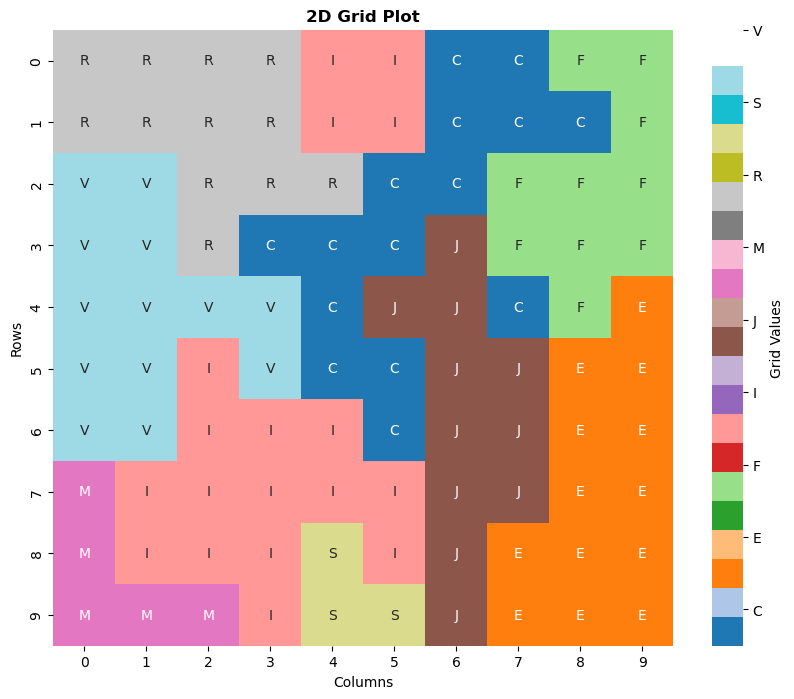

In [252]:
plot_2d_grid(example_grid)

In [253]:
def get_regions(grid):
    """ Get all distinct regions within the grid using 
        adapted flood-fill algorithm. 
    """
    seen = set()
    regions = []
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if (i,j) not in seen:
                # start flood-fill from that position
                same = [(i,j)]
                pos = 0
                while pos < len(same):
                    x, y = same[pos]
                    for x2, y2 in ((x+1,y), (x-1,y), (x,y+1), (x,y-1)):
    
                        # if within bounds of grid, and same as last cell value, add to our set
                        if 0 <= x2 < len(grid) and  0 <= y2 < len(grid[x2]) and \
                                (x2,y2) not in seen and grid[x2][y2] == grid[i][j]:
                            
                            same.append((x2,y2))
                            seen.add((x2,y2))
                    pos += 1

                region = set(same)

                # get number of non-touching edges in our value region
                non_touching_edges = count_non_touching_edges(region)
                flat_edges = count_flat_edges(region)
                
                # get size of region, and add to our set
                regions.append({'grid_value' : grid[i][j], 'size' : len(region), 
                                'non_touching_edges' : non_touching_edges,
                                'flat_edges' : flat_edges,
                                'region' : region})
    return regions


def count_non_touching_edges(cell_positions):
    """
    Counts how many edges of the given cells in a grid are not touching another cell in the same set.

    Parameters:
    cell_positions (list of tuples): A list of (row, column) tuples representing cell positions.

    Returns:
    int: The total number of edges not touching another cell in the set.
    """
    # use set for more efficient lookup
    cell_set = set(cell_positions)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    non_touching_edges = 0
    
    # Iterate over each cell in the set
    for r, c in cell_positions:
        for dr, dc in directions:
            neighbor = (r + dr, c + dc)
            
            # If the neighbor isn't in set, increment count
            if neighbor not in cell_set:
                non_touching_edges += 1
    return non_touching_edges


def count_flat_edges(cell_positions):
    """
    Counts the number of flat edges in a region defined by the given cell positions.

    Parameters:
    cell_positions (set of tuples): A set of (row, column) tuples representing cell positions.

    Returns:
    int: The number of flat edges of the region.
    """
    edges = set()

    for r, c in cell_positions:
        # Define edges relative to the grid position
        top_edge = (r, c, 'H')       # Top edge
        bottom_edge = (r + 1, c, 'H')  # Bottom edge
        left_edge = (r, c, 'V')      # Left edge
        right_edge = (r, c + 1, 'V')  # Right edge

        # Add or remove edges depending on their presence
        for edge in [top_edge, bottom_edge, left_edge, right_edge]:
            if edge in edges:
                edges.remove(edge)  # Shared edge, remove it
            else:
                edges.add(edge)  # New edge, add it

    # Remaining edges are flat edges
    return len(edges)

In [254]:
example_regions = get_regions(example_grid)

In [255]:
def calculate_fencing_price(grid):
    """ Compute total cost for fencing in grid area. """
    regions = get_regions(grid)
    total_cost = 0
    for region in regions:
        total_cost += region['size'] * region['non_touching_edges']
    return total_cost

In [256]:
calculate_fencing_price(example_grid)

1930

Correct for the example...Lets try on the actual input now:

In [257]:
data_dir = 'Day_12'
filename = 'day_12_input.txt'
grid = read_raw_text(os.path.join(data_dir, filename))
grid = np.array([list(x) for x in grid.split('\n')])
grid.shape

File successfully read.


(140, 140)

In [258]:
%time calculate_fencing_price(grid)

CPU times: user 52.9 ms, sys: 1.47 ms, total: 54.4 ms
Wall time: 53.4 ms


1344578

### Day 12, Part 2: Considering the number of sides of regions

With the discovered regions, we need to develop a reliable way of counting the number of distinct corners of the regions, which can then provide us with an accurate number of sides.

In [259]:
def get_regions(grid):
    """ Get all distinct regions within the grid using 
        adapted flood-fill algorithm. 
    """
    seen = set()
    regions = []
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if (i,j) not in seen:
                # start flood-fill from that position
                same = [(i,j)]
                pos = 0
                while pos < len(same):
                    x, y = same[pos]
                    for x2, y2 in ((x+1,y), (x-1,y), (x,y+1), (x,y-1)):
    
                        # if within bounds of grid, and same as last cell value, add to our set
                        if 0 <= x2 < len(grid) and  0 <= y2 < len(grid[x2]) and \
                                (x2,y2) not in seen and grid[x2][y2] == grid[i][j]:
                            
                            same.append((x2,y2))
                            seen.add((x2,y2))
                    pos += 1

                region = set(same)

                # get number of non-touching edges in our value region
                non_touching_edges = count_non_touching_edges(region)
                flat_edges = count_flat_edges(region)
                
                # get size of region, and add to our set
                regions.append({'grid_value' : grid[i][j], 'size' : len(region), 
                                'non_touching_edges' : non_touching_edges,
                                'flat_edges' : flat_edges,
                                'region' : region})
    return regions


def count_non_touching_edges(cell_positions):
    """
    Counts how many edges of the given cells in a grid are not touching another cell in the same set.

    Parameters:
    cell_positions (list of tuples): A list of (row, column) tuples representing cell positions.

    Returns:
    int: The total number of edges not touching another cell in the set.
    """
    # use set for more efficient lookup
    cell_set = set(cell_positions)
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    non_touching_edges = 0
    
    # Iterate over each cell in the set
    for r, c in cell_positions:
        for dr, dc in directions:
            neighbor = (r + dr, c + dc)
            
            # If the neighbor isn't in set, increment count
            if neighbor not in cell_set:
                non_touching_edges += 1
    return non_touching_edges


def count_flat_edges(cell_positions):
    """
    Counts the number of flat edges in a region defined by the given cell positions.

    Parameters:
    cell_positions (set of tuples): A set of (row, column) tuples representing cell positions.

    Returns:
    int: The number of flat edges of the region.
    """
    edges = set()

    for r, c in cell_positions:
        # Define edges relative to the grid position
        top_edge = (r, c, 'H')       # Top edge
        bottom_edge = (r + 1, c, 'H')  # Bottom edge
        left_edge = (r, c, 'V')      # Left edge
        right_edge = (r, c + 1, 'V')  # Right edge

        # Add or remove edges depending on their presence
        for edge in [top_edge, bottom_edge, left_edge, right_edge]:
            if edge in edges:
                edges.remove(edge)  # Shared edge, remove it
            else:
                edges.add(edge)  # New edge, add it

    # Remaining edges are flat edges
    return len(edges)

def count_corners(cell_positions):
    # use set for more efficient lookup
    cell_set = set(cell_positions)

    # up, down, left, right, up-left, up-right, down-left, down-right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1,-1), (-1,1), (1,-1), (1,1)]

    adjacent_cells = []
    
    # Iterate over each cell in the set
    for r, c in cell_positions:
        adjacent_cell = []
        for dr, dc in directions:
            neighbor = (r + dr, c + dc)
            
            # If the neighbor isn't in set, increment count
            if neighbor in cell_set:
                adjacent_cell.append(True) 
            else:
                adjacent_cell.append(False)

        adjacent_cells.append(adjacent_cell)
    return adjacent_cells

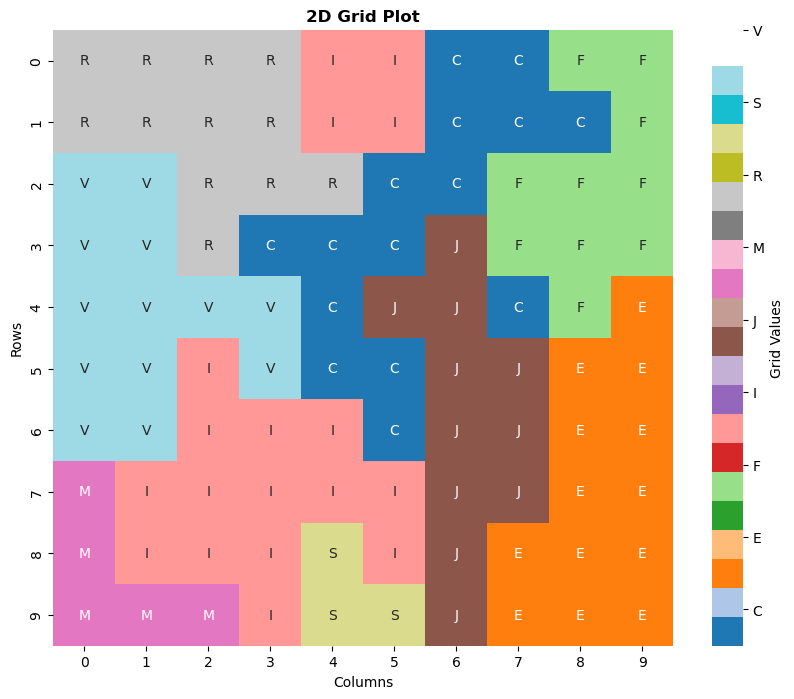

In [260]:
plot_2d_grid(example_grid)

In [261]:
example_regions = get_regions(example_grid)
example_regions[1]

{'grid_value': 'I',
 'size': 4,
 'non_touching_edges': 8,
 'flat_edges': 8,
 'region': {(0, 4), (0, 5), (1, 4), (1, 5)}}

In [262]:
count_corners(example_regions[1]['region'])

[[True, False, True, False, True, False, False, False],
 [False, True, False, True, False, False, False, True],
 [True, False, False, True, False, True, False, False],
 [False, True, True, False, False, False, True, False]]

## Day 13 Claw Contraption

### Day 13, Part 1

The claw machines here are a little unusual. Instead of a joystick or directional buttons to control the claw, these machines have two buttons labeled A and B. Worse, you can't just put in a token and play; it costs 3 tokens to push the A button and 1 token to push the B button.

With a little experimentation, you figure out that each machine's buttons are configured to move the claw a specific amount to the right (along the X axis) and a specific amount forward (along the Y axis) each time that button is pressed.

Each machine contains one prize; to win the prize, the claw must be positioned exactly above the prize on both the X and Y axes.

You wonder: what is the smallest number of tokens you would have to spend to win as many prizes as possible? You assemble a list of every machine's button behavior and prize location (your puzzle input). For example:

```
Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279
```

This list describes the button configuration and prize location of four different claw machines.

This problem represents an integer linear programming problem:

In [263]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [264]:
data_dir = 'Day_13'
example_input = read_raw_text(os.path.join(data_dir, 'example_input_day_13.txt'))
example_lines = [x.replace('\n', ' ') for x in example_input.split('\n\n')]

File successfully read.


In [265]:
def parse_input(text):
    """ Extract button info and prize coords using reg-ex """
    button_a_match = re.search(r"Button A: X\+(\d+), Y\+(\d+)", text)
    button_b_match = re.search(r"Button B: X\+(\d+), Y\+(\d+)", text)
    prize_match = re.search(r"Prize: X=(\d+), Y=(\d+)", text)

    if button_a_match and button_b_match and prize_match:
        # Extract X, Y values for Button A, Button B, and Prize
        x_a, y_a = int(button_a_match.group(1)), int(button_a_match.group(2))
        x_b, y_b = int(button_b_match.group(1)), int(button_b_match.group(2))
        x_prize, y_prize = int(prize_match.group(1)), int(prize_match.group(2))

        return x_a, y_a, x_b, y_b, x_prize, y_prize
    else:
        raise ValueError("Invalid input format")

In [269]:
def solve_optimization(x_a, y_a, x_b, y_b, x_prize, y_prize, costs=[3, 1], 
                       x0_bounds=101, x1_bounds=101):
    """ Solve optimisation using lin programming. 

        costs (array) : Costs for coefficients A and B in form [a_cost, b_cost]
    
    """
    # Coefficients for the objective function (minimize token cost)
    A = [[x_a, x_b],  # Coefficients for X equation
        [y_a, y_b]]   # Coefficients for Y equation

    # Right-hand side of the constraints
    b = [x_prize, y_prize]

    # Bounds for the variables (non-negative integers)
    x0_bounds = (0, x0_bounds)
    x1_bounds = (0, x1_bounds)

    # Solving the linear programming problem
    result = linprog(costs, A_eq=A, b_eq=b, bounds=[x0_bounds, x1_bounds], method='highs')

    if result.success:
        a_res, b_res = result.x
        return a_res, b_res, result.fun
    else:
        return 0, 0, result.fun

In [273]:
x_a, y_a, x_b, y_b, x_prize, y_prize = parse_input(example_lines[0])
a, b, out = solve_optimization(x_a, y_a, x_b, y_b, x_prize, y_prize)
print(f"Results: Button A {np.round(a)} times, Button B {np.round(b)} times, giving {out} output.")

Results: Button A 80.0 times, Button B 40.0 times, giving 280.0 output.


In [281]:
def get_results(lines, costs=[3, 1]):
    results = []
    for line in lines:
        x_a, y_a, x_b, y_b, x_prize, y_prize = parse_input(line)
        a, b, out = solve_optimization(x_a, y_a, x_b, y_b, x_prize, y_prize)

        x_output, y_output = compute_output(a, x_a, y_a, b, x_b, y_b)

        x_delta = np.abs(x_output - x_prize)
        y_delta = np.abs(y_output - y_prize)

        if x_delta < 0.01 and y_delta < 0.01:
            satisfied = True
        else:
            satisfied = False


        # only include result if successful
        if satisfied:
            results.append(compute_cost(a, b, costs))
        
    return int(sum(results))


def compute_output(a, x_a, y_a, b, x_b, y_b):
    x_position = (np.round(a) * x_a) + (np.round(b) * x_b)
    y_position = (np.round(a) * y_a) + (np.round(b) * y_b)
    return x_position, y_position


def compute_cost(a, b, costs):
    return (np.round(a) * costs[0]) + (np.round(b) * costs[1])

In [282]:
get_results(example_lines)

480

Lets try on the actual inputs now:

In [283]:
%%time
data_dir = 'Day_13'
input_lines = read_raw_text(os.path.join(data_dir, 'day_13_input.txt'))
input_lines = [x.replace('\n', ' ') for x in input_lines.split('\n\n')]
get_results(input_lines)

File successfully read.
CPU times: user 89.8 ms, sys: 13.5 ms, total: 103 ms
Wall time: 93 ms


36870

### Day 13, Part 2:

In [284]:
correct_term = 10000000000000

In [285]:
def parse_input_corrections(text, add_correction=10000000000000):
    """ Extract button info and prize coords using reg-ex """
    button_a_match = re.search(r"Button A: X\+(\d+), Y\+(\d+)", text)
    button_b_match = re.search(r"Button B: X\+(\d+), Y\+(\d+)", text)
    prize_match = re.search(r"Prize: X=(\d+), Y=(\d+)", text)

    if button_a_match and button_b_match and prize_match:
        # Extract X, Y values for Button A, Button B, and Prize
        x_a, y_a = int(button_a_match.group(1)), int(button_a_match.group(2))
        x_b, y_b = int(button_b_match.group(1)), int(button_b_match.group(2))
        x_prize, y_prize = int(prize_match.group(1)), int(prize_match.group(2))

        return x_a, y_a, x_b, y_b, x_prize + add_correction, y_prize + add_correction
    else:
        raise ValueError("Invalid input format")


def get_results(lines, costs=[3, 1]):
    results = []
    for line in lines:
        x_a, y_a, x_b, y_b, x_prize, y_prize = parse_input_corrections(line)
        a, b, out = solve_optimization(x_a, y_a, x_b, y_b, 
                                       x_prize, y_prize,
                                       x0_bounds=None,
                                       x1_bounds=None)

        x_output, y_output = compute_output(a, x_a, y_a, b, x_b, y_b)

        x_delta = np.abs(x_output - x_prize)
        y_delta = np.abs(y_output - y_prize)

        if x_delta < 0.01 and y_delta < 0.01:
            satisfied = True
        else:
            satisfied = False


        # only include result if successful
        if satisfied:
            results.append(compute_cost(a, b, costs))
        
    return int(sum(results))

In [286]:
parse_input_corrections(example_lines[0])

(94, 34, 22, 67, 10000000008400, 10000000005400)

In [287]:
get_results(example_lines)

875318608908

In [288]:
%time get_results(input_lines)

CPU times: user 97.2 ms, sys: 13.3 ms, total: 111 ms
Wall time: 99.7 ms


78101482023732

Success! Despite the complexity, that was extremely fast thanks to the optimised nature of the scipy optimise library.

## Day 14 Restroom Redoubt

### Day 14, Part 1:

In [341]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

def parse_position_velocity(data):
    """ Helper to extract position and velocity from input data. """
    # Split the string at 'v=' to separate position and velocity
    position_str, velocity_str = data.split(' v=')

    # Extract the position values (after 'p=')
    position = tuple(map(int, position_str.split('=')[1].split(',')))

    # Extract the velocity values (split by the comma)
    velocity = tuple(map(int, velocity_str.split(',')))

    return position, velocity

def create_grid(n_rows, n_cols, default_val='.'):
    return np.array([['.' for x in range(n_cols)] for y in range(n_rows)])

def future_position(p, v, n=1):
    """ Compute future position 'n' seconds forward in time. """
    current_x, current_y = p
    vel_x, vel_y = v
    future_x = current_x + (vel_x * n)
    future_y = current_y + (vel_y * n)
    return (future_x, future_y)

def get_local_position(p, grid_shape):
    """ Determine equivalent local position of robot based on position, 
        which might be out of bounds of grid size. 
    """
    local_px = p[0] % grid_shape[1]
    local_py = p[1] % grid_shape[0]
    return (local_px, local_py)

def add_future_positions(positions, grid):
    """ Create a grid with future positions on it. """
    grid_results = np.zeros(grid.shape)
    for p in positions:
        grid_results[p[1], p[0]] += 1
    return grid_results

def get_quadrant_results(position_grid):
    """ Sum all quadrant results (not including zero centre
        column and centre row values). 
    """
    centre_row = int(np.floor(position_grid.shape[0] / 2))
    centre_col = int(np.floor(position_grid.shape[1] / 2))

    results_arr = position_grid.copy()
    
    # set centre column and row to zero
    results_arr[centre_row, :] = 0.0
    results_arr[:, centre_col] = 0.0
    
    q1 = results_arr[:centre_row, :centre_col].sum()
    q2 = results_arr[:centre_row, centre_col:].sum()
    q3 = results_arr[centre_row:, :centre_col].sum()
    q4 = results_arr[centre_row:, centre_col:].sum()
    
    return int(q1 * q2 * q3 * q4)

In [342]:
data_dir = 'Day_14'
example_input = read_raw_text(os.path.join(data_dir, "example_input_day_14.txt")).split('\n')
example_robots = [parse_position_velocity(robot) for robot in example_input]
example_grid = create_grid(7,11)

File successfully read.


In [343]:
example_grid.shape

(7, 11)

In [344]:
example_robots[0]

((0, 4), (3, -3))

In [345]:
future_positions = [get_local_position(future_position(x[0], x[1], n=100), example_grid.shape) for x in example_robots]
position_grid = add_future_positions(future_positions, example_grid)
get_quadrant_results(position_grid)

12

This answer is correct for the example. Now lets try it on the real input:

In [346]:
data_dir = 'Day_14'
input_robots = read_raw_text(os.path.join(data_dir, "day_14_input.txt")).split('\n')
input_robots = [parse_position_velocity(robot) for robot in input_robots]
input_grid = create_grid(103,101)

File successfully read.


In [347]:
input_grid.shape, len(input_robots)

((103, 101), 500)

In [348]:
%%time
future_positions = [get_local_position(future_position(x[0], x[1], n=100), input_grid.shape) for x in input_robots]
position_grid = add_future_positions(future_positions, input_grid)
get_quadrant_results(position_grid)

CPU times: user 1.24 ms, sys: 176 μs, total: 1.42 ms
Wall time: 1.32 ms


225810288

### Day 14, Part 2 - Christmas tree

All things considered, no idea how the christmas tree might look for this example! The only assumption I will make is that all grid positions will be one for this unique situation (this is a guess and may not be right, as based on a comment on reddit!).

In [349]:
future_positions = [get_local_position(future_position(x[0], x[1], n=1), input_grid.shape) for x in input_robots]
position_grid = add_future_positions(future_positions, input_grid)
np.unique(position_grid, return_counts=True)[0].shape[0]

3

In [320]:
%%time

grid_shape = input_grid.shape

for i in range(0, 100000):
    future_positions = [get_local_position(future_position(x[0], x[1], n=i), input_grid.shape) for x in input_robots]
    position_grid = add_future_positions(future_positions, input_grid)
    if np.unique(position_grid, return_counts=True)[0].shape[0] == 2:
        print(f"Number of attempts to get all 1's: {i}")
        break

Number of attempts to get all 1's: 6752
CPU times: user 1.61 s, sys: 4.43 ms, total: 1.61 s
Wall time: 1.61 s


In [321]:
np.savetxt(os.path.join(data_dir, 'day_14_christmas_tree.txt'), position_grid.astype(int), fmt='%.0f')

The all unique assumption turned out to be correct for this!

## Day 15 Warehouse Woes

### Day 15, Part 1:

The lanternfish already have a map of the warehouse and a list of movements the robot will attempt to make (your puzzle input). The problem is that the movements will sometimes fail as boxes are shifted around, making the actual movements of the robot difficult to predict.

For example:

```
##########
#..O..O.O#
#......O.#
#.OO..O.O#
#..O@..O.#
#O#..O...#
#O..O..O.#
#.OO.O.OO#
#....O...#
##########

<vv>^<v^>v>^vv^v>v<>v^v<v<^vv<<<^><<><>>v<vvv<>^v^>^<<<><<v<<<v^vv^v>^
vvv<<^>^v^^><<>>><>^<<><^vv^^<>vvv<>><^^v>^>vv<>v<<<<v<^v>^<^^>>>^<v<v
><>vv>v^v^<>><>>>><^^>vv>v<^^^>>v^v^<^^>v^^>v^<^v>v<>>v^v^<v>v^^<^^vv<
<<v<^>>^^^^>>>v^<>vvv^><v<<<>^^^vv^<vvv>^>v<^^^^v<>^>vvvv><>>v^<<^^^^^
^><^><>>><>^^<<^^v>>><^<v>^<vv>>v>>>^v><>^v><<<<v>>v<v<v>vvv>^<><<>^><
^>><>^v<><^vvv<^^<><v<<<<<><^v<<<><<<^^<v<^^^><^>>^<v^><<<^>>^v<v^v<v^
>^>>^v>vv>^<<^v<>><<><<v<<v><>v<^vv<<<>^^v^>^^>>><<^v>>v^v><^^>>^<>vv^
<><^^>^^^<><vvvvv^v<v<<>^v<v>v<<^><<><<><<<^^<<<^<<>><<><^^^>^^<>^>v<>
^^>vv<^v^v<vv>^<><v<^v>^^^>>>^^vvv^>vvv<>>>^<^>>>>>^<<^v>^vvv<>^<><<v>
v^^>>><<^^<>>^v^<v^vv<>v^<<>^<^v^v><^<<<><<^<v><v<>vv>>v><v^<vv<>v^<<^
```

As the robot (@) attempts to move, if there are any boxes (O) in the way, the robot will also attempt to push those boxes. However, if this action would cause the robot or a box to move into a wall (#), nothing moves instead, including the robot. The initial positions of these are shown on the map at the top of the document the lanternfish gave you.

The rest of the document describes the moves (^ for up, v for down, < for left, > for right) that the robot will attempt to make, in order. (The moves form a single giant sequence; they are broken into multiple lines just to make copy-pasting easier. Newlines within the move sequence should be ignored.)

The lanternfish use their own custom Goods Positioning System (GPS for short) to track the locations of the boxes. The GPS coordinate of a box is equal to 100 times its distance from the top edge of the map plus its distance from the left edge of the map. (This process does not stop at wall tiles; measure all the way to the edges of the map.)

The lanternfish would like to know the sum of all boxes' GPS coordinates after the robot finishes moving. In the larger example, the sum of all boxes' GPS coordinates is 10092. In the smaller example, the sum is 2028.

In [322]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

def get_grid_and_commands(text_lines):
    grid_indices = []
    for i, line in enumerate(text_lines):
        if '#####' in line:
            grid_indices.append(i)
    grid_array = get_grid_array(text_lines[:grid_indices[1] + 1])
    return grid_array, text_lines[grid_indices[1]+2:]

def get_grid_array(text_lines):
    return np.array([list(line) for line in text_lines])

In [323]:
data_dir = 'Day_15'
example_input = read_raw_text(os.path.join(data_dir, "example_input_day_15.txt")).split('\n')
example_grid, example_commands = get_grid_and_commands(example_input)
example_grid = np.array([list(line) for line in example_grid])
example_commands = np.array([list(x) for x in example_commands]).flatten()

File successfully read.


In [324]:
example_grid

array([['#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
       ['#', '.', '.', 'O', '.', '.', 'O', '.', 'O', '#'],
       ['#', '.', '.', '.', '.', '.', '.', 'O', '.', '#'],
       ['#', '.', 'O', 'O', '.', '.', 'O', '.', 'O', '#'],
       ['#', '.', '.', 'O', '@', '.', '.', 'O', '.', '#'],
       ['#', 'O', '#', '.', '.', 'O', '.', '.', '.', '#'],
       ['#', 'O', '.', '.', 'O', '.', '.', 'O', '.', '#'],
       ['#', '.', 'O', 'O', '.', 'O', '.', 'O', 'O', '#'],
       ['#', '.', '.', '.', '.', 'O', '.', '.', '.', '#'],
       ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#']], dtype='<U1')

In [325]:
class GridMap:
    def __init__(self, grid, moves):
        """Initialize the grid."""
        self.grid = grid.copy()
        self.grid_history = self.grid.copy()
        self.planned_moves = moves
        
        self.n_rows = grid.shape[0]
        self.n_cols = grid.shape[1]
        self.directions = {'>': (0, 1), '<': (0, -1), '^': (-1, 0), 'v': (1, 0)}

        # current move index position
        self.move_count = 0
        
        self.current_position = self._find_robot_position()

        # record of movements, incl directions
        self.visited = set()
        if self.current_position:
            self._update_history()

        # signify end of guard patrol
        self.moves_complete = False

    def _find_robot_position(self):
            """Find and return the robots current location. """
            for r in range(self.n_rows):
                for c in range(self.n_cols):
                    if self.grid[r][c] == '@':
                        return (r, c)
            return None

    def _update_history(self):
        """ Keep track of history for debugging / info. """
        self.visited.add((
                self.move_count,
                self.current_position[0], 
                self.current_position[1],
                self._next_move()))

    def _next_move(self):
        """ Return the next planned movement. """
        return self.planned_moves[self.move_count]

    def _check_box(self, row, col):
         if self.grid[row][col] == 'O':
             return True

    def move_box(self, row, col, direction):
        """ Attempt to move boxes in current direction. """
        dr, dc = self.directions[direction]
        target_row = row + dr
        target_col = col + dc
        
        # Check how far the boxes can move
        while (0 <= target_row < self.n_rows and 0 <= target_col < self.n_cols) and (self.grid[target_row][target_col] == 'O'):
            target_row += dr
            target_col += dc

        # If the next cell is free, push the boxes and move the robot
        if 0 <= target_row < self.n_rows and 0 <= target_col < self.n_cols and self.grid[target_row][target_col] == '.':
            while (target_row, target_col) != (row, col):
                prev_row = target_row - dr
                prev_col = target_col - dc
                self.grid[target_row][target_col] = 'O'
                self.grid[prev_row][prev_col] = '.'
                target_row, target_col = prev_row, prev_col
    
    def _check_grid_end(self, row, col):
        """ Check if next move will move off of the grid (end). """
        if (row>=self.n_rows or row<0) or (col>=self.n_cols or col<0) or (self.grid[row][col] == '#'):
            return True

    def _update_current_position(self, position):
        """ Perform series of actions to update current position. """
        
        old_x, old_y = self.current_position
        new_x, new_y = position

        self.current_position = position

        self._update_history()

        # remove old position from current grid
        self.grid[old_x][old_y] = '.'

        # update new position with indicator on our grid
        self.grid[new_x, new_y] = '@'
        
    def _get_next_position(self):
        """" Get next intended position, based on current position """
        x, y = self.current_position
        direction = self._next_move()
        
        delta_x, delta_y = self.directions[direction]
        next_x = x + delta_x
        next_y = y + delta_y

        # validate end of grid - consume move and remain in current position
        if self._check_grid_end(next_x, next_y):
            return self.current_position

        # if box, initiate box movement procedure
        elif self._check_box(next_x, next_y):

            # attempt to move boxes in designated direction
            self.move_box(next_x, next_y, direction)

            # if still box after above - we havent moved
            if self._check_box(next_x, next_y):
                return self.current_position
            # otherwise - we can move to new position
            else:
                return next_x, next_y

        # if no box or grid end, we can move
        else:
            return next_x, next_y
        
    def move(self):
        """ If there is something directly in front, turn right 90 degrees, 
            otherwise, take a step forward.
        """
        if self.moves_complete:
            print('Robot has completed all planned moves. No more movements to carry out!')
            return

        else:
            # determine next position to move based on current position and direction
            next_position = self._get_next_position()

            # formally update our position (x, y, direction) and grid history
            self._update_current_position(next_position)

            # add to our record of total movements
            self.move_count += 1

            # if all moves consumed, change moves complete to true
            if self.move_count == self.planned_moves.shape[0]:
                self.moves_complete = True

    
    def solve_movements(self, attempt_limit=25000):
        while not self.moves_complete and self.move_count < attempt_limit:
            _ = self.move()
        if self.move_count >= attempt_limit:
            print(f"Cancelling this attempt after {self.move_count} attempts!")
        return

In [326]:
example_gridmap = GridMap(example_grid, example_commands)
example_gridmap.solve_movements()
example_gridmap.move_count

700

In [327]:
example_gridmap.grid

array([['#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
       ['#', '.', 'O', '.', 'O', '.', 'O', 'O', 'O', '#'],
       ['#', '.', '.', '.', '.', '.', '.', '.', '.', '#'],
       ['#', 'O', 'O', '.', '.', '.', '.', '.', '.', '#'],
       ['#', 'O', 'O', '@', '.', '.', '.', '.', '.', '#'],
       ['#', 'O', '#', '.', '.', '.', '.', '.', 'O', '#'],
       ['#', 'O', '.', '.', '.', '.', '.', 'O', 'O', '#'],
       ['#', 'O', '.', '.', '.', '.', '.', 'O', 'O', '#'],
       ['#', 'O', 'O', '.', '.', '.', '.', 'O', 'O', '#'],
       ['#', '#', '#', '#', '#', '#', '#', '#', '#', '#']], dtype='<U1')

Good, this matches the example given. Lets now calculate the final cost and run this on the real inputs.

In [335]:
def compute_gps_score(grid):
    row_dists, col_dists = np.where(grid == 'O')
    return np.sum((row_dists * 100) + col_dists)

gps_cost = compute_gps_score(example_gridmap.grid)
print(f"Final GPS score: {gps_cost}")

Final GPS score: 10092


With the real input data:

In [336]:
data_dir = 'Day_15'
input_data = read_raw_text(os.path.join(data_dir, "day_15_input.txt")).split('\n')
grid, commands = get_grid_and_commands(input_data)
grid = np.array([list(line) for line in grid])
commands = np.array([list(x) for x in commands]).flatten()
grid.shape, commands.shape

File successfully read.


((50, 50), (20000,))

In [337]:
input_gridmap = GridMap(grid, commands)
input_gridmap.solve_movements()
input_gridmap.move_count

20000

In [338]:
gps_cost = compute_gps_score(input_gridmap.grid)
print(f"Final GPS score: {gps_cost}")

Final GPS score: 1509863


Correct!

### Day 15, Part 2:

The lanternfish use your information to find a safe moment to swim in and turn off the malfunctioning robot! Just as they start preparing a festival in your honor, reports start coming in that a second warehouse's robot is also malfunctioning.

This warehouse's layout is surprisingly similar to the one you just helped. There is one key difference: everything except the robot is twice as wide! The robot's list of movements doesn't change.

To get the wider warehouse's map, start with your original map and, for each tile, make the following changes:

```
If the tile is #, the new map contains ## instead.
If the tile is O, the new map contains [] instead.
If the tile is ., the new map contains .. instead.
If the tile is @, the new map contains @. instead.
```

Because boxes are now twice as wide but the robot is still the same size and speed, boxes can be aligned such that they directly push two other boxes at once.

This warehouse also uses GPS to locate the boxes. For these larger boxes, distances are measured from the edge of the map to the closest edge of the box in question.

In [350]:
def transform_grid(grid):
    """ Transform grid into expanded-width Part 2 version """
    new_grid = np.zeros((grid.shape[0], grid.shape[1]*2)).astype(int)
    new_grid = new_grid.astype(str)

    # by defualt, set all cells to '.'
    new_grid[:, :] = '.'

    # transform barriers (#)
    barrier_rows, barrier_cols = np.where(grid == '#')
    new_grid[barrier_rows, barrier_cols * 2] = '#'
    new_grid[barrier_rows, (barrier_cols * 2) + 1] = '#'

    # transform robot position
    robot_row, robot_col = np.where(grid == '@')
    new_grid[robot_row, robot_col * 2] = '@' 

    box_rows, box_cols = np.where(grid == 'O')
    new_grid[box_rows, box_cols * 2] = '['
    new_grid[box_rows, (box_cols * 2) + 1] = ']'
    
    return new_grid

In [351]:
class GridMapV2:
    def __init__(self, grid, moves):
        """Initialize the grid."""
        self.grid = grid.copy()
        self.grid_history = self.grid.copy()
        self.planned_moves = moves
        
        self.n_rows = grid.shape[0]
        self.n_cols = grid.shape[1]
        self.directions = {'>': (0, 1), '<': (0, -1), '^': (-1, 0), 'v': (1, 0)}

        # current move index position
        self.move_count = 0
        
        self.current_position = self._find_robot_position()

        # record of movements, incl directions
        self.visited = set()
        if self.current_position:
            self._update_history()

        # signify end of guard patrol
        self.moves_complete = False

    def _find_robot_position(self):
            """Find and return the robots current location. """
            for r in range(self.n_rows):
                for c in range(self.n_cols):
                    if self.grid[r][c] == '@':
                        return (r, c)
            return None

    def _update_history(self):
        """ Keep track of history for debugging / info. """
        self.visited.add((
                self.move_count,
                self.current_position[0], 
                self.current_position[1],
                self._next_move()))

    def _next_move(self):
        """ Return the next planned movement. """
        return self.planned_moves[self.move_count]

    def _check_box(self, row, col):
         if self.grid[row][col] in ['[', ']']:
             return True

    def display_grid(self):
        return ["".join(list(x)) for x in self.grid]

    
    def move_box(self, row, col, direction):
        """ Attempt to move boxes in current direction. """
        # check if direction sidewards or not
        if direction in ['<', '>']:
            self.move_box_sidewards(row, col, direction)
        else:
            self.move_box_vertically(row, col, direction)

    
    def move_box_sidewards(self, row, col, direction):
        """ Attempt to move boxes in current direction. """
        
        # get transform for given motion
        dr, dc = self.directions[direction]
        
        target_row = row + dr
        target_col = col + dc
        
        # Check how far the boxes can move
        while (0 <= target_row < self.n_rows and 0 <= target_col < self.n_cols) and (self.grid[target_row][target_col] in ['[', ']']):
            target_row += dr
            target_col += dc

        # If the next cell is free, push the boxes and move the robot
        if 0 <= target_row < self.n_rows and 0 <= target_col < self.n_cols and self.grid[target_row][target_col] == '.':
            while (target_row, target_col) != (row, col):
                prev_row = target_row - dr
                prev_col = target_col - dc
                
                # set new one to same as old one
                initial_value = self.grid[prev_row][prev_col]
                self.grid[target_row][target_col] = initial_value

                # set old one to free space (until next update)
                self.grid[prev_row][prev_col] = '.'
                target_row, target_col = prev_row, prev_col

    
    def move_box_vertically(self, row, col, direction):
        """ Attempt to move boxes in current direction. 

        Args:
            row (int) : row of the box currently.
            col (int) : column of the box currently.
            direction (str) : Direction to move box ('^' or 'v')
        """
        box_set = set()
        results = []
        
        self.get_vertical_move_boxes(row, col, direction, box_set, results)

        # only move box if all positions valid, otherwise do nothing
        if all(results):
            self.move_boxes(box_set, direction)
            

    def _check_grid_end(self, row, col):
        """ Check if next move will move off of the grid (end). """
        if (row>=self.n_rows or row<0) or (col>=self.n_cols or col<0) or (self.grid[row][col] == '#'):
            return True

    
    def _update_current_position(self, position):
        """ Perform series of actions to update current position. """
        
        old_x, old_y = self.current_position
        new_x, new_y = position

        self.current_position = position

        self._update_history()

        # remove old position from current grid
        self.grid[old_x][old_y] = '.'

        # update new position with indicator on our grid
        self.grid[new_x, new_y] = '@'

        
    def _get_next_position(self):
        """" Get next intended position, based on current position """
        x, y = self.current_position
        direction = self._next_move()
        
        delta_x, delta_y = self.directions[direction]
        next_x = x + delta_x
        next_y = y + delta_y

        # validate end of grid - consume move and remain in current position
        if self._check_grid_end(next_x, next_y):
            return self.current_position

        # if box, initiate box movement procedure
        elif self._check_box(next_x, next_y):

            # attempt to move boxes in designated direction
            self.move_box(next_x, next_y, direction)

            # if still box after above - we havent moved
            if self._check_box(next_x, next_y):
                return self.current_position
            # otherwise - we can move to new position
            else:
                return next_x, next_y

        # if no box or grid end, we can move
        else:
            return next_x, next_y

        
    def move(self):
        """ If there is something directly in front, turn right 90 degrees, 
            otherwise, take a step forward.
        """
        if self.moves_complete:
            print('Robot has completed all planned moves. No more movements to carry out!')
            return

        else:
            # determine next position to move based on current position and direction
            next_position = self._get_next_position()

            # formally update our position (x, y, direction) and grid history
            self._update_current_position(next_position)

            # add to our record of total movements
            self.move_count += 1

            # if all moves consumed, change moves complete to true
            if self.move_count == self.planned_moves.shape[0]:
                self.moves_complete = True

    
    def solve_movements(self, attempt_limit=25000):
        while not self.moves_complete and self.move_count < attempt_limit:
            _ = self.move()
        if self.move_count >= attempt_limit:
            print(f"Cancelling this attempt after {self.move_count} attempts!")
        return


    def get_vertical_move_boxes(self, row, col, direction, box_set, results):
        """ If we find boxes, continue recursively finding boxes and validating until
            all box positions are confirmed move friendly, or alternatively we 
            encounter an obstacle and cannot move.
        """
        box_half = self.grid[row][col]
    
        if direction == '^':
            dy = -1
        else:
            dy = 1
        
        # if left half, check cells up and up-right for objects / other boxes
        if box_half == '[':
            second_half = (row, col+1)
            up1 = (row+dy, col)
            up2 = (row+dy, col+1)
        
        # if right half, check cells up and up-left
        else:
            second_half = (row, col-1)
            up1 = (row+dy, col)
            up2 = (row+dy, col-1)
            
        up1_val = self.grid[up1[0]][up1[1]]
        up2_val = self.grid[up2[0]][up2[1]]
    
        # if not already in our set, add current co-ords for box halves
        box_set.add((row,col))
    
        if second_half not in box_set:
            # we also need to call this same function recursively on box half 2
            box_set.add(second_half)
            self.get_vertical_move_boxes(second_half[0], second_half[1],
                                    direction, box_set, results)
    
    
        if up1_val == '#' or up2_val == '#':
            #print("Obstacle or other issue detected... not moving.")
            #print(f"{up1}: {up1_val}, {up2} : {up2_val}")
            results.extend([False])
    
        elif up1_val in ['[', ']'] or up2_val in ['[', ']']:
            # Add to our set of box nodes and continue adding
    
            if up1_val in ['[', ']'] and up1 not in box_set:
                box_set.add(up1)
                #print(f"Continuing search of boxes at co-ords: {up1[0]}, {up1[1]}")
                self.get_vertical_move_boxes(up1[0], up1[1], direction, box_set, results)
    
            if up2_val in ['[', ']'] and up2 not in box_set:
                box_set.add(up2)
                #print(f"Continuing search of boxes at co-ords: {up2[0]}, {up2[1]}")
                self.get_vertical_move_boxes(up2[0], up2[1], direction, box_set, results)
             
        elif up1_val == '.' and up2_val == '.':
            # we can move - perform move
            #print("We can move... moving....")
            results.extend([True])
            
        else:
            # some other problem, cannot move - return False
            #print("Further problem / unknown condition - not moving...")
            #print(f"{up1}: {up1_val}, {up2} : {up2_val}")
            results.extend([False])

    def move_boxes(self, box_coord_set, direction):
        if direction == '^':
            dy = -1
            # work from top to bottom order for updating values
            sorted_boxes = sorted(box_coord_set, key= lambda x: x[0])
        else:
            dy = 1
            # if downwards, work from bottom to top for updating
            sorted_boxes = sorted(box_coord_set, reverse=True, key= lambda x: x[0])
    
        for coords in sorted_boxes:
            cell_value = self.grid[coords[0]][coords[1]]
            self.grid[coords[0] + dy][coords[1]] = cell_value
            self.grid[coords[0]][coords[1]] = "."

In [353]:
data_dir = 'Day_15'
example_input = read_raw_text(os.path.join(data_dir, "example_input_day_15.txt")).split('\n')
example_grid, example_commands = get_grid_and_commands(example_input)

example_grid = np.array([list(line) for line in example_grid])
example_commands = np.array([list(x) for x in example_commands]).flatten()

tx_grid = transform_grid(example_grid)
example_gridmap = GridMapV2(tx_grid, example_commands)

File successfully read.


In [354]:
example_gridmap.solve_movements()
example_gridmap.display_grid()

['####################',
 '##[].......[].[][]##',
 '##[]...........[].##',
 '##[]........[][][]##',
 '##[]......[]....[]##',
 '##..##......[]....##',
 '##..[]............##',
 '##..@......[].[][]##',
 '##......[][]..[]..##',
 '####################']

In [356]:
def compute_gps_score_v2(grid):
    row_dists, col_dists = np.where(grid == '[')
    return np.sum((row_dists * 100) + col_dists)

gps_cost = compute_gps_score_v2(example_gridmap.grid)
print(f"Final GPS score: {gps_cost}")

Final GPS score: 9021


This perfectly aligns with the example. Let's now try it on the real inputs:

In [357]:
data_dir = 'Day_15'
input_data = read_raw_text(os.path.join(data_dir, "day_15_input.txt")).split('\n')
grid, commands = get_grid_and_commands(input_data)
grid = np.array([list(line) for line in grid])
commands = np.array([list(x) for x in commands]).flatten()

tx_grid = transform_grid(grid)
input_gridmap = GridMapV2(tx_grid, commands)

File successfully read.


In [358]:
input_gridmap.grid.shape, commands.shape

((50, 100), (20000,))

In [359]:
%%time
input_gridmap.solve_movements()

CPU times: user 65.3 ms, sys: 2.23 ms, total: 67.6 ms
Wall time: 66.2 ms


In [360]:
gps_cost = compute_gps_score_v2(input_gridmap.grid)
print(f"Final GPS score: {gps_cost}")

Final GPS score: 1548815


## Day 16 - Reindeer Maze

### Day 16, Part 1:

The Reindeer start on the Start Tile (marked S) facing East and need to reach the End Tile (marked E). They can move forward one tile at a time (increasing their score by 1 point), but never into a wall (#). They can also rotate clockwise or counterclockwise 90 degrees at a time (increasing their score by 1000 points). What is the lowest score a Reindeer could possibly get?

In [361]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [363]:
data_dir = 'Day_16'
example_maze = read_raw_text(os.path.join(data_dir, 'example_input_day_16.txt')).split('\n')
example_maze = [list(x) for x in example_maze]

File successfully read.


In [364]:
example_maze

[['#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#'],
 ['#', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', 'E', '#'],
 ['#', '.', '#', '.', '#', '#', '#', '.', '#', '.', '#', '#', '#', '.', '#'],
 ['#', '.', '.', '.', '.', '.', '#', '.', '#', '.', '.', '.', '#', '.', '#'],
 ['#', '.', '#', '#', '#', '.', '#', '#', '#', '#', '#', '.', '#', '.', '#'],
 ['#', '.', '#', '.', '#', '.', '.', '.', '.', '.', '.', '.', '#', '.', '#'],
 ['#', '.', '#', '.', '#', '#', '#', '#', '#', '.', '#', '#', '#', '.', '#'],
 ['#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '#'],
 ['#', '#', '#', '.', '#', '.', '#', '#', '#', '#', '#', '.', '#', '.', '#'],
 ['#', '.', '.', '.', '#', '.', '.', '.', '.', '.', '#', '.', '#', '.', '#'],
 ['#', '.', '#', '.', '#', '.', '#', '#', '#', '.', '#', '.', '#', '.', '#'],
 ['#', '.', '.', '.', '.', '.', '#', '.', '.', '.', '#', '.', '#', '.', '#'],
 ['#', '.', '#', '#', '#', '.', '#', '.', '#', '.', '#', '.', '#

To solve this maze with minimal cost overall, we need to considers both movement and turning costs, whilst simultaneously solving the maze (which has loops also!). 

The most effective approach would be a modified A (A-star) search algorithm* that incorporates the cost of movement and turning into its heuristic and cost calculation. The challenge is introducing a heuristic into this will modify the cost function, and thus make it incorrect relative to the expected answer. We'll ignore this for now and not use a heuristic, but ideally for future, more complex mazes, this would become more necessary.

Although we could use a standard data structure (e.g. lists, tuples, or queue), we'll make use of a more efficient priority queue using the heapq library. This gives retrieval of the smallest element O(log n), and insertion loss of O(log n). We'll use the cost as the first element of each entry in our priority queue. This means that the smallest element (best cost) is always at the top of the heap. The element in our heap will be in the form (cost, x, y, direction). This ensures that the best cost route is more efficiently available.

In [365]:
import heapq

def solve_maze(maze, start, end, add_heuristic=False):
    directions = ['N', 'E', 'S', 'W']  # Cardinal directions
    dx_dy = {'N': (-1, 0), 'E': (0, 1), 'S': (1, 0), 'W': (0, -1)}
    
    def turn_cost(current, new):
        current_idx = directions.index(current)
        new_idx = directions.index(new)
        return 1000 if current_idx != new_idx else 0
    
    def is_valid(x, y):
        return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != '#'
    
    def heuristic(x, y):
        return abs(end[0] - x) + abs(end[1] - y)
    
    # Priority queue for A* search
    pq = []

    # push our initial direction and location to our priority queue
    start_direction = 'E'
    heapq.heappush(pq, (0, start[0], start[1], start_direction))

    # store the parent of all of our states (to maintain route history)
    parent = {}

    # store the lowest cost at which each state was visited
    # if we resit a state with higher or equal cost, we skip (this avoids inf loops)
    visited = {}
    
    while pq:
        cost, x, y, direction = heapq.heappop(pq)
        
        if (x, y) == end:
            # get best path - go through history until we're back at start (no parent)
            path = []
            current = (x, y, direction)
            while current in parent:
                path.append(current)
                current = parent[current]

            # finally add our start state
            path.append((start[0], start[1], start_direction))

            # return cost and path (in order)
            return cost, path[::-1]

        # if we've already visited this state with lower cost, skip
        if (x, y, direction) in visited and visited[(x, y, direction)] <= cost:
            continue

        # add current state and cost
        visited[(x, y, direction)] = cost
        
        # assess movements for current position
        for new_direction in directions:
            new_cost = cost + turn_cost(direction, new_direction)
            nx, ny = x + dx_dy[new_direction][0], y + dx_dy[new_direction][1]
            
            if is_valid(nx, ny):
                new_state = (nx, ny, new_direction)
                if add_heuristic:
                    heapq.heappush(pq, (new_cost + 1 + heuristic(nx, ny), 
                                        nx, ny, new_direction))
                else:
                    heapq.heappush(pq, (new_cost + 1, nx, ny, new_direction))

                # if not already in parent, or new cost is better, add to parent dict
                if new_state not in visited or visited[new_state] > new_cost + 1:
                    parent[new_state] = (x, y, direction)

    # if no path found inf cost, empty list
    return float('inf'), []  

In [366]:
example_maze[13][1], example_maze[1][13]

('S', 'E')

In [367]:
start = (13, 1)  # Coordinates of 'S'
end = (1, 13)    # Coordinates of 'E'

example_cost, example_route = solve_maze(example_maze, start, end)

print(f"Final cost: {example_cost}")

Final cost: 7036


This matches the example exercise! Although the problem with this in particular is that we cannot use our heuristic; it changes the cost. As mazes become more challenging, this could become an issue as brute forcing every route becomes intractable.

In [368]:
data_dir = 'Day_16'
input_maze = read_raw_text(os.path.join(data_dir, 'day_16_input.txt')).split('\n')
input_maze = [list(x) for x in input_maze]

print(f'Size of maze: {len(input_maze)} x {len(input_maze[0])}')

File successfully read.
Size of maze: 141 x 141


In [369]:
def find_character(grid, character):
    """ Helper function to find specific value(s) in grid. """
    array = np.array(grid).astype(str)
    location = np.where(array == character)
    return list(location[0]), list(location[1])

In [370]:
start_x, start_y = find_character(input_maze, 'S')
end_x, end_y = find_character(input_maze, 'E')

In [374]:
start_x, start_y

([139], [1])

In [375]:
input_cost, input_route = solve_maze(input_maze, (start_x[0], start_y[0]), 
                                     (end_x[0], end_y[0]))

print(f"Final cost: {input_cost}")

Final cost: 98416


In [376]:
len(input_route)

421

### Day 16, Part 2:

Every non-wall tile (S, ., or E) is equipped with places to sit along the edges of the tile. While determining which of these tiles would be the best spot to sit depends on a whole bunch of factors (how comfortable the seats are, how far away the bathrooms are, whether there's a pillar blocking your view, etc.), the most important factor is whether the tile is on one of the best paths through the maze. If you sit somewhere else, you'd miss all the action!

So, you'll need to determine which tiles are part of any best path through the maze, including the S and E tiles.

In [377]:
def solve_maze_all_paths(maze, start, end, add_heuristic=False):
    directions = ['N', 'E', 'S', 'W']  # Cardinal directions
    dx_dy = {'N': (-1, 0), 'E': (0, 1), 'S': (1, 0), 'W': (0, -1)}

    def turn_cost(current, new):
        current_idx = directions.index(current)
        new_idx = directions.index(new)
        return 1000 if current_idx != new_idx else 0

    def is_valid(x, y):
        return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != '#'

    def heuristic(x, y):
        return abs(end[0] - x) + abs(end[1] - y)

    # Priority queue for A* search
    pq = []
    start_direction = 'E' 
    heapq.heappush(pq, (0, start[0], start[1], start_direction))
    visited = {}
    parents = defaultdict(list)  # Each state maps to a list of parent states

    while pq:
        cost, x, y, direction = heapq.heappop(pq)

        # If this state has already been visited with a lower or equal cost, skip it
        if (x, y, direction) in visited and visited[(x, y, direction)] <= cost:
            continue

        # Mark the state as visited with the current cost
        visited[(x, y, direction)] = cost

        # Explore movements
        for new_direction in directions:
            new_cost = cost + turn_cost(direction, new_direction)
            nx, ny = x + dx_dy[new_direction][0], y + dx_dy[new_direction][1]

            if is_valid(nx, ny):
                new_state = (nx, ny, new_direction)

                if add_heuristic:
                    heapq.heappush(pq, (new_cost + 1 + heuristic(nx, ny), nx, ny, new_direction))
                else:
                    heapq.heappush(pq, (new_cost + 1, nx, ny, new_direction))

                # Update parents only if the state has not been visited with a better cost
                if new_state not in visited or visited[new_state] >= new_cost + 1:
                    if (x, y, direction) not in parents[new_state]:
                        parents[new_state].append((x, y, direction))
                    #visited[new_state] = new_cost + 1
                    #parents[new_state].append((x, y, direction))

    # Recursive function to reconstruct all paths
    def reconstruct_paths(current, seen):
        if current == (start[0], start[1], start_direction):
            return [[current]]
        if current in seen:
            return []  # Prevent cycles in path reconstruction
        seen.add(current)
        all_paths = []
        for parent in parents[current]:
            for path in reconstruct_paths(parent, seen):
                all_paths.append(path + [current])
        seen.remove(current)
        return all_paths

    # Collect goal states
    goal_states = [(end[0], end[1], direction) for direction in directions if (end[0], end[1], direction) in parents]

    # Determine the best cost
    best_cost = min(visited[state] for state in goal_states) if goal_states else float('inf')

    # Reconstruct all paths
    best_paths = []
    for goal_state in goal_states:
        if visited[goal_state] == best_cost:
            best_paths.extend(reconstruct_paths(goal_state, set()))

    # filter out erroneous paths that get to end state and move back and forth to/from end
    filtered_paths = []
    for path in best_paths:
        filtered_path = []
        for position in path:
            filtered_path.append(position)
            if (position[0], position[1]) == (end[0], end[1]):
                break
        filtered_paths.append(filtered_path)

    return best_cost, best_paths

def compute_best_path_tiles(paths):
    unique_coords = set()
    for path in paths:
        for state in path:
            unique_coords.add((state[0], state[1]))
    return unique_coords

In [378]:
data_dir = 'Day_16'
example_maze = read_raw_text(os.path.join(data_dir, 'example_input_day_16.txt')).split('\n')
example_maze = [list(x) for x in example_maze]

start = (13, 1)  # Coordinates of 'S'
end = (1, 13)    # Coordinates of 'E'

cost, paths = solve_maze_all_paths(example_maze, start, end)
print("Cost:", cost)
print("Number of Paths:", len(paths))

example_unique_tiles = compute_best_path_tiles(paths)
print(f'Number of tiles that are at least part of one of the best paths: {len(example_unique_tiles)}')

File successfully read.
Cost: 7036
Number of Paths: 3
Number of tiles that are at least part of one of the best paths: 45


Try this on example 2:

In [380]:
example_maze_2 = read_raw_text(os.path.join(data_dir,'example_input_day_16_2.txt')).split('\n')
example_maze_2 = [list(x) for x in example_maze_2]
print(f"Size of example maze 2: {len(example_maze_2)} x {len(example_maze_2[0])}")

start_coords = find_character(example_maze_2, 'S')
end_coords = find_character(example_maze_2, 'E')

start_x, start_y = start_coords[0][0], start_coords[1][0]
end_x, end_y = end_coords[0][0], end_coords[1][0]

cost, paths = solve_maze_all_paths(example_maze_2, 
                                   (start_x, start_y),
                                   (end_x, end_y))
print("Cost:", cost)
print("Number of Paths:", len(paths))

unique_tiles = compute_best_path_tiles(paths)
print(f'Number of tiles that are at least part of one of the best paths: {len(unique_tiles)}')

File successfully read.
Size of example maze 2: 17 x 17
Cost: 11048
Number of Paths: 2
Number of tiles that are at least part of one of the best paths: 64


In [381]:
example_maze_2_updated = example_maze_2.copy()

unique_coords = set()
for path in paths:
    for state in path:
        unique_coords.add((state[0], state[1]))
        example_maze_2_updated[state[0]][state[1]] = 'O'

example_maze_2_updated[end_x][end_y] = 'E'

In [382]:
["".join(x) for x in example_maze_2_updated]

['#################',
 '#...#...#...#..E#',
 '#.#.#.#.#.#.#.#O#',
 '#.#.#.#...#...#O#',
 '#.#.#.#.###.#.#O#',
 '#OOO#.#.#.....#O#',
 '#O#O#.#.#.#####O#',
 '#O#O..#.#.#OOOOO#',
 '#O#O#####.#O###O#',
 '#O#O#..OOOOO#OOO#',
 '#O#O###O#####O###',
 '#O#O#OOO#..OOO#.#',
 '#O#O#O#####O###.#',
 '#O#O#OOOOOOO..#.#',
 '#O#O#O#########.#',
 '#O#OOO..........#',
 '#################']

This correctly matches the examples given in the guidance! Lets now try with the actual inputs:

In [384]:
data_dir = 'Day_16'
input_maze = read_raw_text(os.path.join(data_dir, 'day_16_input.txt')).split('\n')
input_maze = [list(x) for x in input_maze]

print(f'Size of maze: {len(input_maze)} x {len(input_maze[0])}')

File successfully read.
Size of maze: 141 x 141


In [386]:
start_x, start_y = find_character(input_maze, 'S')
end_x, end_y = find_character(input_maze, 'E')

# solve all best paths
cost, paths = solve_maze_all_paths(input_maze, 
                                   (start_x[0], start_y[0]),
                                   (end_x[0], end_y[0]))
print("Cost:", cost)
print("Number of Paths:", len(paths))

unique_tiles = compute_best_path_tiles(paths)
print(f'Number of tiles that are at least part of one of the best paths: {len(unique_tiles)}')

Cost: 98416
Number of Paths: 1920
Number of tiles that are at least part of one of the best paths: 478


In [389]:
input_maze_updated = input_maze.copy()

unique_coords = set()
for path in paths:
    for state in path:
        unique_coords.add((state[0], state[1]))
        input_maze_updated[state[0]][state[1]] = 'O'

input_maze_updated[end_x[0]][end_y[0]] = 'E'
input_maze_updated[start_x[0]][start_y[0]] = 'S'

In [390]:
len(unique_coords)

478

## Day 17 Chronospatial Computer

### Day 17, Part 1

In [37]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

class Chronospatial:
    def __init__(self, registers, instructions):
        """Initialize the grid."""
        self.registers = registers.copy()
        self.instructions = instructions.copy()
        self.inst_pointer = 0

        # flag to indicate whether a jump has just happened
        self.jumped = False
        self.outputs = []
        self.attempts = 0
        self.complete = False

    def get_combo_op(self):
        """ Get combo operand. """
        operand = int(self.instructions[self.inst_pointer + 1])
        if 0 <= operand <= 3:
            return operand
        elif operand == 4:
            return self.registers['A']
        elif operand == 5:
            return self.registers['B']
        elif operand == 6:
            return self.registers['C']
        else:
            raise ValueError(f"Invalid combo operand: {operand} not recognised.")

    def get_literal_op(self):
        """ Get literal operand. """
        return int(self.instructions[self.inst_pointer + 1])

    def get_opcode(self):
        """ Get current opcode. """
        return self.instructions[self.inst_pointer]

    def adv(self):
        """ Division result and update register A. """
        numerator = self.registers['A']
        denominator = 2**self.get_combo_op()
        trunc_result = int(numerator / denominator)
        self.registers['A'] = trunc_result

    def bxl(self):
        """ Calculate bitwise XOR between register B and literal operand, and update
            register B. """  
        bitwise_xor = self.registers['B'] ^ self.get_literal_op()
        self.registers['B'] = bitwise_xor

    def bst(self):
        """ Compute combo operand modulo 8 and update register B. """
        mod_8_result = self.get_combo_op() % 8
        self.registers['B'] = mod_8_result

    def jnz(self):
        # do nothing if A is zero
        if int(self.registers['A']) == 0:
            return
        else:
            self.inst_pointer = self.get_literal_op()
            self.jumped = True

    def bxc(self):
        """ Bitwise XOR of register B and register C, stored in register B """
        self.registers['B'] = self.registers['B'] ^ self.registers['C']

    def out(self):
        self.outputs.append(self.get_combo_op() % 8)

    def bdv(self):
        """ Division result and update register A. """
        numerator = self.registers['A']
        denominator = 2**self.get_combo_op()
        trunc_result = int(numerator / denominator)
        self.registers['B'] = trunc_result

    def cdv(self):
        """ Division result and update register A. """
        numerator = self.registers['A']
        denominator = 2**self.get_combo_op()
        trunc_result = int(numerator / denominator)
        self.registers['C'] = trunc_result

    def run_opcode(self):
        """ Run current opcode subject to current command. """
        opcode = self.get_opcode()
        if opcode == '0':
            # run adv instruction
            self.adv()
        elif opcode == '1':
            # run bxl instruction
            self.bxl()
        elif opcode == '2':
            # run bst instruction
            self.bst()
        elif opcode == '3':
            # run jnz instruction
            self.jnz()
        elif opcode == '4':
            # run bxc instruction
            self.bxc()
        elif opcode == '5':
            # run out instruction
            self.out()
        elif opcode == '6':
            # run bdv instruction
            self.bdv()
        elif opcode == '7':
            # run cdv instruction
            self.cdv()
        else:
            raise ValueError(f"Opcode not recognised: {opcode}. Check input.")

    def run_instructions(self):
        """ Run all commands until complete, and return output. """
        while not self.complete and self.attempts < 1000:
            self.run_opcode()

            self.attempts += 1
            
            # if we've jumped, dont update pointer, otherwise increment by 2
            if self.jumped:
                self.jumped = False
                continue
            else:
                self.inst_pointer += 2

            # if we're at the end of the instructions, flag completed
            if self.inst_pointer > len(self.instructions) - 2:
                self.complete = True
                print(f"Ending instruction run after {self.attempts + 1} operations.")
            
            self.attempts += 1
        return self.outputs

In [38]:
data_dir = 'Day_17'
example_17 = read_raw_text(os.path.join(data_dir, 'example_input_day_17.txt')).split('\n\n')
example_registers = example_17[0].split('\n')
example_instructions = example_17[1]
example_instructions = example_instructions.replace(' ', '').split(":")[1].split(',')

registers = {}
for register in example_registers:
    registers[register.split(':')[0][-1]] = int(register.split(':')[1].strip())

File successfully read.


In [4]:
chronos = Chronospatial(registers, example_instructions)

example_outputs = chronos.run_instructions()
example_outputs = [str(x) for x in example_outputs]
",".join(example_outputs)

Ending instruction run after 51 operations.


'4,6,3,5,6,3,5,2,1,0'

Lets now try on the real inputs:

In [5]:
data_dir = 'Day_17'
input_17 = read_raw_text(os.path.join(data_dir, 'day_17_input.txt')).split('\n\n')
input_registers = input_17[0].split('\n')
input_instructions = input_17[1]
input_instructions = input_instructions.replace(' ', '').split(":")[1].split(',')

registers = {}
for register in input_registers:
    registers[register.split(':')[0][-1]] = int(register.split(':')[1].strip())

File successfully read.


In [6]:
chronos = Chronospatial(registers, input_instructions)

In [7]:
outputs = chronos.run_instructions()
outputs = [str(x) for x in outputs]
",".join(outputs)

Ending instruction run after 136 operations.


'4,1,7,6,4,1,0,2,7'

### Day 17, Part 2

In [8]:
def run_program_with_memo(initial_a, program, memo):
    """ Simplified function equivalent of class developed above. """
    A, B, C = initial_a, 0, 0
    IP = 0
    output = []
    
    def resolve_combo_operand(operand):
        """ Return combo operand output based on input value. """
        if operand <= 3:
            return operand
        elif operand == 4:
            return A
        elif operand == 5:
            return B
        elif operand == 6:
            return C
        else:
            raise ValueError("Invalid combo operand")

    state_key = (A, B, C, IP)
    if state_key in memo:
        return memo[state_key]

    while IP < len(program):
        opcode = program[IP]
        operand = program[IP + 1] if IP + 1 < len(program) else 0

        if opcode == 0:  # adv
            denominator = 2 ** resolve_combo_operand(operand)
            if denominator == 0:
                return False
            A //= denominator
        elif opcode == 1:  # bxl
            B ^= operand
        elif opcode == 2:  # bst
            B = resolve_combo_operand(operand) % 8
        elif opcode == 3:  # jnz
            if A != 0:
                IP = operand
                continue
        elif opcode == 4:  # bxc
            B ^= C
        elif opcode == 5:  # out
            output_value = resolve_combo_operand(operand) % 8
            if len(output) >= len(program) or output_value != program[len(output)]:
                memo[state_key] = False
                return False
            output.append(output_value)
        elif opcode == 6:  # bdv
            denominator = 2 ** resolve_combo_operand(operand)
            if denominator == 0:
                return False
            B = A // denominator
        elif opcode == 7:  # cdv
            denominator = 2 ** resolve_combo_operand(operand)
            if denominator == 0:
                return False
            C = A // denominator
        else:
            raise ValueError(f"Invalid opcode {opcode}")

        IP += 2
        
    result = output == program
    memo[state_key] = result
    return result


def find_lowest_a_with_optimizations(program):
    """ Return lowest A that satisfies the input program. """
    memo = {}
    initial_a = 1

    while True:
        if run_program_with_memo(initial_a, program, memo):
            return initial_a
        initial_a += 1

In [28]:
%%time
program = [0,3,5,4,3,0]
lowest_a = find_lowest_a_with_optimizations(program)
print(f"The lowest positive initial value for register A is: {lowest_a}")

The lowest positive initial value for register A is: 117440
CPU times: user 88.9 ms, sys: 7.21 ms, total: 96.1 ms
Wall time: 99.8 ms


This works fine for the example input. However, this brute force approach is totally unworkable due to being intractable for the real input scenario. Unfortunately, this requires a different approach that more specifically solves the problem using a heuristic, rather than blindly trying all possible solutions for A, unless we want to run for days with multiprocessing support...

In [73]:
#%%time
#program = [2, 4, 1, 1, 7, 5, 1, 5, 4, 0, 5, 5, 0, 3, 3, 0]
#lowest_a = find_lowest_a_with_optimizations(program)
#print(f"The lowest positive initial value for register A is: {lowest_a}")

In [129]:
data_dir = 'Day_17'
input_17 = read_raw_text(os.path.join(data_dir, 'day_17_input.txt')).split('\n\n')
registers = input_17[0].split('\n')
registers = [int(x.split(':')[1].strip()) for x in registers]

instructions = input_17[1]
instructions = instructions.replace(' ', '').split(":")[1].split(',')
instructions = [int(x) for x in instructions]

output = []
combo = lambda p: p if p < 4 else registers[p-4]

File successfully read.


In [130]:
def adv(p):
    registers[0] >>= combo(p)
    
def bxl(p):
    registers[1] ^= p
    
def bst(p):
    registers[1] = combo(p)
    
def jnz(p):
    global prog_count
    if registers[0] != 0:
        prog_count = p - 2
        
def bxc(p):
    registers[1] ^= registers[2]
    
def out(p):
    output.append(combo(p)%8)
    
def bdv(p):
    registers[1] = registers[0] >> combo(p)
    
def cdv(p):
    registers[2] = registers[0] >> combo(p)

def firstOutput(A):
    global prog_count
    instructions[0] = A
    output.clear()
    prog_count = 0
    while not output:
        op[instructions[prog_count]](instructions[prog_count+1])
        prog_count + 2
    return output[0]

def reverseOutput(A, exp_out):
    if not exp_out:
        return A
    next_out = exp_out[-1]
    # Python defines 0**0 as 1
    for n in range(0**A, 8):
        next_A = (A << 3) | n
        if next_out == firstOutput(next_A):
            final_val = reverseOutput(next_A, exp_out[:-1])
            if final_val:
                return final_val

op = (adv, bxl, bst, jnz, bxc, out, bdv, cdv)

Credit to the above solution provided as part of discussions on the Advent of Code Reddit channel: https://www.reddit.com/r/adventofcode/comments/1hg38ah/2024_day_17_solutions/

It should be noted that the below execution still takes an extremely long timescale; There are likely much more performant ways of solving this particular challenge.

In [132]:
%%time
A = reverseOutput(0, instructions)
print(A)

KeyboardInterrupt: 

## Day 18 RAM Run

### Day 18, Part 1:

The algorithm is fast - it's going to cause a byte to fall into your memory space once every nanosecond! Fortunately, you're faster, and by quickly scanning the algorithm, you create a list of which bytes will fall (your puzzle input) in the order they'll land in your memory space.

Your memory space is a two-dimensional grid with coordinates that range from 0 to 70 both horizontally and vertically.

Each byte position is given as an X,Y coordinate, where X is the distance from the left edge of your memory space and Y is the distance from the top edge of your memory space.

You and The Historians are currently in the top left corner of the memory space (at 0,0) and need to reach the exit in the bottom right corner (at 70,70 in your memory space, but at 6,6 in this example). You'll need to simulate the falling bytes to plan out where it will be safe to run; for now, simulate just the first few bytes falling into your memory space.

As bytes fall into your memory space, they make that coordinate corrupted. Corrupted memory coordinates cannot be entered by you or The Historians, so you'll need to plan your route carefully. You also cannot leave the boundaries of the memory space; your only hope is to reach the exit.

In [1]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [664]:
example_18 = read_raw_text('example_input_day_18.txt').split('\n')
example_18 = [tuple(x.split(',')) for x in example_18]

byte_grid = np.zeros((7,7)).astype(str)
byte_grid[:, :] = '.'

for coords in example_18[:12]:
    col, row = coords
    byte_grid[int(row)][int(col)] = '#'

File successfully read.


In [667]:
byte_grid

array([['.', '.', '.', '#', '.', '.', '.'],
       ['.', '.', '#', '.', '.', '#', '.'],
       ['.', '.', '.', '.', '#', '.', '.'],
       ['.', '.', '.', '#', '.', '.', '#'],
       ['.', '.', '#', '.', '.', '#', '.'],
       ['.', '#', '.', '.', '#', '.', '.'],
       ['#', '.', '#', '.', '.', '.', '.']], dtype='<U32')

In [685]:
def solve_route(grid, start, end, add_heuristic=False):
    directions = ['N', 'E', 'S', 'W']  # Cardinal directions
    dx_dy = {'N': (-1, 0), 'E': (0, 1), 'S': (1, 0), 'W': (0, -1)}
    
    def is_valid(x, y):
        return 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != '#'
    
    def heuristic(x, y):
        return abs(end[0] - x) + abs(end[1] - y)
    
    # Priority queue for A* search
    pq = []

    # push our initial direction and location to our priority queue
    start_direction = 'E'
    heapq.heappush(pq, (0, start[0], start[1]))

    # store the parent of all of our states (to maintain route history)
    parent = {}

    # store the lowest cost at which each state was visited
    # if we resit a state with higher or equal cost, we skip (this avoids inf loops)
    visited = {}
    
    while pq:
        cost, x, y = heapq.heappop(pq)
        
        if (x, y) == end:
            # get best path - go through history until we're back at start (no parent)
            path = []
            current = (x, y)
            while current in parent:
                path.append(current)
                current = parent[current]

            # finally add our start state
            path.append((start[0], start[1]))

            # return cost and path (in order)
            return cost, path[::-1]

        # if we've already visited this state with lower cost, skip
        if (x, y) in visited and visited[(x, y)] <= cost:
            continue

        # add current state and cost
        visited[(x, y)] = cost
        
        # assess movements for current position
        for new_direction in directions:
            nx, ny = x + dx_dy[new_direction][0], y + dx_dy[new_direction][1]
            
            if is_valid(nx, ny):
                new_state = (nx, ny)
                if add_heuristic:
                    heapq.heappush(pq, (cost + 1 + heuristic(nx, ny), 
                                        nx, ny))
                else:
                    heapq.heappush(pq, (cost + 1, nx, ny))

                # if not already in parent, or new cost is better, add to parent dict
                if new_state not in visited or visited[new_state] > cost + 1:
                    parent[new_state] = (x, y)

    # if no path found inf cost, empty list
    return float('inf'), [] 

In [686]:
path_results = solve_route(byte_grid, start=(0,0), end=(6,6))
print(f"Shortest path: {path_results[0]}")

Shortest path: 22


Let's now try on the actual inputs:

In [687]:
def populate_bytes(coordinates, grid_size, n):
    byte_grid = np.zeros(grid_size).astype(str)
    byte_grid[:, :] = '.'
    
    for coords in coordinates[:n]:
        col, row = coords
        byte_grid[int(row)][int(col)] = '#'
    return byte_grid

In [689]:
n = 12
example_byte_grid = populate_bytes(example_18, grid_size=(7,7), n=12)
path_results = solve_route(example_byte_grid, start=(0,0), end=(6,6))
print(f"Min path results for example with {n} bytes: {path_results[0]}")

Min path results for example with 12 bytes: 22


In [675]:
input_18 = read_raw_text('day_18_input.txt').split('\n')
input_18 = [tuple(x.split(',')) for x in input_18]

byte_grid = np.zeros((71,71)).astype(str)
byte_grid[:, :] = '.'

for coords in input_18[:1024]:
    col, row = coords
    byte_grid[int(row)][int(col)] = '#'

File successfully read.


In [676]:
path_results = solve_route(byte_grid, start=(0,0), end=(70,70))

In [678]:
path_results[0]

248

### Day 18, Part 2:

When the path cost becomes infinite, this indicates that the path is blocked. We simply need to adjust n (number of bytes) until the path cost becomes infinity, and precisely hone in on the number of bytes that causes this to arise.

In [719]:
n = 21
example_byte_grid = populate_bytes(example_18, grid_size=(7,7), n=n)
path_results = solve_route(example_byte_grid, start=(0,0), end=(6,6))
print(f"Path becomes infinite after {n} bytes: {path_results[0]}")
print(f"This corresponds to the following byte causing the blockage: {example_18[n - 1]}")

Path becomes infinite after 21 bytes: inf
This corresponds to the following byte causing the blockage: ('6', '1')


Actual input:

In [739]:
n = 2883
byte_grid = populate_bytes(input_18, grid_size=(71,71), n=n)
path_results = solve_route(byte_grid, start=(0,0), end=(70,70))
print(f"Path becomes infinite after {n} bytes: {path_results[0]}")
print(f"This corresponds to the following byte causing the blockage: {input_18[n - 1]}")

Path becomes infinite after 2883 bytes: inf
This corresponds to the following byte causing the blockage: ('32', '55')


This could be done easily using an automated search (e.g. binary search) to hone in on the precise value resulting in infinity cost, but in this case it was really easy to find manually, as above.

## Day 19 Linen Layout

Every towel at this onsen is marked with a pattern of colored stripes. There are only a few patterns, but for any particular pattern, the staff can get you as many towels with that pattern as you need. Each stripe can be white (w), blue (u), black (b), red (r), or green (g). So, a towel with the pattern ggr would have a green stripe, a green stripe, and then a red stripe, in that order. (You can't reverse a pattern by flipping a towel upside-down, as that would cause the onsen logo to face the wrong way.)

The Official Onsen Branding Expert has produced a list of designs - each a long sequence of stripe colors - that they would like to be able to display. You can use any towels you want, but all of the towels' stripes must exactly match the desired design. So, to display the design rgrgr, you could use two rg towels and then an r towel, an rgr towel and then a gr towel, or even a single massive rgrgr towel (assuming such towel patterns were actually available).

To start, collect together all of the available towel patterns and the list of desired designs (your puzzle input). For example:

```
r, wr, b, g, bwu, rb, gb, br

brwrr
bggr
gbbr
rrbgbr
ubwu
bwurrg
brgr
bbrgwb
```

The first line indicates the available towel patterns; in this example, the onsen has unlimited towels with a single red stripe (r), unlimited towels with a white stripe and then a red stripe (wr), and so on.

After the blank line, the remaining lines each describe a design the onsen would like to be able to display. In this example, the first design (brwrr) indicates that the onsen would like to be able to display a black stripe, a red stripe, a white stripe, and then two red stripes, in that order.

Not all designs will be possible with the available towels. In the above example, the designs are possible or impossible as follows:

```
brwrr can be made with a br towel, then a wr towel, and then finally an r towel.
bggr can be made with a b towel, two g towels, and then an r towel.
gbbr can be made with a gb towel and then a br towel.
rrbgbr can be made with r, rb, g, and br.
ubwu is impossible.
bwurrg can be made with bwu, r, r, and g.
brgr can be made with br, g, and r.
bbrgwb is impossible.
```

### Day 19, Part 1:

In [6]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [7]:
data_dir = 'Day_19'
day_19_example = read_raw_text(os.path.join(data_dir, 'example_input_day_19.txt')).split('\n')
example_patterns = day_19_example[0].replace(' ', '').split(',')
example_designs = day_19_example[2:]
example_patterns

File successfully read.


['r', 'wr', 'b', 'g', 'bwu', 'rb', 'gb', 'br']

In [8]:
example_designs, example_patterns

(['brwrr', 'bggr', 'gbbr', 'rrbgbr', 'ubwu', 'bwurrg', 'brgr', 'bbrgwb'],
 ['r', 'wr', 'b', 'g', 'bwu', 'rb', 'gb', 'br'])

In [9]:
def can_form_target(target, items):
    """ Use recursive backtracking with lookup of previously
        solved subwords to make string from list of substrings. """
    memo = {}
    
    def backtrack(remaining):
        # if all characters matched, return True
        if not remaining:
            return True

        # check in our lookup to save time if already computed
        if remaining in memo: 
            return memo[remaining]

        # iterate through each item and check if string starts with substring
        for item in items:
            if remaining.startswith(item):
                if backtrack(remaining[len(item):]):
                    memo[remaining] = True
                    return True
        memo[remaining] = False
        return False
    return backtrack(target)

In [10]:
results = []
for design in example_designs:
    result = can_form_target(design, example_patterns)
    results.append(1 if result else 0)

print(f'Number of results that can be solved: {sum(results)}')

Number of results that can be solved: 6


This matches the input set of data. Let's now try it on the real inputs:

In [12]:
data_dir = 'Day_19'
day_19_input = read_raw_text(os.path.join(data_dir, 'day_19_input.txt')).split('\n')
input_patterns = day_19_input[0].replace(' ', '').split(',')
input_designs = day_19_input[2:]

File successfully read.


In [14]:
%%time 
results = []
for design in input_designs:
    result = can_form_target(design, input_patterns)
    results.append(1 if result else 0)

print(f'Number of results that can be solved: {sum(results)}')

Number of results that can be solved: 285
CPU times: user 71.3 ms, sys: 2.24 ms, total: 73.6 ms
Wall time: 72.2 ms


### Day 19, Part 2:

Rather than just solving one example as above, we need to continue appending solutions for each case until we've exhausted all possibilities.

Since this is significantly more computationally complex to carry out on the examples, we need to work on improving the efficiency of our algorithm. Key things to help this include:
- Remove completely irrelevant chars / substrings from list to save computations.
- Prune early irrelevant solutions (if total of substrings exceeds length of current target string).
- Sort in descending order to prioritise searching so that longer sub-strings are eliminated first.
- Consider putting together a script that uses multiprocessing to spread load across different processes and speed up.

Ultimately, I didn't do all of the above, but instead redesigned the recursive backtracking with memoisation with a more streamlined dynamic programming (DP) solution. The latter is much harder to understand and comprehend what is happening, with the benefit of being significantly faster (and actually tractable for our final inputs), as shown below. 

In [15]:
def find_all_combos(target, items):
    """ Use recursive backtracking with lookup to solve all possible combinations. """
    # dict to store solved cases to speed up future processing
    memo = {}

    def backtrack(remaining):
        # if we've solved substring before, return solution(s)
        if remaining in memo:
            return memo[remaining]

        # if nothing remaining, we've solved target
        if not remaining:
            return [[]]

        solutions = []
        for item in items:
            # if starts with substring, solve remaining chars recursively
            if remaining.startswith(item):
                sub_solutions = backtrack(remaining[len(item):])
                for sub_solution in sub_solutions:
                    # append current item to sub-solution to form solution
                    solutions.append([item] + sub_solution)

        memo[remaining] = solutions
        return solutions
    return backtrack(target)

In [16]:
def find_all_combos_v2(target, items):
    """ Use recursive backtracking with lookup to solve all possible combinations. Optimised
        for better speed. """
    memo = {}
    n = len(target)

    # Precompute prefix map
    prefix_map = defaultdict(list)
    for item in items:
        prefix_map[item[0]].append(item)

    def backtrack(start):
        # if already solved for this substring return result
        if start in memo:
            return memo[start]
        if start == n:
            return [[]]

        solutions = []
        if target[start] in prefix_map:
            for item in prefix_map[target[start]]:
                if target.startswith(item, start):
                    sub_solutions = backtrack(start + len(item))
                    for sub_solution in sub_solutions:
                        solutions.append([item] + sub_solution)

        memo[start] = solutions
        return solutions

    return backtrack(0)

def solve_design_combos(designs, patterns):
    """ Sum total solutions to the given designs and patterns. """
    result_values = []
    result_numbers = []
    
    for design in designs:
        # filter out all non-relevant items for this line
        design_items = [x for x in patterns if x in design]

        print(f"Original length of items: {len(patterns)}, new length: {len(design_items)}")
        
        # solve current design
        result = find_all_combos_v2(design, design_items)
        result_numbers.append(len(result))
    return sum(result_numbers)

In [17]:
%time solve_design_combos(example_designs, example_patterns)

Original length of items: 8, new length: 4
Original length of items: 8, new length: 3
Original length of items: 8, new length: 5
Original length of items: 8, new length: 6
Original length of items: 8, new length: 2
Original length of items: 8, new length: 4
Original length of items: 8, new length: 4
Original length of items: 8, new length: 4
CPU times: user 249 μs, sys: 10 μs, total: 259 μs
Wall time: 259 μs


16

In [18]:
%time results = [find_all_combos_v2(design, example_patterns) for design in example_designs]
result_values = [1 if x else 0 for x in results]
result_numbers = [len(x) for x in results]

print(f'Number of results that can be solved: {sum(result_values)}')
print(f'Number of unique solutions to all of the designs: {sum(result_numbers)}')

CPU times: user 89 μs, sys: 1 μs, total: 90 μs
Wall time: 95.1 μs
Number of results that can be solved: 6
Number of unique solutions to all of the designs: 16


In [ ]:
#%time solve_design_combos(input_designs[:2], input_patterns)

Unfortunately, as mentioned previously above, even with our improvements in optimisation, this algorithm is not efficient nor performant enough to solve the problem, even on the first input... The approach requires a redesign, to which we'll try dynamic programming.

The dynamic programming approach involves creating a table (dp) where each entry represents the number of ways the substrings can be used to form prefixes of the target string. Broadly, the approach is as follows:

1. Use a list dp where dp[i] represents the number of ways to form the first i characters of the target string.
2. Initialize dp[0] = 1 because there is one way to form an empty string: use no substrings.
3. For each position i in the target string, check all substrings that end at position i and see if they can form part of the target string.
4. If a substring matches the end of the prefix, add the number of ways to form the previous part of the string (tracked by dp).

In [19]:
def count_combinations(substrings, target):
    """
    Counts the number of ways the given substrings can be combined (with repetition) 
    to form the target string.

    Args:
        substrings (list of str): A list of substrings that can be used to construct the target.
        target (str): The target string to be formed using the substrings.

    Returns:
        int: The number of ways the substrings can be combined to form the target string.

    Approach:
        - This function uses dynamic programming to efficiently calculate the number of combinations.
        - A dp array (`dp`) is used where `dp[i]` represents the number of ways to form the first 
          `i` characters of the target string.
        - For each position in the target string, the function checks all substrings and updates the 
          count in `dp` if the substring matches the current position in the target string.
        - The final result is stored in `dp[len(target)]`.

    Example:
        substrings = ['b', 'br', 'wr', 'r']
        target = 'brwrr'
        count_combinations(substrings, target) -> 4
    """
    n = len(target)
    
    # dp[i] will store the number of ways to form the first i characters of the target
    dp = [0] * (n + 1)
    dp[0] = 1  # Base case: one way to form the empty string (by using no substrings)

    # Iterate over each position in the target string
    for i in range(1, n + 1):
        # Check all substrings to see if they can form part of the target
        for sub in substrings:
            # Ensure the substring fits within the current prefix
            if i >= len(sub) and target[i - len(sub):i] == sub:
                # Add the number of ways to form the prefix before this substring
                dp[i] += dp[i - len(sub)]

    # Return the number of ways to form the entire target string
    return dp[n]


def get_results_count_combinations(patterns, designs):
    """ Sum total solutions to the given designs and patterns. """
    result_values = []
    result_numbers = []
    
    for design in designs:
        # filter out all non-relevant items for this line
        design_substrings = [x for x in patterns if x in design]
        
        # solve current design
        result = count_combinations(design_substrings, design)
        result_numbers.append(result)
    return sum(result_numbers)

Helpful notes for above dynamic programming solution:

1. dp[i] accumulates the number of ways to construct the first i characters of the target string.
2. For each substring in the list, the code checks if it fits as the ending segment of the current prefix.
3. If it fits, the count is updated by adding the number of ways to form the prefix up to the start of the current substring.

Example:
For target = 'brwrr' and substrings = ['b', 'br', 'wr', 'r']:

dp[0] = 1 (base case).
At each position i, the algorithm checks if any substring can match the segment ending at i.
For i = 5 (entire target), the algorithm calculates the total ways using valid substrings.

**Further walkthrough notes:**

Initialization:
- dp[0] = 1: The empty string can only be formed in one way (use no substrings).
- The rest of the dp array is initialized to 0.
  
Outer Loop:
- Iterates through each position i of the target string to determine how many ways the first i characters can be formed.

Inner Loop:
- Iterates through each substring in substrings.
- If the substring sub can fit at the end of the first i characters of target, update dp[i].

Substring Check:
- The condition i >= len(sub) and target[i - len(sub):i] == sub ensures the substring matches the segment of the target ending at position i.

Final Result:
- dp[n] contains the total number of ways to form the target string using the given substrings.

In [20]:
%time get_results_count_combinations(example_patterns, example_designs)

CPU times: user 75 μs, sys: 2 μs, total: 77 μs
Wall time: 84.2 μs


16

In [21]:
%time get_results_count_combinations(input_patterns, input_designs)

CPU times: user 126 ms, sys: 1.93 ms, total: 128 ms
Wall time: 127 ms


636483903099279

This is much more efficient than the original approach above, and solves the problem extremely quickly, which was correct. The rust equivalent also runs in equally impressive time (slightly faster on average compared to above).

Dynamic Programming solutions, although hard, non-intuitive and challenging to debug, are clearly much more efficient to solving this problem in this case.

## Day 20 Race Condition

### Day 20, Part 1:

The map consists of track (.) - including the start (S) and end (E) positions (both of which also count as track) - and walls (#).

When a program runs through the racetrack, it starts at the start position. Then, it is allowed to move up, down, left, or right; each such move takes 1 picosecond. The goal is to reach the end position as quickly as possible. In this example racetrack, the fastest time is 84 picoseconds.

Because there is only a single path from the start to the end and the programs all go the same speed, the races used to be pretty boring. To make things more interesting, they introduced a new rule to the races: programs are allowed to cheat.

The rules for cheating are very strict. Exactly once during a race, a program may disable collision for up to 2 picoseconds. This allows the program to pass through walls as if they were regular track. At the end of the cheat, the program must be back on normal track again; otherwise, it will receive a segmentation fault and get disqualified.

Each cheat has a distinct start position (the position where the cheat is activated, just before the first move that is allowed to go through walls) and end position; cheats are uniquely identified by their start position and end position.

You aren't sure what the conditions of the racetrack will be like, so to give yourself as many options as possible, you'll need a list of the best cheats. How many cheats would save you at least 100 picoseconds?

In [38]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

def find_character(grid, character):
    """ Helper function to find specific value(s) in grid. """
    array = np.array(grid).astype(str)
    location = np.where(array == character)
    return list(location[0])[0], list(location[1])[0]

In [39]:
data_dir = 'Day_20'
example_path = read_raw_text(os.path.join(data_dir, 'example_input_day_20.txt')).split('\n')
example_path = [list(x) for x in example_path]
["".join(x) for x in example_path]

File successfully read.


['###############',
 '#...#...#.....#',
 '#.#.#.#.#.###.#',
 '#S#...#.#.#...#',
 '#######.#.#.###',
 '#######.#.#...#',
 '#######.#.###.#',
 '###..E#...#...#',
 '###.#######.###',
 '#...###...#...#',
 '#.#####.#.###.#',
 '#.#...#.#.#...#',
 '#.#.#.#.#.#.###',
 '#...#...#...###',
 '###############']

In [40]:
def get_next_position(grid, x, y, seen):
    for next_xy in ((x-1, y), (x, y+1), (x+1,y), (x, y-1)):
        if is_valid(grid, next_xy[0], next_xy[1]) and (next_xy[0], next_xy[1]) not in seen:
            return (next_xy[0], next_xy[1])

def is_valid(grid, x, y):
    return 0 <= x < len(grid) and 0 <= y < len(grid[0]) and grid[x][y] != '#'

def get_normal_route(grid, upper_limit=10000):
    start = find_character(grid, character='S')
    end = find_character(grid, character='E')

    print(f"Started at co-ordinates: {start}")

    next_xy = (start[0], start[1])
    times = {start: 0}
    
    for i in range(upper_limit):
        next_xy = get_next_position(grid, next_xy[0], next_xy[1], times)
        times[next_xy] = i + 1
        
        if grid[next_xy[0]][next_xy[1]] == 'E':
            print(f"Finished at co-ordiniates: {next_xy} after {len(times) - 1} moves.")
            return times
    print("No end found - check map for errors or increase upper limit of moves.")
    return times

In [41]:
example_route = get_normal_route(example_path)

Started at co-ordinates: (3, 1)
Finished at co-ordiniates: (7, 5) after 84 moves.


A simple algorithm to solving this:

Starting from the start coordinates, for each position in the core seen set:
    
    - Find all co-ordinates in the set, other than the next co-ordinate, that are 2 moves away. 
    - Validate that all of these nearby co-ordinates are a shortcut (occur after the current co-ordinate in the sequence)
    - For each of these shortcut co-ordinates, work out cost savings if this shortcut was made (number of sequenced co-ordinates that are avoided).

In [27]:
def compute_time_saving(current, new, route_dict):
    """ Compute time saved if we shortcut to the new position. """
    return route_dict[new] - (route_dict[current] + 2)

def get_shortcut_times(route):
    route_arr = np.array(list(route.keys()))
    coords = list(route.keys())
    n_steps = route_arr.shape[0]
    
    cost_savings = []
    
    for i, (coord, cost) in enumerate(route.items()):
    
        if i + 2 >= n_steps - 1:
            continue
    
        # work out distance from current loc to all other positions
        diff_sums = np.abs(route_arr - route_arr[i]).sum(axis=1)
    
        # get idx of those two steps away
        idxs = np.where(diff_sums==2)[0]
    
        # keep positions more than 2 in main seq (otherwise its not a shortcut)
        shortcut_idxs = idxs[idxs > i + 2]
    
        for shortcut_idx in list(shortcut_idxs):
            cost_saving = compute_time_saving(coord, coords[shortcut_idx], route)
            cost_savings.append(cost_saving)
            #print(f"Current idx: {i}, shortcut idx: {shortcut_idx}, cost saving: {cost_saving}")
    
    return np.array(cost_savings)

In [64]:
example_cost_savings = get_shortcut_times(example_route)

uniques, counts = np.unique(example_cost_savings, return_counts=True)
for i in range(uniques.shape[0]):
    print(f"{uniques[i]} : {counts[i]}")

2 : 14
4 : 14
6 : 2
8 : 4
10 : 2
12 : 3
20 : 1
36 : 1
38 : 1
40 : 1
64 : 1


Actual inputs:

In [65]:
data_dir = 'Day_20'
input_path = read_raw_text(os.path.join(data_dir, 'day_20_input.txt')).split('\n')
input_path = [list(x) for x in input_path]

route = get_normal_route(input_path)
cost_savings = get_shortcut_times(route)

uniques, counts = np.unique(cost_savings, return_counts=True)

threshold = 100
filtered_cheats = uniques >= threshold

cheat_count = np.sum(counts[filtered_cheats])

File successfully read.
Started at co-ordinates: (25, 59)
Finished at co-ordiniates: (47, 53) after 9480 moves.


Correct! On to part 2...

### Day 20, Part 2:

The programs seem perplexed by your list of cheats. Apparently, the two-picosecond cheating rule was deprecated several milliseconds ago! The latest version of the cheating rule permits a single cheat that instead lasts at most 20 picoseconds.

**Approach:** Cheat time up from 2 picoseconds up to a maximum of 20 picoseconds.

In [43]:
def compute_time_saving_v2(current, new, dist_diff, route_dict):
    """ Compute time saved if we shortcut to the new position. """
    return route_dict[new] - (route_dict[current] + dist_diff)

def get_shortcut_times_v2(route, max_cheat_timesteps=20):
    route_arr = np.array(list(route.keys()))
    coords = list(route.keys())
    n_steps = route_arr.shape[0]
    
    cost_savings = []
    
    for i, (coord, cost) in enumerate(route.items()):

        # work out distance from current loc to all other positions
        diff_sums = np.abs(route_arr - route_arr[i]).sum(axis=1)

        for cheat_time in range(2, max_cheat_timesteps + 1):

            if i + cheat_time > n_steps - 1:
                continue
        
            # get idx of those locations equal to cheat timesteps
            idxs = np.where(diff_sums==cheat_time)[0]
        
            # keep positions more than cheat_time in main seq (otherwise no shortcut)
            shortcut_idxs = idxs[idxs >= i + cheat_time]
    
            for shortcut_idx in list(shortcut_idxs):
                cost_saving = compute_time_saving_v2(coord, coords[shortcut_idx], 
                                                     cheat_time, route)
                cost_savings.append(cost_saving)
    
    return np.array(cost_savings)

In [44]:
data_dir = 'Day_20'
example_path = read_raw_text(os.path.join(data_dir, 'example_input_day_20.txt')).split('\n')
example_path = [list(x) for x in example_path]
example_route = get_normal_route(example_path)
example_cost_savings = get_shortcut_times_v2(example_route)

uniques, counts = np.unique(example_cost_savings, return_counts=True)
#for i in range(uniques.shape[0]):
#    print(f"{uniques[i]} : {counts[i]}")

File successfully read.
Started at co-ordinates: (3, 1)
Finished at co-ordiniates: (7, 5) after 84 moves.


In [45]:
threshold = 50
filtered_cheats = uniques >= threshold

cheat_count = np.sum(counts[filtered_cheats])

print(f"Count of cheats saving at least {threshold} picoseconds: {cheat_count}")

Count of cheats saving at least 50 picoseconds: 285


In [49]:
%%time 
data_dir = 'Day_20'
input_path = read_raw_text(os.path.join(data_dir, 'day_20_input.txt')).split('\n')
input_path = [list(x) for x in input_path]

route = get_normal_route(input_path)
cost_savings = get_shortcut_times_v2(route)

uniques, counts = np.unique(cost_savings, return_counts=True)

threshold = 100
filtered_cheats = uniques >= threshold

cheat_count = np.sum(counts[filtered_cheats])

print(f"Count of cheats saving at least {threshold} picoseconds: {cheat_count}")

File successfully read.
Started at co-ordinates: (25, 59)
Finished at co-ordiniates: (47, 53) after 9480 moves.
Count of cheats saving at least 100 picoseconds: 1005856
CPU times: user 1.7 s, sys: 13.5 ms, total: 1.71 s
Wall time: 1.71 s


Correct answer!

## Day 21 Keypad Conundrum

### Day 21, Part 1

**Working notes / to-do:**
- We need to call all possible locations and moves to other locations at class instantiation, which is then stored as a lookup map of positions and associated locations making subsequent calls very quick.
- The efficiency of different routes at different levels is having a real impact on the solutions. The way to overcome this is to gather all the possible paths at different levels, and experiment with what final outputs this gives at different levels. Some routes will give more optimal final numbers than others. It's the overall minimum number of moves that we need to keep as the final result.
- With the above in mind, all paths should not alternate between different directions where not required, e.g. '>^>' is worse than '>>^', since it is less higher-level moves when we combine like-moves together.

In [50]:
class Keypad:
    def __init__(self, grid, obstacle_char='#'):
        """
        Initialize the Keypad class with a grid and set the current position.

        :param grid: 2D list representing the numeric keypad grid.
        """
        self.grid = grid.copy()
        self.rows = len(grid)
        self.cols = len(grid[0]) if self.rows > 0 else 0

        # initialise grid at default value 'A'
        self.current_pos = self._find_value_position('A')

        # record where obstacle / avoid position is
        self.avoid_pos = self._find_value_position('#')

        # record row, col locations of all values
        self.value_locations = dict()
        for row in range(self.rows):
            for col in range(self.cols):
                self.value_locations[self.grid[row][col]] = (row, col)

        # search and store paths between all values
        self._get_paths()

        # set best paths - default to first element for now
        self.set_best_paths()

    def _get_paths(self):
        """ Get appropriate paths between all locations on the grid and store for
            fast future access as needed. 
        """
        valid_positions = [x for x in list(self.value_locations) if x != '#']
        self.paths = {}
        # record initial position to return to this after gathering paths
        initial_position = self.current_pos
        for start, end in permutations(valid_positions, r=2):
            self.current_pos = (self.value_locations[start])
            target_row, target_col = self.value_locations[end]
            self.paths[(start, end)] = self._get_movements_v3(target_row, target_col)

        # reset initial position again
        self.current_pos = initial_position


    def set_best_paths(self, keypad_grid=None):
        """ Set best paths based on higher level keypad used to carry out the
            paths required for this keypad.
        """
        self.best_paths = {}
        if keypad_grid:
            for route in self.paths:
                # set best score for each key to inf initially
                best_score = float('inf')
            
                for path in self.paths[route]:
                    higher_keypad = Keypad(keypad_grid)
                    path_seq = get_move_sequence(higher_keypad, path + 'A')
                    path_score = len(path_seq)
                    if path_score < best_score:
                        best_score = path_score
                        best_path = path
                        self.best_paths[route] = best_path
            #print("Set best paths using custom grid.")
                        
        # if no custom keypad grid, just use first element of path arrays
        else:
            for route in self.paths:
                self.best_paths[route] = self.paths[route][0]
            #print("Defaulted to first element for best paths.")
        
    def current_value(self):
        """ Return the row and col of the chosen value. """
        x, y = self.current_pos
        return self.grid[x][y]

    def _find_value_position(self, value):
        """ Return the row and column corresponding to the chosen
            value on the grid, if it exists. """
        array = np.array(self.grid).astype(str)
        location = np.where(array == value)
        if location[0].shape[0] == 0:
            raise ValueError("Invalid character for keypad: not found.")
        else:
            return list(location[0])[0], list(location[1])[0]
        
        if 0 <= row < self.rows and 0 <= col < self.cols:
            self.current_pos = (row, col)
        else:
            raise ValueError("Invalid position: out of bounds.")

    def set_position(self, row, col):
        """
        Set the current position on the keypad.

        :param row: Row index (0-based).
        :param col: Column index (0-based).
        """
        if 0 <= row < self.rows and 0 <= col < self.cols:
            self.current_pos = (row, col)
        else:
            raise ValueError("Invalid position: out of bounds.")

    def is_valid_position(self, row, col):
        """
        Check if a position is valid (within bounds and not an obstacle).

        :param row: Row index (0-based).
        :param col: Column index (0-based).
        :return: True if the position is valid, False otherwise.
        """
        return 0 <= row < self.rows and 0 <= col < self.cols and self.grid[row][col] != '#'

    def get_movements(self, target_row, target_col):
        """
        Compute the movements required to navigate to a target cell.

        :param target_row: Target row index (0-based).
        :param target_col: Target column index (0-based).
        :return: A string of movements ('>', '<', '^', 'v').
        """
        if not (0 <= target_row < self.rows and 0 <= target_col < self.cols):
            raise ValueError("Invalid target position: out of bounds.")

        current_row, current_col = self.current_pos
        movements = []

        # Vertical movements
        while current_row < target_row:
            movements.append('v')
            current_row += 1
        while current_row > target_row:
            movements.append('^')
            current_row -= 1

        # Horizontal movements
        while current_col < target_col:
            movements.append('>')
            current_col += 1
        while current_col > target_col:
            movements.append('<')
            current_col -= 1

        return ''.join(movements)

    def _get_movements_v3(self, target_row, target_col):
        """
        Compute all minimum movements required to navigate to a target cell while avoiding obstacles,
        prioritizing paths with consecutive like directions.
    
        :param target_row: Target row index (0-based).
        :param target_col: Target column index (0-based).
        :return: A list of strings representing all minimum paths ('>', '<', '^', 'v').
        """
        if not self.is_valid_position(target_row, target_col) or self.grid[target_row][target_col] == '#':
            raise ValueError("Invalid target position: out of bounds, blocked, or an obstacle.")
    
        current_row, current_col = self.current_pos
        queue = deque([(current_row, current_col, "", 0)])  # (row, col, path, direction_changes)
        visited = {}  # Store the shortest path length to each cell
        min_length = float('inf')
        paths = []
    
        def count_direction_changes(path):
            """
            Count the number of direction changes in a path.
            A direction change occurs when two consecutive moves are different.
            """
            return sum(1 for i in range(1, len(path)) if path[i] != path[i - 1])
    
        while queue:
            row, col, path, changes = queue.popleft()
    
            # Stop exploring paths longer than the shortest path found
            if len(path) > min_length:
                continue
    
            if (row, col) == (target_row, target_col):
                if len(path) < min_length:
                    min_length = len(path)
                    paths = [path]  # Start a new list of paths
                elif len(path) == min_length:
                    paths.append(path)
                continue
    
            # Check if the current path length is shorter or equal to the visited path length
            if (row, col) in visited and len(path) > visited[(row, col)]:
                continue
            visited[(row, col)] = len(path)
    
            # Add valid neighbors
            for dr, dc, move in [(-1, 0, '^'), (1, 0, 'v'), (0, -1, '<'), (0, 1, '>')]:
                new_row, new_col = row + dr, col + dc
                if (
                    0 <= new_row < len(self.grid) and
                    0 <= new_col < len(self.grid[0]) and
                    self.grid[new_row][new_col] != '#'
                ):
                    # Calculate direction changes if the new move is different
                    new_changes = changes + (1 if path and path[-1] != move else 0)
                    queue.append((new_row, new_col, path + move, new_changes))
    
        if not paths:
            raise ValueError("No valid path to target position.")
    
        # Sort paths by direction changes to prioritize paths with fewer changes
        paths.sort(key=count_direction_changes)
    
        return paths

    def move_to(self, value, random=False):
        """
        Move to a target position and update the current position.

        :param target_row: Target row index (0-based).
        :param target_col: Target column index (0-based).
        :param random: If true, randomise choice of best path from lookup.
        :return: A string of movements taken.
        """
        current_value = self.current_value()
        if current_value == value:
            return ""
        if random:
            # select random path choice from those available
            movements = np.random.choice(self.paths[(current_value, value)])
        else:
            # if not random, choose best path for requested move
            #movements = self.paths[(current_value, value)][0]
            movements = self.best_paths[(current_value, value)]
        self.current_pos = self.value_locations[value]
        return movements

In [51]:
numeric_grid = [
    ['7', '8', '9'],
    ['4', '5', '6'],
    ['1', '2', '3'],
    ['#', '0', 'A']]

directional_grid = [
    ['#', '^', 'A'],
    ['<', 'v', '>']]

In [52]:
def get_move_sequence(keypad, char_sequence, random=False):
    """ Get move sequence from associated keypad. """
    move_sequence = ""
    for char in char_sequence:
        move_sequence += keypad.move_to(char, random)
        move_sequence += 'A'
    return move_sequence

def process_sequence_input(char_input, random=False):
    """ Process sequence of keypads operated by robots and end operator. """
    numeric_keypad = Keypad(numeric_grid)
    numeric_keypad.set_best_paths(directional_grid)
    num_sequence = get_move_sequence(numeric_keypad, char_input, random)

    directional_keypad = Keypad(directional_grid)
    directional_keypad.set_best_paths(directional_grid)
    dir_sequence = get_move_sequence(directional_keypad, num_sequence, random)

    directional_keypad_2 = Keypad(directional_grid)
    dir_sequence_2 = get_move_sequence(directional_keypad_2, dir_sequence, random)

    return dir_sequence_2

def extract_numeric_subpart(input_string):
    """ Match a numeric sequence optionally followed by letters at the end. """
    match = re.match(r'0*(\d+)', input_string)
    return match.group(1) if match else None

def get_score(char_input, final_sequence_len):
    """ Return final sequence length times numeric part of sequence. """
    num_subpart = int(extract_numeric_subpart(char_input))
    print(f"{char_input}: {final_sequence_len} x {num_subpart}")
    return num_subpart * final_sequence_len

def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [54]:
data_dir = 'Day_21'
example_inputs = read_raw_text(os.path.join(data_dir, 'example_input_day_21.txt')).split('\n')

example_sum = 0
random_attempts = 100

for input_seq in example_inputs:
    output_seqs = [process_sequence_input(input_seq, random=True) for x in range(random_attempts)]
    min_cost = min([len(x) for x in output_seqs])
    example_sum += get_score(input_seq, min_cost)

print(f"Final output sequence: {example_sum}")

File successfully read.
029A: 68 x 29
980A: 60 x 980
179A: 68 x 179
456A: 64 x 456
379A: 64 x 379
Final output sequence: 126384


This correctly aligns with the example...

In [55]:
example_result = '<v<A>>^AvA^A<vA<AA>>^AAvA<^A>AAvA^A<vA>^AA<A>A<v<A>A>^AAAvA<^A>A'

print(len(process_sequence_input('379A')))
print(process_sequence_input('379A'))
print(len(example_result))
print(example_result)

68
v<<A>>^AvA^Av<<A>>^AAv<A<A>>^AAvAA^<A>Av<A^>AA<A>Av<A<A>>^AAA<Av>A^A
64
<v<A>>^AvA^A<vA<AA>>^AAvA<^A>AAvA^A<vA>^AA<A>A<v<A>A>^AAAvA<^A>A


In [56]:
Counter(process_sequence_input('379A')), Counter(example_result)

(Counter({'A': 28, '<': 12, '>': 12, 'v': 8, '^': 8}),
 Counter({'A': 28, '<': 10, '>': 10, 'v': 8, '^': 8}))

According to the example inputs, the final term in the above results is wrong. It should be 64 x 379, rather than 68.

In [57]:
chars = '029A'
numeric_keypad = Keypad(numeric_grid)
num_sequence = get_move_sequence(numeric_keypad, chars)

example_numeric = '<A^A>^^AvvvA'
Counter(num_sequence), Counter(example_numeric)

(Counter({'A': 4, '^': 3, 'v': 3, '<': 1, '>': 1}),
 Counter({'A': 4, '^': 3, 'v': 3, '<': 1, '>': 1}))

In [58]:
directional_keypad = Keypad(directional_grid)
dir_sequence = get_move_sequence(directional_keypad, num_sequence)

example_directional = 'v<<A>>^A<A>AvA<^AA>A<vAAA>^A'
Counter(dir_sequence), Counter(example_directional)

(Counter({'A': 12, '<': 5, '>': 5, 'v': 3, '^': 3}),
 Counter({'A': 12, '<': 5, '>': 5, 'v': 3, '^': 3}))

In [59]:
directional_keypad_2 = Keypad(directional_grid)
dir_sequence_2 = get_move_sequence(directional_keypad_2, dir_sequence)

example_directional_2 = '<vA<AA>>^AvAA<^A>A<v<A>>^AvA^A<vA>^A<v<A>^A>AAvA^A<v<A>A>^AAAvA<^A>A'
Counter(dir_sequence_2), Counter(example_directional_2)

(Counter({'A': 28, '<': 12, '>': 12, 'v': 8, '^': 8}),
 Counter({'A': 28, '<': 11, '>': 11, 'v': 9, '^': 9}))

In [62]:
%%time
data_dir = 'Day_21'
code_inputs = read_raw_text(os.path.join(data_dir, 'day_21_input.txt')).split('\n')

results_sum = 0
random_attempts = 100

for input_seq in code_inputs:
    output_seqs = [process_sequence_input(input_seq, random=True) for x in range(random_attempts)]
    min_cost = min([len(x) for x in output_seqs])
    results_sum += get_score(input_seq, min_cost)

print(f"Final output sequence: {results_sum}")

File successfully read.
671A: 74 x 671
826A: 76 x 826
670A: 68 x 670
085A: 66 x 85
283A: 68 x 283
Final output sequence: 182844
CPU times: user 9.7 s, sys: 26 ms, total: 9.73 s
Wall time: 9.73 s


Final output correct... our random path finding appears to have worked nicely in this case.

### Day 21, Part 2:

We'll need to repeat the above, but with 25 directional keypads controlled by robots, rather than two as above.

In [938]:
def process_sequence_input_v2(char_input, random=False):
    """ Process sequence of keypads operated by robots and end operator. """
    numeric_keypad = Keypad(numeric_grid)
    seq_result = get_move_sequence(numeric_keypad, char_input, random)

    directional_keypads = [Keypad(directional_grid) for x in range(25)]
    
    for i in range(25):
        seq_result = get_move_sequence(directional_keypads[i], seq_result, random)
        print(f"Sequence length currently: {len(seq_result)}")

    return len(seq_result)

In [939]:
process_sequence_input_v2('0', random=True)

Sequence length currently: 8
Sequence length currently: 18
Sequence length currently: 48
Sequence length currently: 124
Sequence length currently: 324
Sequence length currently: 846
Sequence length currently: 2210
Sequence length currently: 5838
Sequence length currently: 15322
Sequence length currently: 40302
Sequence length currently: 105844
Sequence length currently: 278232
Sequence length currently: 731082
Sequence length currently: 1921114


KeyboardInterrupt: 

Tips / Guidance:
- Consider referring to https://github.com/maksverver/AdventOfCode/blob/9ec8c02e5b0fca04efa43bca63e28cf62bf95dcb/2024/21-alt.py#L74 for hints / inspiration on approaches to solve this challenge.
- Recursion and memoisation is needed to solve the intractably large sequences...

## Day 22 Monkey Market

### Day 22, Part 1:

In [940]:
example_initial_secret = 123

In [960]:
def mix_secret(value, secret):
    """ Perform bitwise XOR to mix value and secret. """
    return value ^ secret

def prune_secret(secret):
    """ Compute secret number modulo 16777216. """
    return secret % 16777216

def process_secret(secret):
    mult_result = secret * 64
    mix_result = mix_secret(int(mult_result), secret)
    prune_result = prune_secret(mix_result)
    div_result = np.floor(prune_result / 32)
    mix2_result = mix_secret(int(div_result), prune_result)
    prune2_result = prune_secret(mix2_result)
    mult2_result = prune2_result * 2048
    mix3_result = mix_secret(mult2_result, prune2_result)
    return prune_secret(mix3_result)

def generate_n_secrets(secret, n):
    """ Iteratively generate n new secret numbers from initial secret. """
    updated_secret = secret
    for i in range(n):
        updated_secret = process_secret(updated_secret)
    return updated_secret

In [959]:
example_secrets = [1, 10, 100, 2024]

In [973]:
secret_sum = 0
for secret in example_secrets:
    secret_result = generate_n_secrets(secret, 2000)
    secret_sum += secret_result
    print(f"{secret:<10} : {secret_result}")

print(f"\nFinal secret sum: {secret_sum}")

1          : 8685429
10         : 4700978
100        : 15273692
2024       : 8667524

Final secret sum: 37327623


This is correct... lets now try with the real input:

In [977]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [978]:
input_secrets = read_raw_text("day_22_input.txt").split('\n')

File successfully read.


In [981]:
secret_sum = 0
for secret in input_secrets:
    secret_result = generate_n_secrets(int(secret), 2000)
    secret_sum += secret_result

print(f"\nFinal secret sum: {secret_sum}")


Final secret sum: 19150344884


### Day 22, Part 2:

Tbc...

## Day 23 LAN Party

### Day 23, Part 1:

For this we'll represent the connections as an adjacency list or adjacency matrix. An adjacency list is a dictionary where each key is a node, and the value is a list of its connected nodes. An adjacency matrix is a 2D matrix where matrix[i][j] = 1 if there's a connection between node i and node j, otherwise 0.

For finding triplets of common nodes, we'll use a triangle search algorithm (find cliques of size 3):

1. For each pair of nodes (u, v) in the list of connections:
    - Identify the neighbors of both u and v using the adjacency list or adjacency matrix.
    - Compute the intersection of neighbors of u and v. This gives you the nodes that are connected to both u and v.
2. For each node w in the intersection:
    - Check if (w, u) and (w, v) are in the connections to confirm the triangle (u, v, w).
    - Record (u, v, w) as a triangle.

In [993]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [994]:
example_23 = read_raw_text('example_input_day_23.txt').split('\n')

# split nodes on '-'
example_23 = [tuple(x.split('-')) for x in example_23]

File successfully read.


In [1011]:
def find_triangles(connections):
    """ Build adjacency list containing sets of nodes for each node and find cliques 
    of size 3 (triangles). """
    adjacency_list = defaultdict(set)
    for u, v in connections:
        adjacency_list[u].add(v)
        adjacency_list[v].add(u)
    
    # find triangles - iterate through each item in adj list
    triangles = set()
    for u, neighbours_u in adjacency_list.items():
        for v in neighbours_u:
            # avoid duplicates (works for strings)
            if u < v: 
                # find intersection of both nodes to find common neighbours
                common_neighbours = adjacency_list[u].intersection(adjacency_list[v])
                for w in common_neighbours:
                    if w > u and w > v:  # Ensure unique order
                        triangles.add(tuple(sorted((u, v, w))))
    return list(triangles)

def find_triangle_results(input_connections, starts_with='t'):
    """ Find all results where nodes begin with chosen character. """
    triangle_results = find_triangles(input_connections)
    results = []
    for connections in triangle_results:
        if any([x.startswith(starts_with) for x in connections]):
            results.append(connections)
    return results

In [1015]:
example_results = find_triangle_results(example_23)
print(f"Length of results: {len(example_results)}")

Length of results: 7


This works. Lets try it on the real input now:

In [1018]:
%%time 
inputs_23 = read_raw_text('day_23_input.txt').split('\n')
inputs_23 = [tuple(x.split('-')) for x in inputs_23]
results = find_triangle_results(inputs_23)
print(f"Length of results: {len(results)}")

File successfully read.
Length of results: 1151
CPU times: user 22.3 ms, sys: 3.68 ms, total: 26 ms
Wall time: 24 ms


All correct... on to part 2.

### Day 23, Part 2:

This time we need to find the largest clique from the set of connections.

For this we need to find all fully connected subsets of nodes, whereby the largest clique (group) is the one with the largest set of nodes.

We'll use the common Bron-Kerbosch algorithm to do this. This uses a recursive algorithm that builds maximum cliques, which can then be used to identify the largest one in this case. A good summary of this is given: https://en.wikipedia.org/wiki/Bron%E2%80%93Kerbosch_algorithm

In [1027]:
def bron_kerbosch(R, P, X, adjacency_list, cliques):
    """ Recursive backtracking to find the maximum clique. 

    Arguments:
        R (set): Empty set (initially), becomes the maximum clique.
        P (set): Vertex set of the graph (initially)
        X (set): Empty initially, becomes the set of nodes that are excluded 
                 from the current maximum clique.
        adjacency_list (defaultdict): Adjacency list, with vertices as keys, and
                                      set of neighbouring nodes as values.
        cliques (list): List of maximum cliques found.
    """
    # if P and X are empty - R is the maximum clique
    if not P and not X:  # No more candidates or excluded nodes
        cliques.append(R)  # R is a maximal clique
        return
    for v in list(P):  # Iterate over a copy of P
        bron_kerbosch(
            R.union([v]),
            P.intersection(adjacency_list[v]),
            X.intersection(adjacency_list[v]),
            adjacency_list,
            cliques,
        )
        # move v from P to X
        P.remove(v)
        X.add(v)

def find_largest_clique(connections):
    # build adjacency list using dict and set of neighbour nodes
    adjacency_list = defaultdict(set)
    for u, v in connections:
        adjacency_list[u].add(v)
        adjacency_list[v].add(u)

    # Find all maximal cliques
    cliques = []
    bron_kerbosch(set(), set(adjacency_list.keys()), set(), adjacency_list, cliques)

    print(f"Number of cliques found: {len(cliques)}")
    
    # Find the largest clique
    largest_clique = max(cliques, key=len) if cliques else []
    return largest_clique

In [1028]:
",".join(sorted(find_largest_clique(example_23)))

Number of cliques found: 15


'co,de,ka,ta'

This works for the example inputs, now lets try on the real thing:

In [1029]:
",".join(sorted(find_largest_clique(inputs_23)))

Number of cliques found: 378


'ar,cd,hl,iw,jm,ku,qo,rz,vo,xe,xm,xv,ys'

Correct!

## Day 24 Crossed Wires

### Day 24, Part 1:

In [2]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

In [36]:
def gate_AND(a, b):
    return a and b

def solve_AND_input(known_input, output):
    if known_input == 0:
        if output == 1:
            raise ValueError("Invalid combination: AND gate cannot output 1 if one input is 0.")
        return "Ambiguous (can be 0 or 1)"
    elif known_input == 1:
        return output  # The unknown input must match the output for known_input == 1.
    else:
        raise ValueError("Known input must be 0 or 1.")

def gate_OR(a, b):
    return a or b

def solve_OR_input(known_input, output):
    """ Get value of unknown input of OR gate given known input and output."""
    if known_input == 1:
        if output == 0:
            raise ValueError("Invalid combination: OR gate cannot output 0 if one input is 1.")
        return "Ambiguous (can be 0 or 1)"
    elif known_input == 0:
        return output  # The unknown input must directly match the output for known_input == 0.
    else:
        raise ValueError("Known input must be 0 or 1.")

def gate_XOR(a, b):
    return bool(a) ^ bool(b)

def solve_XOR_input(known_input, output):
    """ Determine value of unknown input to XOR gate given known input and output. """
    if known_input not in [0, 1] or output not in [0, 1]:
        raise ValueError("Both known_input and output must be 0 or 1.")

    # other input must match output when known input is 0.
    if known_input == 0:
        return output  # The other input matches the output when the known input is 0.
    elif known_input == 1:
        return 1 - output  # The other input is the inverse of the output when the known input is 1.

gate_functions = {
    'AND' : gate_AND,
    'solve_AND' : solve_AND_input,
    'OR'  : gate_OR,
    'solve_OR' : solve_OR_input,
    'XOR' : gate_XOR,
    'solve_XOR' : solve_XOR_input,
}

# quick tests to assure functions above work
assert(gate_AND(0, 0)) == 0 
assert(gate_AND(1, 1)) == 1 
assert(solve_OR_input(0, 0)) == 0 
assert(solve_OR_input(0, 1)) == 1 

# solving XOR cases:
# known input 0, output 0 - other input must be 0
assert(solve_XOR_input(0, 0)) == 0 

# known input 0, output 1 - other input must be 1
assert(solve_XOR_input(0, 1)) == 1

# known input 1, output 0, - other input must be 1
assert(solve_XOR_input(1, 0)) == 1 

# known input 1, output 1 - other input must be 0
assert(solve_XOR_input(1, 1)) == 0 

In [86]:
example_24 = read_raw_text('example_input_day_24.txt').split('\n\n')
start_values = example_24[0].split('\n')
start_values = [x.replace(' ', '').split(':') for x in start_values]
gate_values = example_24[1].split('\n')
gate_values = [x.split(' ')[0:3] + [x.split(' ')[4]] for x in gate_values]
gate_values = [tuple(x) for x in gate_values]

File successfully read.


In [94]:
def solve_terms(line, wire_values, verbose=False):
    wire1 = wire_values.get(line[0], 'empty')
    wire2 = wire_values.get(line[2], 'empty')
    output = wire_values.get(line[3], 'empty')
    gate_operator = line[1]
    
    if wire1 != 'empty' and wire2 != 'empty' and output != 'empty':
        #print(f"Line {line} already solved!")
        return 'solved'
    elif wire1 != 'empty' and wire2 != 'empty':
        if verbose:
            print(f"Solved {line[3]} value.")
        return line[3], int(gate_functions[gate_operator](wire1, wire2))

    elif wire1 != 'empty' and output!= 'empty':
        if verbose:
            print(f"Solved {line[2]} value.")
        wire2 = gate_functions[f'solve_{gate_operator}'](wire1, output)
        return line[2], int(wire2)

    elif wire2 != 'empty' and output != 'empty':
        if verbose:
            print(f"Solved {line[0]} value.")
        wire1 = gate_functions[f'solve_{gate_operator}'](wire2, output)
        return line[0], int(wire1)

    else:
        #print(f"No solution possible for {line}.")
        return False

In [119]:
def solve_lines(gate_lines, start_values, attempts=10000):
    """ Iteratively solve the boolean gate line values, and return final 
        results dictionary. 
    """
    # populate initial dictionary of values
    wire_values = {}
    for start_value in start_values:
        wire_values[start_value[0]] = int(start_value[1])

    wires_solved = 0
    solutions_exhausted = False
    attempts = 0

    while not solutions_exhausted and attempts < 10000:
        loop_solved = wires_solved
        completed_count = 0
        
        for line in gate_values:
            line_result = solve_terms(line, wire_values)
    
            if line_result == 'solved':
                completed_count += 1
            
            elif line_result and len(line_result) == 2:
                wire_values[line_result[0]] = line_result[1]
                wires_solved += 1
    
        proportion_solved = (completed_count / len(gate_values)) * 100
        print(f"Total number completed: {completed_count}, proportion: {proportion_solved} %")
    
        # if no additional solutions solved this iteration, stop
        if wires_solved - loop_solved == 0:
            solutions_exhausted = True
            
        attempts += 1

    return wire_values

def binatointeger(binary_list):
    """ Convert list of binary digits to decimal equivalent. """
    number = 0
    for b in binary_list:
        number = (2 * number) + b
    return number

In [125]:
value_results = solve_lines(gate_values, start_values)
sorted_zs = sorted([x for x in list(value_results.keys()) if x.startswith('z')], reverse=True)
sorted_z_vals = [value_results[z_key] for z_key in sorted_zs]

print(f"\nFinal decimal equivalent: {binatointeger(sorted_z_vals)}")

Total number completed: 0, proportion: 0.0 %
Total number completed: 17, proportion: 47.22222222222222 %
Total number completed: 34, proportion: 94.44444444444444 %
Total number completed: 36, proportion: 100.0 %

Final decimal equivalent: 2024


This works for the example inputs... Now let's try it on the real inputs:

In [126]:
input_24 = read_raw_text('day_24_input.txt').split('\n\n')
start_values = input_24[0].split('\n')
start_values = [x.replace(' ', '').split(':') for x in start_values]
gate_values = input_24[1].split('\n')
gate_values = [x.split(' ')[0:3] + [x.split(' ')[4]] for x in gate_values]
gate_values = [tuple(x) for x in gate_values]

File successfully read.


In [127]:
len(start_values), len(gate_values)

(90, 222)

In [128]:
value_results = solve_lines(gate_values, start_values)
sorted_zs = sorted([x for x in list(value_results.keys()) if x.startswith('z')], reverse=True)
sorted_z_vals = [value_results[z_key] for z_key in sorted_zs]

print(f"\nFinal decimal equivalent: {binatointeger(sorted_z_vals)}")

Total number completed: 0, proportion: 0.0 %
Total number completed: 92, proportion: 41.44144144144144 %
Total number completed: 95, proportion: 42.792792792792795 %
Total number completed: 97, proportion: 43.69369369369369 %
Total number completed: 99, proportion: 44.5945945945946 %
Total number completed: 103, proportion: 46.3963963963964 %
Total number completed: 107, proportion: 48.1981981981982 %
Total number completed: 108, proportion: 48.64864864864865 %
Total number completed: 110, proportion: 49.549549549549546 %
Total number completed: 112, proportion: 50.45045045045045 %
Total number completed: 116, proportion: 52.25225225225225 %
Total number completed: 118, proportion: 53.153153153153156 %
Total number completed: 119, proportion: 53.6036036036036 %
Total number completed: 121, proportion: 54.5045045045045 %
Total number completed: 125, proportion: 56.30630630630631 %
Total number completed: 128, proportion: 57.65765765765766 %
Total number completed: 131, proportion: 59.00

All correct!

### Day 24, Part 2:

In [171]:
def get_decimal_value(start_values, wire_value_dict, start_char='x'):
    sorted_names = sorted([x[0] for x in start_values if x[0].startswith(start_char)], reverse=True)
    sorted_vals = [wire_value_dict[key] for key in sorted_names]
    return binatointeger(sorted_vals)

In [172]:
x_decimal = get_decimal_value(start_values, value_results, start_char='x')
y_decimal = get_decimal_value(start_values, value_results, start_char='y')
print(f"x value: {x_decimal}, y value: {y_decimal}")

x value: 26495111766585, y value: 18168650014383


In [173]:
z_decimal = x_decimal + y_decimal
z_binary_string = str(bin(z_decimal)[2:])

In [174]:
assert binatointeger([int(x) for x in z_binary_string]) == z_decimal

In [179]:
len(str(bin(x_decimal)[2:])), len(str(bin(y_decimal)[2:])), len(z_binary_string)

(45, 45, 46)

## Day 25 Code Chronicle

For this challenge we'll convert lock and key grids into binary masks. 

Each array will have 1 where there is a lock or key. When we add both arrays together, if we have any 2's, this means the key does not fit the grid (since there is a conflicting position where there is both key and lock pin).

In [333]:
def read_raw_text(filename):
    """ Read entire file as a single string. """
    try:
        with open(filename, "r", encoding="utf-8") as file:
            file_data = file.read()  
        print("File successfully read.")
    except FileNotFoundError:
        print("The specified file was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return file_data

def get_locks_keys(input_data):
    locks = []
    keys = []
    
    for grid in input_data:
        if grid[0] == '#####':
            locks.append(grid)
        else:
            keys.append(grid)
    return locks, keys

def get_lock_pin_heights(lock):
    heights = []
    for col in range(len(lock[0])):
        col_height = 0
        for row in range(1, len(lock)):
            if lock[row][col] == '#':
                col_height += 1
        heights.append(col_height)
    return heights

def get_key_heights(key):
    heights = []
    for col in range(len(key[0])):
        col_height = 0
        for row in range(len(key) - 2, -1, -1):
            if key[row][col] == '#':
                col_height += 1
        heights.append(col_height)
    return heights

def compare_lock_and_key(lock_grid, key_grid):
    """ Create binary masks for key and lock grids, and return True if
        key fits lock (no overlapping), or False if not. 
    """
    lock_mask = get_lock_mask(lock_grid)
    key_mask = get_key_mask(key_grid)
    key_lock_array = lock_mask + key_mask
    if np.sum(key_lock_array == 2) > 0:
        return False
    else:
        return True

def get_lock_mask(lock_grid):
    lock_arr = np.array([list(x) for x in lock_grid])
    lock_mask = np.zeros(lock_arr.shape)
    lock_mask[np.where(lock_arr == '#')] = 1.0
    return lock_mask

def get_key_mask(key_grid):
    key_arr = np.array([list(x) for x in key_grid])
    key_mask = np.zeros(key_arr.shape)
    key_mask[np.where(key_arr == '#')] = 1.0
    return key_mask

def get_lock_key_results(lock_dict, key_dict):
    matches = 0
    for lock, key in product(lock_dict.keys(), key_dict.keys()):
        result = compare_lock_and_key(lock_dict[lock]['grid'], 
                                      key_dict[key]['grid'])
        if result:
            matches += 1
    return matches

In [334]:
example_25 = read_raw_text('example_input_day_25.txt').split('\n\n')
example_25 = [x.split('\n') for x in example_25]
example_locks, example_keys = get_locks_keys(example_25)

lock_dict = {}
print("Locks:")
for i, lock in enumerate(example_locks):
    pin_heights = get_lock_pin_heights(lock)
    print(f"{pin_heights}")
    lock_dict[f'lock_{i + 1}'] = {'heights' : pin_heights, 'grid' : lock}

print("\nKeys")
key_dict = {}
for i, key in enumerate(example_keys):
    key_heights = get_key_heights(key)
    print(f"{key_heights}")
    key_dict[f'key_{i + 1}'] = {'heights' : key_heights, 'grid' : key}

File successfully read.
Locks:
[0, 5, 3, 4, 3]
[1, 2, 0, 5, 3]

Keys
[5, 0, 2, 1, 3]
[4, 3, 4, 0, 2]
[3, 0, 2, 0, 1]


In [335]:
get_lock_key_results(lock_dict, key_dict)

3

This is correct - now lets try on the real inputs.

In [338]:
input_25 = read_raw_text('day_25_input.txt').split('\n\n')
input_25 = [x.split('\n') for x in input_25]
input_locks, input_keys = get_locks_keys(input_25)

lock_dict = {}
for i, lock in enumerate(input_locks):
    pin_heights = get_lock_pin_heights(lock)
    lock_dict[f'lock_{i + 1}'] = {'heights' : pin_heights, 'grid' : lock}

key_dict = {}
for i, key in enumerate(input_keys):
    key_heights = get_key_heights(key)
    key_dict[f'key_{i + 1}'] = {'heights' : key_heights, 'grid' : key}

File successfully read.


In [339]:
get_lock_key_results(lock_dict, key_dict)

2840